# **Summary of steps involved in the EDA Phase**

___
___
* **Section 1.0.0** - A brief summary of the project, dataset and intent of this notebook.

* **Section 2.0.0** - Contains the necessary groundwork for carrying out the EDA.
>Section 2.1.0 comprises the code for installing dependencies for some of the specialized libraries used in this notebook.
>
>Section 2.2.0 has the list of all the libraries loaded for the purpose of EDA in this notebook along with a context for each library.
>
>Section 2.3.0 lists the custom functions defined for the utilities which shall be frequently used or a feature which is important for the purpose of EDA.
>
>Section 2.4.0 loads the available datasets for EDA and further analysis.


* **Section 3.0.0** - Comprises of dataset-level analysis
>Section 3.1.0 presents a comprehensive summary for each dataset loaded. This helps form an action plan regarding EDA and downstream feature-engineering strategies.
>
>Section 3.2.0 gives an elaborate quantification of interactions between the main datasets for getting context of applicants in the sample population.
>
>Section 3.3.0 summarizes the key insights of the dataset-level summary.


* **Section 4.0.0** - consists of feature-level univariate and multivariate analysis.
>Section 4.1.0 contains visualizations for features which 'appear' to be important for defaulter prediction based on domain knowledge or common sense. Each visualization is followed by a summary for the same and some observation.
>
>Section 4.2.0 has visualizations for interactions among the features or bi-variate feature plots. These help in viewing the relation between the features involved coupled with the TARGET variable and derive key insights.
>
>Section 4.3.0 has correlation heatmaps among the features of each dataset along with the TARGET variable. 
>Purpose for doing this is to get a fair idea of the degree of correlation among features which will give some basis for selecting features for modelling or assessing features selected in case of model-based feature selection [done in section 9.0.0].
>Each heatmap set is followed by insights derived from the same.

* **Section 5.0.0** - consists of feature engineering.
>Section 5.1.0 has some extracted features as well as the description for the same. Creation of these features is based on acquired domain knowledge and literature review.
>
>Section 5.2.0 comprises the process of merging the main datasets. Rationale for merging the datasets is explained as is the process followed in the same.
>
>Section 5.3.0 deals with encoding the categorical features and imputation of missing values. Strategy for the same is described in brief.
>
>Section 5.4.0 involves splitting the processed dataset into train, validation and test dataset.
>Based on future modeling insights, the validation set may be merged into the train dataset itself, opting for k-fold CV.


* **Section 6.0.0** - is a checkpoint where datasets processed thus far are saved or 'pickled' for further analysis, saving on RAM consumption.
>This is done as running the notebook on Colab free edition hits the RAM limit, even after using optimized datasets with context to size. 


* **Section 7.0.0** - loads the saved files from section 6.0.0 for further processing.
>This is done in order to save on RAM consumption.


* **Section 8.0.0** - deals with removal of outliers. 
>Presence of outliers was determined during EDA and same shall be addressed in this section.
>
>Section 8.1.0 involves usage of the pyOD library to detect and remove the outliers.
>
>Section 8.2.0 involves verifying whether the outlier removal was effective or not.


* **Section 9.0.0** - comprises feature selection.
>As there are many features in the processed dataset and it is quite likely that some may very negligibly - or not at all, contribute towards defaulter prediction, a sort of selection of useful features needs to be done.
>
>In this notebook, presently 2 models for feature selection are run and output of one of them is selected for further engineering.
>
>In future phases, more complex combinations of feature selection strategies shall be applied based on modeling and outcomes.
>
>Section 9.1.0 is about Extra tree Classifier from SKLearn for feature selection.
>
>Output of this is considered for further processing in the notebook.
>
>Section 9.2.0 is about Random Forest Regressor, again from SKLearn, for feature selection.
>
>Almost all the features thought of as important towards Defaulter prediction during EDA do figure in the top selected features, as do the created or extracted features as listed in section 5.1.0
>
>Section 9.3.0 has a correlation matrix heatmap for the top 25 features, just as a sanity check and for visualization.


* **Section 10.0.0** is about High level data visualization.
>Section 10.1.0 and Section 10.2.0 deal with saving and loading the 'pickled' datasets, due to RAM constraints on Colab.
>
>Section 10.3.0 is about the actual tSNE visualization for getting a 'feel' of the data separability.
>
>Owing to the significant compute times for tSNE, only 2 combinations of parameters are evaluated and visualized.


* **Section 11.0.0** concludes this phase by summarizing key takeaways of the EDA and Feature Analysis.
>Section 11.1.0 lists the general highlights of the EDA phase.
>
>Section 11.2.0 summarizes the context-specific quirks and insights.
___
---



---
# 1.0.0 Introduction
---

**Setting the context for this notebook.**

* This notebook is to be read in conjunction with the [phase-2 report](https://docs.google.com/document/d/1rEzVLKu58aJ8w2eq2bBznYF5v6Cn5kLHqVqOn_-kqPs/edit?usp=sharing) about the Home Credit loan defaulter prediction problem hosted on Kaggle [here](https://www.kaggle.com/c/home-credit-default-risk/data).
* An understanding of the complete problem context and high level summary of the datasets used can be sought from [here.](https://docs.google.com/document/d/1qcbp5zqYPSARrVfMg2flBY-Zgbp7j_IWExBpGuZIrkI/edit?usp=sharing)

**A quick refresher about Home Credit's motivation for this problem**

Though there are a lot of people seeking loans from banks and lending institutions, only a few of them get approved. This is primarily because of insufficient or non-existent credit histories of the applicant. Such population is taken advantage of by untrustworthy lenders.
In order to make sure that these applicants have a positive loan taking experience, Home Credit uses Data Analytics to predict the applicants' loan repayment abilities, trying to ensure that the clients capable of loan repayment do not have their applications rejected.

**EDA and Feature Analysis - Purpose of this notebook**
* Exploratory Data Analysis [EDA] is an approach to analyzing datasets to summarize their main characteristics, often with visual methods. EDA is used for seeing what the data can tell us before the actual modeling task.
* EDA is primarily making sense of data at hand, before getting them dirty with it.
* Occam’s razor, which summarizes that of two competing theories, the simpler explanation of an entity is to be preferred; forms the basis for feature analysis. 
* Feature engineering refers to a process of selecting and transforming variables when creating a predictive model using machine learning or statistical modeling. The process involves a combination of data analysis, applying rules of thumb and domain-based knowledge. 


**Key intent of the EDA & Feature Analysis phase in this notebook**
* Understanding the given datasets individually and interactions among them.
* Gaining insights regarding the features by variable-level visualizations and their relations with the 'Target' outcome. 
* Listing missing values and devise a strategy for filling these out logically.
* Identifying outliers and rationally addressing them.

---
# 2.0.0 Necessary groundwork for carrying out the EDA and Feature Analysis
---

>Mounting the Google drive for loading datasets

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2.1.0 Installing dependencies for libraries used

In [1]:
!pip install phik

In [2]:
!pip install --upgrade pyod

In [3]:
!pip install combo

## 2.2.0 Importing the necessary libraries

In [4]:
# The standard libraries
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import numpy as np
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")

#For Venn diagram generation
from matplotlib_venn import venn3, venn2, venn3_circles, venn2_circles 

#For generating the neatly formatted summary tables
from prettytable import PrettyTable

#For saving files
import pickle 
import shutil
from google.colab import files

#For generating heatmaps for categorical features
import phik

#Standard pre-processing of data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from scipy import stats

#Library for outlier detection and removal
from pyod.models.cblof import CBLOF 

#For feature selection
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

#tSNE for high-dim viz
from sklearn.manifold import TSNE 

## 2.3.0 Defining custom functions for variables, graphs and visualizations to be frequently used for this specific case

> Following are the custom functions defined in order to make the notebook a bit more easy to read and compile - 
* **df_size_optimizer** - This function reduces the size of the created Pandas Dataframe which helps with RAM management on the Colab session. It is helpful as there are multiple datasets having significant size and merging these and tinkering can easily turn into a RAM-hog.
>
>
>* **venn_diagram** - This function is -as the name suggests, for the generation of venn diagrams. It is useful as the visualization summarizes key interactions among the datasets.
>
>
>* **pie** - This function generates an informative pie chart which is important for the EDA. Creating a function helps keep the notebook trim and better organized.
>
>
>* **grouped_bar_plot** - This function plots bar plots highlighting key aspects such as TARGET-wise split or Gender-based distribution and is immensely helpful in deriving insights. Key summary makes reading the plots much more richer and informative.
>
>
>* **data_sumary** - This function compiles a handy summary of the dataset and presents key features of the dataset at one place - such as number of features, its types, missing or duplicate entries and other dataset-level facts.
>
>
>* **correlation_matrix** - This function is basically for generating the correlation heatmaps for the features of a dataset. This helps in getting an overview of probable important features. 

In [5]:
#Function for reducing the size of the Pandas Dataframe
def df_size_optimizer(df):
  """This function accepts a Pandas DataFrame and each feature variable type is checked and assigned appropriately. This is primarily done to optimize the size the dataframe occupies on system RAM."""
  #Source ref [1] & Code Credit - https://www.kaggle.com/rinnqd/reduce-memory-usage
  #Source ref [2] - https://www.analyticsvidhya.com/blog/2021/04/how-to-reduce-memory-usage-in-python-pandas/ [For understanding the logic and implementation]  
  for col in df.columns:
    col_type=df[col].dtype
    if col_type!=object:
      c_min=df[col].min()
      c_max=df[col].max()
      if str(col_type)[:3]=='int':
        if c_min>np.iinfo(np.int8).min and c_max<np.iinfo(np.int8).max:
          df[col]=df[col].astype(np.int8)
        elif c_min>np.iinfo(np.int16).min and c_max<np.iinfo(np.int16).max:
          df[col]=df[col].astype(np.int16)
        elif c_min>np.iinfo(np.int32).min and c_max<np.iinfo(np.int32).max:
          df[col]=df[col].astype(np.int32)
        elif c_min>np.iinfo(np.int64).min and c_max<np.iinfo(np.int64).max:
          df[col]=df[col].astype(np.int64)  
      else:
        if c_min>np.finfo(np.float16).min and c_max<np.finfo(np.float16).max:
          df[col]=df[col].astype(np.float16)
        elif c_min>np.finfo(np.float32).min and c_max<np.finfo(np.float32).max:
          df[col]=df[col].astype(np.float32)
        else:
          df[col]=df[col].astype(np.float64)
  return df

In [6]:
#Function for generating a Venn diagram between 3 sets
def venn_diagram(a, b, c, title, labels=['A', 'B', 'C']):
  """This function takes a total of 5 agruements - 3 numpy arrays as input sets followed by the plot title and then, the set labels in an array format and outputs the Venn Diagram for 3-way interactions."""
  #Source ref [1] - https://stackoverflow.com/questions/19841535/python-matplotlib-venn-diagram
  #Source ref [2] - https://pypi.org/project/matplotlib-venn/plt.figure(figsize=(12,12))

  #To ensure unique set in case input is not already one
  a=set(a) 
  b=set(b)
  c=set(c)

  #Defining the various set interactions
  only_a = len(a - b - c)
  only_b = len(b - a - c)
  only_c = len(c - a - b)
  only_a_b = len(a & b - c)
  only_a_c = len(a & c - b)
  only_b_c = len(b & c - a)
  a_b_c = len(a & b & c)
  plt.subplots(figsize=(15, 15))
  venn3(subsets=(only_a,only_b,only_c,only_a_b,only_a_c,only_b_c,a_b_c),set_labels=labels)
  c = venn3_circles(subsets=(only_a,only_b,only_c,only_a_b,only_a_c,only_b_c,a_b_c), linestyle='dashed')
  c[0].set_lw(1.0)
  c[1].set_lw(1.0)
  c[2].set_lw(1.0)
  c[0].set_ls('dashed')
  plt.title(title)
  return plt.show()

In [7]:
#Function to generate a pie-chart for visualization
def pie(data,labels,title):
  """This function takes 3 arguements as inputs - the pandas series object for data, list of the unique entries to plot and the plot title, outputs the pie chart with class percentages in the legend."""
  plt.subplots(figsize=(10, 10))
  colors = sns.color_palette('cubehelix')
  recipe=labels
  #create pie chart
  percents = data.to_numpy()*100/data.to_numpy().sum()
  plt.pie(data, colors = colors)
  centre_circle = plt.Circle((0, 0), 0.70, fc='white')
  fig = plt.gcf()
  #Adding circle in Pie chart for making it look tad bit better 
  fig.gca().add_artist(centre_circle)
  plt.legend( bbox_to_anchor=(.8,1), loc='upper left', labels=['%s, %1.1f %%' % (l, s) for l, s in zip(data.index,percents)])
  plt.title(title)
  return plt.show()

In [8]:
#Function for visualizing Grouped bar chart with labels
def grouped_bar_plot(data,clubber,title):
  """This function is for generating grouped bar charts especially useful to see difference between 2 or 3 classes. It takes 3 arguements as inputs - the data for plotting, set of the unique entries [x-axis, basically] and the plot title; generating the plot for quick comparisons."""
  labels = data.unique()
  cats=clubber.unique()
  sts_0=[]
  sts_1=[]
  sts_2=[]
  def_0=[]
  def_1=[]
  def_2=[]
  #when the visualization is with context to "defaulter-or-not case"
  if len(cats)==2:
    width = 0.35 
    for i in labels:
      ctr_0=train_data.loc[(data ==i) & (clubber ==0), "TARGET"]
      sts_0.append(ctr_0.count())
      ctr_1=train_data.loc[(data ==i) & (clubber ==1), "TARGET"]
      sts_1.append(ctr_1.count())
  
  #when the visualization is with context to "gender-wise distribution case"
  if len(cats)==3:
    width = 0.35
    for i in labels:
      ctr_0=train_data.loc[(data ==i) & (clubber =='M'), "CODE_GENDER"]
      dfr_0=train_data.loc[(data ==i) & (clubber =='M') & (train_data["TARGET"]==1), "CODE_GENDER"]
      def_0.append(dfr_0.count())
      sts_0.append(ctr_0.count())
      ctr_1=train_data.loc[(data ==i) & (clubber =='F'), "CODE_GENDER"]
      dfr_1=train_data.loc[(data ==i) & (clubber =='F') & (train_data["TARGET"]==1), "CODE_GENDER"]
      def_1.append(dfr_1.count())
      sts_1.append(ctr_1.count())
      ctr_2=train_data.loc[(data ==i) & (clubber =='XNA'), "CODE_GENDER"]
      dfr_2=train_data.loc[(data ==i) & (clubber =='XNA') & (train_data["TARGET"]==1), "CODE_GENDER"]
      def_2.append(dfr_2.count())
      sts_2.append(ctr_2.count())
    
  x = np.arange(len(labels))  # the label locations
  width = 0.35  # the width of the bars
  if len(labels)<4:
    fig, ax = plt.subplots(figsize=(10, 10))
  elif len(labels)<8:
    fig, ax = plt.subplots(figsize=(15, 10))
  elif len(labels)<12:
    fig, ax = plt.subplots(figsize=(20, 10))
  else:
    fig, ax = plt.subplots(figsize=(50, 25))
  colors = sns.color_palette('coolwarm')
  ax.set_ylabel('Number of applicants')
  ax.set_xlabel(str.title(data.name))
  ax.set_title(title)
  ax.set_xticks(x)
  ax.set_xticklabels(labels)
  if len(cats)==2:
    summary_table=PrettyTable(["Category", "Total applications", "Average Default Rate [%]"])
    cat_label=labels
    tot=[]
    av=[]
    for i in range(len(cat_label)):
      tot.append(sts_0[i]+sts_1[i])
      av.append(np.round(sts_1[i]*100/tot[i],2))
    for i in range(len(cat_label)):
      summary_table.add_row([cat_label[i], tot[i], av[i]])
    summary_table.sortby="Average Default Rate [%]"
    summary_table.align["Category"] = "l"
    print(summary_table)
    pps = ax.bar(x - width/2, sts_0, width, color='limegreen', label='population')
    ppb = ax.bar(x + width/2, sts_1, width, color='darkred', label='population')
    for p in pps:
      height = p.get_height()
      ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
    for p in ppb:
      height = p.get_height()
      ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
    plt.legend(["Non-defaulter","Defaulter"])
  
  if len(cats)==3:
    summary_table=PrettyTable(["Category", "Male [%]", "Male Defaulter [%]", "Female [%]", "Female Defaulter [%]", "XNA [%]", "XNA Defaulter [%]"])
    cat_label=labels
    male_tot=[]
    male_def=[]
    female_tot=[]
    female_def=[]
    xna_tot=[]
    xna_def=[]
    for i in range(len(cat_label)):
      male_tot.append(np.round(sts_0[i]*100/(sts_0[i]+sts_1[i]+sts_2[i]),3))
      female_tot.append(np.round(sts_1[i]*100/(sts_0[i]+sts_1[i]+sts_2[i]),3))
      xna_tot.append(np.round(sts_2[i]*100/(sts_0[i]+sts_1[i]+sts_2[i]),3))
      if (def_0[i]+def_1[i]+def_2[i])==0:
        male_def.append(0)
        female_def.append(0)
        xna_def.append(0)
      else:
        male_def.append(np.round(def_0[i]*100/(sts_0[i]),3))
        female_def.append(np.round(def_1[i]*100/(sts_1[i]),3))
        xna_def.append(np.round(def_2[i]*100/(sts_2[i]),3))
                
        #male_def.append(np.round(def_0[i]*100/(def_0[i]+def_1[i]+def_2[i]),3))
        #female_def.append(np.round(def_1[i]*100/(def_0[i]+def_1[i]+def_2[i]),3))
        #xna_def.append(np.round(def_2[i]*100/(def_0[i]+def_1[i]+def_2[i]),3))
 
    for i in range(len(cat_label)):
      summary_table.add_row([cat_label[i], male_tot[i], male_def[i], female_tot[i], female_def[i], xna_tot[i],xna_def[i]])
    summary_table.align["Category"] = "l"
    print(summary_table)
    pps = ax.bar(x - 1.5*width, sts_0, width, color='steelblue', label='iii')
    ppb = ax.bar(x -.5*width, sts_1, width, color='orchid', label='population')
    ppc = ax.bar(x + .5*width, sts_2, width, color='goldenrod', label='population')

    for p in pps:
      height = p.get_height()
      ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
    for p in ppb:
      height = p.get_height()
      ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
    for p in ppc:
      height = p.get_height()
      ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 0), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
    plt.legend(["Male","Female","XNA"])
    plt.show()
    return 

In [9]:
#Function for printing the dataset summary with important highlights
def data_summary(df):
  """This function is for generating a detailed summary for ma dataset and highlights the facts such as missing values, duplicate entries, nature of features, etc. It takes 1 arguement as input - the dataset; generating the summary for ready reference."""
  print("This is the",df.name)
  print("It has",df.shape[0],"data rows and",df.shape[1],"features.")
  print("There are",df.shape[0]-df.duplicated().shape[0],"duplicate values found in this dataset.")
  print("The",df.shape[0],"data rows pertain to",len(df.iloc[:,0].unique()),"unique applicants.")
  count=df.isnull().sum().sort_values(ascending=False)
  percentage=((df.isnull().sum()/len(df)*100)).sort_values(ascending=False)
  missing_data= pd.concat([count, percentage], axis=1, keys=['Count','Percentage'])
  print("\nHere are the first 5 entries of this dataset:")

  col_names=list(df.columns)
  data_slice=PrettyTable(col_names)
  for i in range(5):
    elements=df.iloc[i].tolist()
    data_slice.add_row(elements)
  print(data_slice)
  ''' #################### CODE FOR FUTURE IMPLEMENTATION####################
  cat_cnt=0
  cat_list=[]
  for i in df.columns:
    if len(df[i].dropna().unique().tolist())==2 or len(df[i].dropna().unique().tolist())==3:
      cat_cnt+=1
      cat_list.append(i)
  cat_list.extend(df.dtypes[df.dtypes == 'object'].index.tolist())
  c=set(cat_list)
  cat_list=list(c)
  print(cat_list)
  '''
  print("\nThis dataset has",df.dtypes[df.dtypes == 'object'].shape[0],"Categorical features and",df.dtypes[df.dtypes != 'object'].shape[0],"Numerical features.")

  pd.set_option('max_rows', 99999)
  pd.set_option('max_colwidth', 400)
  missing_table=PrettyTable(['Feature', 'Counts of missing entries', 'Percentage'])
  col_list=df.isnull().sum().sort_values(ascending=False).index
  #print(col_list)
  tot_nan_count=0
  for i in range(len(missing_data)):
    if missing_data.iloc[i,0]!=0:
      tot_nan_count+=1
      missing_table.add_row([col_list[i], missing_data.iloc[i,0], np.round(missing_data.iloc[i,1],2)])
  missing_table.sortby="Percentage"
  missing_table.reversesort = True
  missing_table.align["Feature"] = "l"
  print("\nThere are",tot_nan_count,"columns/features with missing values in this dataset")
  print('Count and percentage of missing values for the columns is tabled below:')
  print(missing_table)
  return

In [10]:
#Function for generating Heatmaps for visualizing the correlations among the features
def correlation_matrix(data):
  """This function accepts the dataframe as the arguement and plots 2 heatmaps - one for the numerical features & other for the categorical features. Both the heatmaps also include the 'Target' variable visualized."""
  #Source ref [1] - https://phik.readthedocs.io/en/latest/ [For understanding the metric used]
  #Source ref [2] - https://towardsdatascience.com/phik-k-get-familiar-with-the-latest-correlation-coefficient-9ba0032b37e7

  categorical_features=data.dtypes[data.dtypes=='object'].index.tolist()
  numerical_features=data.dtypes[data.dtypes!='object'].index.tolist()
  if data.name=='Application Training Dataset.':
    columns_to_drop=['SK_ID_CURR'] + list(set(categorical_features) - set(['TARGET']))
    corr_data = data.drop(columns_to_drop, axis = 1).corr()
    categorical_features=categorical_features+['TARGET']
  elif data.name=='Bureau Dataset.' or data.name=='Bureau Balance Data_Merged.':
    columns_to_drop=['SK_ID_CURR','SK_ID_BUREAU'] + list(set(categorical_features))
    data = train_data.iloc[:,:2].merge(data, on = 'SK_ID_CURR', how = 'left')
    categorical_features=categorical_features+['TARGET']
    corr_data = data.drop(columns_to_drop, axis = 1).corr()
  elif data.name=='Previous Home Credit Applications Dataset.' or data.name=="Previous Home Credit applicants' Instalment History Data." or data.name=="Previous Home Credit applicants' POS Cash Loans Balance Data." or data.name=="Previous Home Credit applicants' Credit Card History Data.":
    columns_to_drop=['SK_ID_CURR','SK_ID_PREV'] + list(set(categorical_features))
    data = train_data.iloc[:,:2].merge(data, on = 'SK_ID_CURR', how = 'left')
    categorical_features=categorical_features+['TARGET']
    corr_data = data.drop(columns_to_drop, axis = 1).corr()
  else:
    print("Invalid Dataset name entered")

  if corr_data.shape[1]>50:
    shape=(25,25)
  elif corr_data.shape[1]>20:
    shape=(20,20)
  elif corr_data.shape[1]>15:
    shape=(15,15)
  elif corr_data.shape[1]>10:
    shape=(10,10)
  else:
    shape=(5,5)
  plt.figure(figsize = shape)
  mask = np.zeros_like(corr_data)
  mask[np.triu_indices_from(mask)] = True
  sns.heatmap(corr_data, annot = False, mask=mask, cmap = 'inferno')
  plt.xticks(rotation = 90)
  #plt.yticks(fontsize = self.fontsize)
  plt.title("Correlation Heatmap for Numerical Features and Target Variable")
  plt.show()

  corr_target_arr = np.zeros(corr_data.shape[1])
  #calculating the Phik-Correlation with Target
  
  for index, column in enumerate(corr_data.columns):
    if column!='TARGET':
      corr_target_arr[index] = data[['TARGET', column]].corr().iloc[0,1]
  #getting the top correlated columns and their values
  top_corr_target_df = pd.DataFrame({'Column Name': corr_data.columns, 'Correlation with Target' : corr_target_arr})
  top_corr_target_df = top_corr_target_df.sort_values(by = 'Correlation with Target', ascending = False)
  
  corr_table=PrettyTable(['Feature', 'Correlation with Target'])
  
  if top_corr_target_df.shape[0]>10:
    num_range=10
  else:
    num_range=top_corr_target_df.shape[0]
  for i in range(num_range):
    if top_corr_target_df.iloc[i,0]!='TARGET':
      corr_table.add_row([top_corr_target_df.iloc[i,0], np.round(top_corr_target_df.iloc[i,1],4)])
    else:
      num_range-=1
  corr_table.align["Feature"] = "l"
  corr_table.align["Correlation with Target"] = "r"
  print("\nThe top",num_range,"numerical features correlated with Target variable are:")
  print(corr_table)
  print('\n\n')

  data_for_phik = data[categorical_features].astype('object')
  phik_matrix = data_for_phik.phik_matrix()
  if phik_matrix.shape[1]>50:
    shape=(25,25)
  elif phik_matrix.shape[1]>20:
    shape=(20,20)
  elif phik_matrix.shape[1]>15:
    shape=(15,15)
  elif phik_matrix.shape[1]>10:
    shape=(10,10)
  else:
    shape=(5,5)
  plt.figure(figsize = shape)
  mask = np.zeros_like(phik_matrix)
  mask[np.triu_indices_from(mask)] = True
  sns.heatmap(phik_matrix, annot = False, mask=mask, cmap = 'inferno')
  plt.xticks(rotation = 90)
  #plt.yticks(fontsize = self.fontsize)
  plt.title("Correlation Heatmap for Categorical Features and Target Variable")
  plt.show()

  phik_target_arr = np.zeros(data_for_phik.shape[1])
  #calculating the Phik-Correlation with Target
  
  for index, column in enumerate(data_for_phik.columns):
    if column!='TARGET':
      interval_columns=['TARGET']
      phik_target_arr[index] = data_for_phik[['TARGET', column]].phik_matrix().iloc[0,1]
  #getting the top correlated columns and their values
  top_corr_target_df = pd.DataFrame({'Column Name': data_for_phik.columns, 'Correlation with Target' : phik_target_arr})
  top_corr_target_df = top_corr_target_df.sort_values(by = 'Correlation with Target', ascending = False)
  
  phik_table=PrettyTable(['Feature', 'Correlation with Target'])
  if top_corr_target_df.shape[0]>10:
    cat_range=10
  else:
    cat_range=top_corr_target_df.shape[0]
  for i in range(cat_range):
    if top_corr_target_df.iloc[i,0]!='TARGET':
        phik_table.add_row([top_corr_target_df.iloc[i,0], np.round(top_corr_target_df.iloc[i,1],4)])
    else:
      cat_range-=1
  phik_table.align["Feature"] = "l"
  phik_table.align["Correlation with Target"] = "r"
  print("\nThe top",cat_range,"categorical features correlated with Target variable are:")
  print(phik_table)
  return

## 2.4.0 Loading the datasets

In [12]:
#Loading the datasets
train_data=df_size_optimizer(pd.read_csv('/content/drive/MyDrive/datasets/Assignment/application_train.csv'))
train_data.name='Application Training Dataset.'
test_data=df_size_optimizer(pd.read_csv('/content/drive/MyDrive/datasets/Assignment/application_test.csv'))
test_data.name='Application Test Dataset.'
bureau_data=df_size_optimizer(pd.read_csv('/content/drive/MyDrive/datasets/Assignment/bureau.csv'))
bureau_data.name='Bureau Dataset.'
prev_app_data=df_size_optimizer(pd.read_csv('/content/drive/MyDrive/datasets/Assignment/previous_application.csv'))
prev_app_data.name='Previous Home Credit Applications Dataset.'
bureau_balance_data=df_size_optimizer(pd.read_csv('/content/drive/MyDrive/datasets/Assignment/bureau_balance.csv'))
bureau_balance_data.name='Bureau Balance Data.'
prev_app_POS_cash_bal_data=df_size_optimizer(pd.read_csv('/content/drive/MyDrive/datasets/Assignment/POS_CASH_balance.csv'))
prev_app_POS_cash_bal_data.name="Previous Home Credit applicants' POS Cash Loans Balance Data."
prev_app_instalment_payments_data=df_size_optimizer(pd.read_csv('/content/drive/MyDrive/datasets/Assignment/installments_payments.csv'))
prev_app_instalment_payments_data.name="Previous Home Credit applicants' Instalment History Data."
prev_app_credit_card_balance_data=df_size_optimizer(pd.read_csv('/content/drive/MyDrive/datasets/Assignment/credit_card_balance.csv'))
prev_app_credit_card_balance_data.name="Previous Home Credit applicants' Credit Card History Data."

In [13]:
#For understanding applicant-wise similarity/dissimilarity between datapoints in train dataset & bureau dataset
in_train_and_bureau=train_data[train_data['SK_ID_CURR'].isin(bureau_data['SK_ID_CURR'].unique())]
in_train_not_in_bureau=train_data[train_data['SK_ID_CURR'].isin(bureau_data['SK_ID_CURR'].unique())==False]
in_bureau_not_in_train=len(bureau_data['SK_ID_CURR'].unique())-in_train_and_bureau.shape[0]

#For understanding applicant-wise similarity/dissimilarity between datapoints in test dataset & bureau dataset
in_test_and_bureau=test_data[test_data['SK_ID_CURR'].isin(bureau_data['SK_ID_CURR'].unique())]
in_test_not_in_bureau=test_data[test_data['SK_ID_CURR'].isin(bureau_data['SK_ID_CURR'].unique())==False]
in_bureau_not_in_test=len(bureau_data['SK_ID_CURR'].unique())-in_test_and_bureau.shape[0]

#For understanding applicant-wise similarity/dissimilarity between datapoints in train dataset & previous Home Credit applicants dataset
in_train_and_prev=train_data[train_data['SK_ID_CURR'].isin(prev_app_data['SK_ID_CURR'].unique())]
in_train_not_in_prev=train_data[train_data['SK_ID_CURR'].isin(prev_app_data['SK_ID_CURR'].unique())==False]
in_prev_not_in_train=len(prev_app_data['SK_ID_CURR'].unique())-in_train_and_prev.shape[0]

#For understanding applicant-wise similarity/dissimilarity between datapoints in test dataset & previous Home Credit applicants dataset
in_test_and_prev=test_data[test_data['SK_ID_CURR'].isin(prev_app_data['SK_ID_CURR'].unique())]
in_test_not_in_prev=test_data[test_data['SK_ID_CURR'].isin(prev_app_data['SK_ID_CURR'].unique())==False]
in_prev_not_in_test=len(prev_app_data['SK_ID_CURR'].unique())-in_test_and_prev.shape[0]

#For understanding applicant-wise similarity/dissimilarity between datapoints in Bureau dataset & previous Home Credit applicants dataset
prev_tot=prev_app_data[prev_app_data['SK_ID_CURR'].isin(bureau_data['SK_ID_CURR'].unique())]
in_bureau_and_prev=prev_tot['SK_ID_CURR'].unique()
in_bureau_not_in_prev=prev_app_data[prev_app_data['SK_ID_CURR'].isin(bureau_data['SK_ID_CURR'].unique())==False]
in_prev_not_in_bureau=len(prev_app_data['SK_ID_CURR'].unique())-in_bureau_and_prev.shape[0]

#For understanding applicant-wise similarity/dissimilarity between datapoints in train dataset & bureau plus previous Home Credit applicants dataset
no_records=train_data.shape[0]-in_bureau_and_prev.shape[0]

---
# 3.0.0 Dataset-level Overview and Analysis
---

>Objective of the dataset-level analysis is understanding each dataset in context of types of data/features it contains, total data points and their uniqueness, proportion of missing values and finally, interaction among the main datasets.
All the datasets are loaded as Pandas DataFrame and a high level summary is
tabulated for each.
The summary for each dataset includes listing total and unique number of entries, nature of the features, tabulation of features with missing values and a dataslice for visualizing the dataset.

## 3.1.0 Familiarizing with the main datasets

In [14]:
data_summary(train_data)

This is the Application Training Dataset.
It has 307511 data rows and 122 features.
There are 0 duplicate values found in this dataset.
The 307511 data rows pertain to 307511 unique applicants.

Here are the first 5 entries of this dataset:
+------------+--------+--------------------+-------------+--------------+-----------------+--------------+------------------+------------+-------------+-----------------+-----------------+------------------+-------------------------------+----------------------+-------------------+----------------------------+------------+---------------+-------------------+-----------------+-------------+------------+----------------+-----------------+------------------+------------+------------+-----------------+-----------------+----------------------+-----------------------------+----------------------------+-------------------------+----------------------------+----------------------------+-----------------------------+------------------------+-----------------

In [15]:
data_summary(test_data)

This is the Application Test Dataset.
It has 48744 data rows and 121 features.
There are 0 duplicate values found in this dataset.
The 48744 data rows pertain to 48744 unique applicants.

Here are the first 5 entries of this dataset:
+------------+--------------------+-------------+--------------+-----------------+--------------+------------------+------------+-------------+-----------------+-----------------+------------------+-------------------------------+--------------------+-------------------+----------------------------+------------+---------------+-------------------+-----------------+-------------+------------+----------------+-----------------+------------------+------------+------------+--------------------+-----------------+----------------------+-----------------------------+----------------------------+-------------------------+----------------------------+----------------------------+-----------------------------+------------------------+------------------------+-------

In [16]:
data_summary(bureau_data)

This is the Bureau Dataset.
It has 1716428 data rows and 17 features.
There are 0 duplicate values found in this dataset.
The 1716428 data rows pertain to 305811 unique applicants.

Here are the first 5 entries of this dataset:
+------------+--------------+---------------+-----------------+-------------+--------------------+---------------------+-------------------+------------------------+--------------------+----------------+---------------------+----------------------+------------------------+-----------------+--------------------+-------------+
| SK_ID_CURR | SK_ID_BUREAU | CREDIT_ACTIVE | CREDIT_CURRENCY | DAYS_CREDIT | CREDIT_DAY_OVERDUE | DAYS_CREDIT_ENDDATE | DAYS_ENDDATE_FACT | AMT_CREDIT_MAX_OVERDUE | CNT_CREDIT_PROLONG | AMT_CREDIT_SUM | AMT_CREDIT_SUM_DEBT | AMT_CREDIT_SUM_LIMIT | AMT_CREDIT_SUM_OVERDUE |   CREDIT_TYPE   | DAYS_CREDIT_UPDATE | AMT_ANNUITY |
+------------+--------------+---------------+-----------------+-------------+--------------------+--------------------

In [17]:
data_summary(bureau_balance_data)

This is the Bureau Balance Data.
It has 27299925 data rows and 3 features.
There are 0 duplicate values found in this dataset.
The 27299925 data rows pertain to 817395 unique applicants.

Here are the first 5 entries of this dataset:
+--------------+----------------+--------+
| SK_ID_BUREAU | MONTHS_BALANCE | STATUS |
+--------------+----------------+--------+
|   5715448    |       0        |   C    |
|   5715448    |       -1       |   C    |
|   5715448    |       -2       |   C    |
|   5715448    |       -3       |   C    |
|   5715448    |       -4       |   C    |
+--------------+----------------+--------+

This dataset has 1 Categorical features and 2 Numerical features.

There are 0 columns/features with missing values in this dataset
Count and percentage of missing values for the columns is tabled below:
+---------+---------------------------+------------+
| Feature | Counts of missing entries | Percentage |
+---------+---------------------------+------------+
+---------+----

In [18]:
data_summary(prev_app_data)

This is the Previous Home Credit Applications Dataset.
It has 1670214 data rows and 37 features.
There are 0 duplicate values found in this dataset.
The 1670214 data rows pertain to 1670214 unique applicants.

Here are the first 5 entries of this dataset:
+------------+------------+--------------------+-------------+-----------------+------------+------------------+-----------------+----------------------------+-------------------------+-----------------------------+------------------------+-------------------+-----------------------+--------------------------+------------------------+----------------------+---------------+-----------------------+--------------------+-----------------+------------------+---------------------+----------------+-------------------+-------------------------+------------------+----------------------+-------------+------------------+--------------------------+--------------------+----------------+---------------------------+---------------+------------------

In [19]:
data_summary(prev_app_POS_cash_bal_data)

This is the Previous Home Credit applicants' POS Cash Loans Balance Data.
It has 10001358 data rows and 8 features.
There are 0 duplicate values found in this dataset.
The 10001358 data rows pertain to 936325 unique applicants.

Here are the first 5 entries of this dataset:
+------------+------------+----------------+----------------+-----------------------+----------------------+--------+------------+
| SK_ID_PREV | SK_ID_CURR | MONTHS_BALANCE | CNT_INSTALMENT | CNT_INSTALMENT_FUTURE | NAME_CONTRACT_STATUS | SK_DPD | SK_DPD_DEF |
+------------+------------+----------------+----------------+-----------------------+----------------------+--------+------------+
|  1803195   |   182943   |      -31       |      48.0      |          45.0         |        Active        |   0    |     0      |
|  1715348   |   367990   |      -33       |      36.0      |          35.0         |        Active        |   0    |     0      |
|  1784872   |   397406   |      -32       |      12.0      |         

## 3.2.0 Understanding and quantifying applicant-wise relationships between the main datasets with Venn Diagram for easy visualization

In [20]:
print("*********************************************************|     Comparison between application_train and bureau datasets     |*********************************************************")
print("Of the {0} unique applicants in application_train dataset, {1} [{2}% of the total applicants] have at least one recorded instance of past non-Home Credit history in the Bureau dataset.".format(len(train_data['SK_ID_CURR'].unique()),in_train_and_bureau.shape[0],np.round(in_train_and_bureau.shape[0]/len(train_data['SK_ID_CURR'].unique())*100,2)))
print("Alternately, of the {0} unique applicants in Bureau dataset, {1} [{2}% of the total unique entries] are exclusive to the Bureau and have no presence in the application_train dataset.".format(len(bureau_data['SK_ID_CURR'].unique()),in_bureau_not_in_train,np.round(in_bureau_not_in_train/len(bureau_data['SK_ID_CURR'].unique())*100,2)))

print("\n\n*********************************************************|     Comparison between application_test and bureau datasets     |*********************************************************")
print("Of the {0} unique applicants in application_test dataset, {1} [{2}% of the total applicants] have at least one recorded instance of past non-Home Credit history in the Bureau dataset.".format(len(test_data['SK_ID_CURR'].unique()),in_test_and_bureau.shape[0],np.round(in_test_and_bureau.shape[0]/len(test_data['SK_ID_CURR'].unique())*100,2)))
print("Alternately, of the {0} unique applicants in Bureau dataset, {1} [{2}% of the total unique entries] are exclusive to the Bureau and have no presence in the application_test dataset.".format(len(bureau_data['SK_ID_CURR'].unique()),in_bureau_not_in_test,np.round(in_bureau_not_in_test/len(bureau_data['SK_ID_CURR'].unique())*100,2)))

print("\n\n*********************************************************|     Comparison between application_train and previous Home Credit applications datasets     |*********************************************************")
print("Of the {0} unique applicants in application_train dataset, {1} [{2}% of the total applicants] have at least one recorded instance of past Home Credit history in the previous applications dataset.".format(len(train_data['SK_ID_CURR'].unique()),in_train_and_prev.shape[0],np.round(in_train_and_prev.shape[0]/len(train_data['SK_ID_CURR'].unique())*100,2)))
print("Alternately, of the {0} unique applicants in previous applications dataset, {1} [{2}% of the total unique entries] are exclusive to the previous applications and have no presence in the application_train dataset.".format(len(prev_app_data['SK_ID_CURR'].unique()),in_prev_not_in_train,np.round(in_prev_not_in_train/len(prev_app_data['SK_ID_CURR'].unique())*100,2)))

print("\n\n*********************************************************|     Comparison between application_test and previous Home Credit applications datasets     |*********************************************************")
print("Of the {0} unique applicants in application_test dataset, {1} [{2}% of the total applicants] have at least one recorded instance of past Home Credit history in the previous applications dataset.".format(len(test_data['SK_ID_CURR'].unique()),in_test_and_prev.shape[0],np.round(in_test_and_prev.shape[0]/len(test_data['SK_ID_CURR'].unique())*100,2)))
print("Alternately, of the {0} unique applicants in previous applications dataset, {1} [{2}% of the total unique entries] are exclusive to the previous applications and have no presence in the application_test dataset.".format(len(prev_app_data['SK_ID_CURR'].unique()),in_prev_not_in_test,np.round(in_prev_not_in_test/len(prev_app_data['SK_ID_CURR'].unique())*100,2)))

print("\n\n*********************************************************|     Comparison between previous applications and bureau datasets     |*********************************************************")
print("Of the {0} unique applicants in bureau dataset, {1} [{2}% of the total applicants] have at least one recorded instance of past Home Credit history in the previous applications dataset.".format(len(bureau_data['SK_ID_CURR'].unique()),in_bureau_and_prev.shape[0],np.round(in_bureau_and_prev.shape[0]/len(bureau_data['SK_ID_CURR'].unique())*100,2)))
print("Alternately, of the {0} unique applicants in previous applications dataset, {1} [{2}% of the total unique entries] are exclusive to the Home Credit previous applications and have no credit history with other agencies recorded in the bureau dataset.".format(len(prev_app_data['SK_ID_CURR'].unique()),in_prev_not_in_bureau,np.round(in_prev_not_in_bureau/len(prev_app_data['SK_ID_CURR'].unique())*100,2)))

print("\n\n*********************************************************|     Comparison between application_train, previous applications and bureau datasets     |*********************************************************")
print("Of the {0} unique applicants in bureau dataset, {1} [{2}% of the total applicants] have at least one recorded instance of past Home Credit history in the previous applications dataset.".format(len(bureau_data['SK_ID_CURR'].unique()),in_bureau_and_prev.shape[0],np.round(in_bureau_and_prev.shape[0]/len(bureau_data['SK_ID_CURR'].unique())*100,2)))
print("Alternately, of the {0} unique applicants in previous applications dataset, {1} [{2}% of the total unique entries] are exclusive to the Home Credit previous applications and have no credit history with other agencies recorded in the bureau dataset.".format(len(prev_app_data['SK_ID_CURR'].unique()),in_prev_not_in_bureau,np.round(in_prev_not_in_bureau/len(prev_app_data['SK_ID_CURR'].unique())*100,2)))


*********************************************************|     Comparison between application_train and bureau datasets     |*********************************************************
Of the 307511 unique applicants in application_train dataset, 263491 [85.69% of the total applicants] have at least one recorded instance of past non-Home Credit history in the Bureau dataset.
Alternately, of the 305811 unique applicants in Bureau dataset, 42320 [13.84% of the total unique entries] are exclusive to the Bureau and have no presence in the application_train dataset.


*********************************************************|     Comparison between application_test and bureau datasets     |*********************************************************
Of the 48744 unique applicants in application_test dataset, 42320 [86.82% of the total applicants] have at least one recorded instance of past non-Home Credit history in the Bureau dataset.
Alternately, of the 305811 unique applicants in Bureau datas

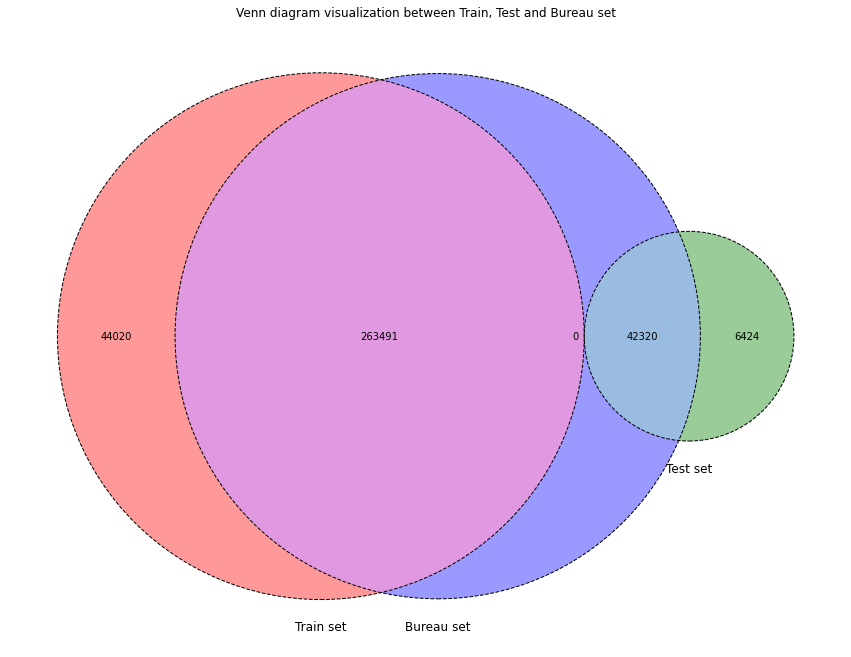

In [21]:
a, b, c = train_data['SK_ID_CURR'].unique(),test_data['SK_ID_CURR'].unique(),bureau_data['SK_ID_CURR'].unique()
venn_diagram(a, b, c,'Venn diagram visualization between Train, Test and Bureau set',['Train set', 'Test set', 'Bureau set'])

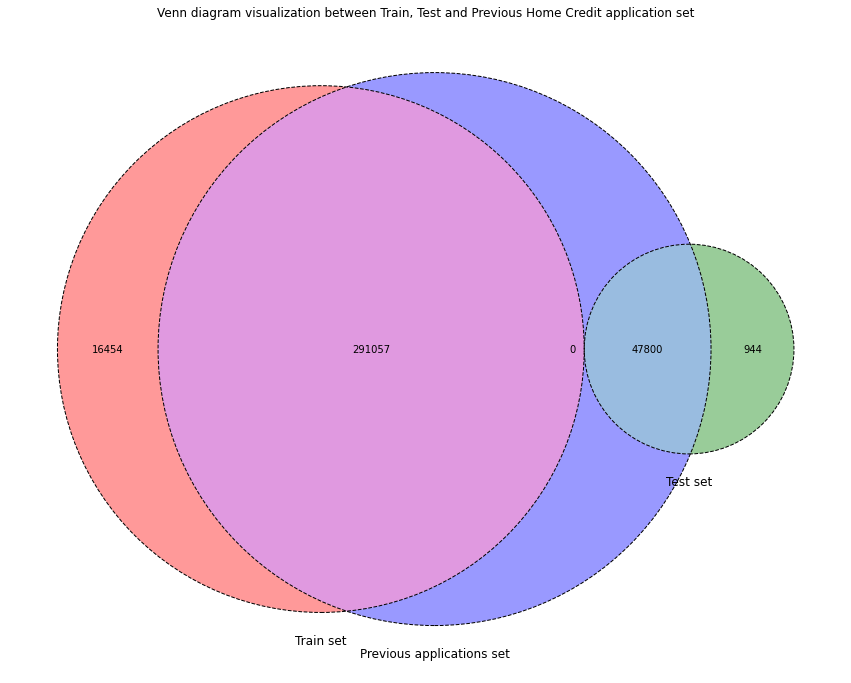

In [22]:
a, b, c = train_data['SK_ID_CURR'].unique(),test_data['SK_ID_CURR'].unique(),prev_app_data['SK_ID_CURR'].unique()
venn_diagram(a, b, c, 'Venn diagram visualization between Train, Test and Previous Home Credit application set',['Train set', 'Test set', 'Previous applications set'])

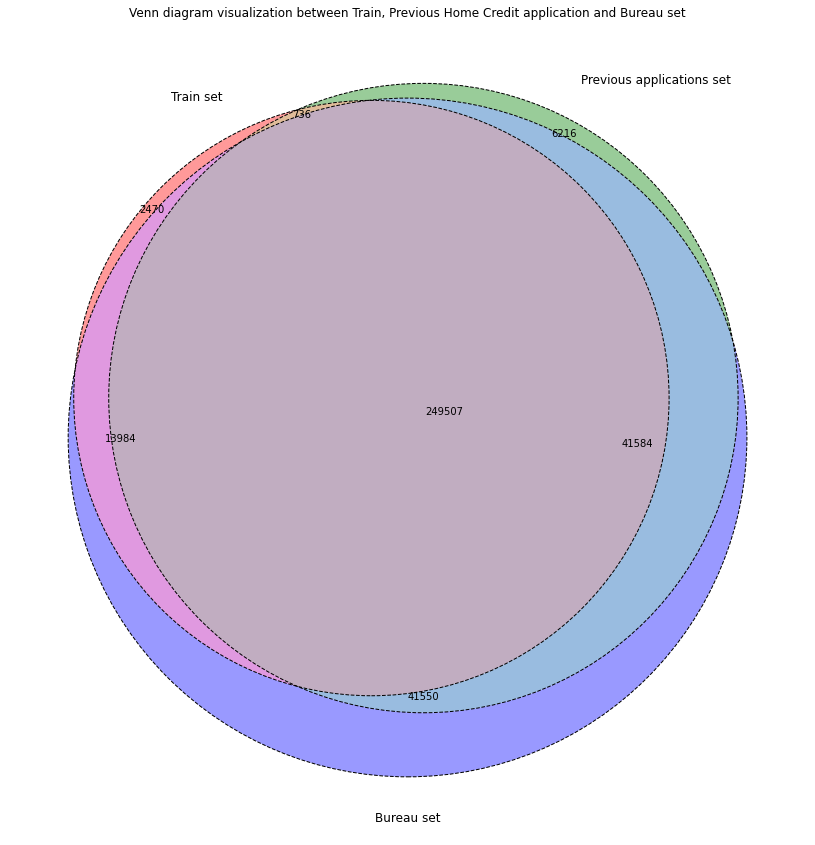

In [23]:
a, b, c = train_data['SK_ID_CURR'].unique(),prev_app_data['SK_ID_CURR'].unique(),bureau_data['SK_ID_CURR'].unique()
venn_diagram(a,b,c, 'Venn diagram visualization between Train, Previous Home Credit application and Bureau set',['Train set', 'Previous applications set', 'Bureau set'])

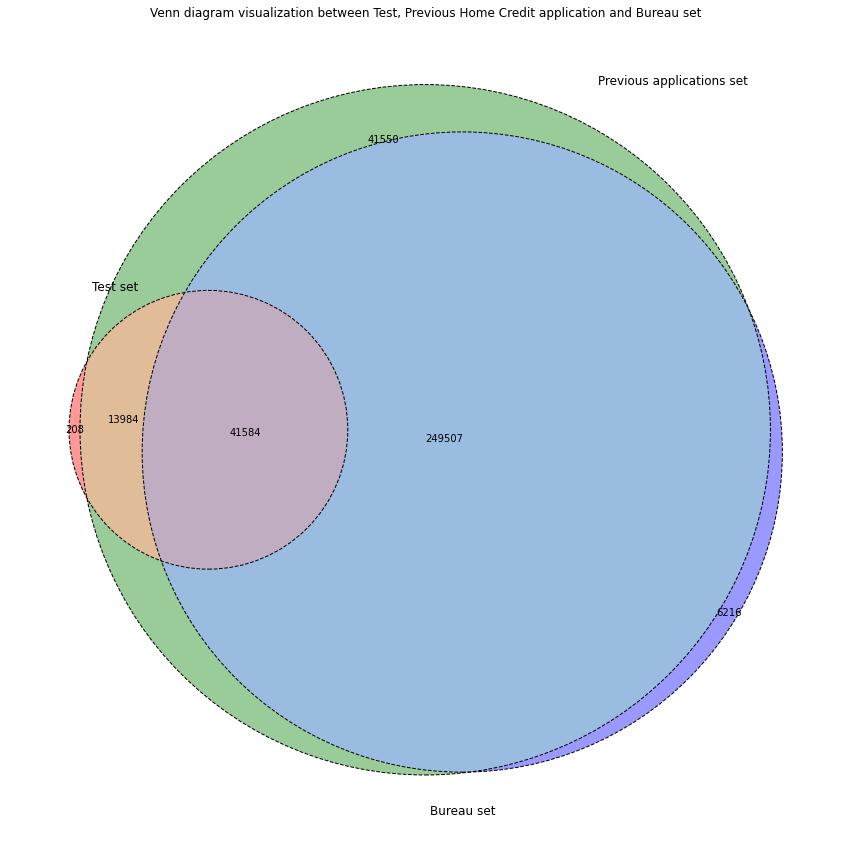

In [24]:
a, b, c = test_data['SK_ID_CURR'].unique(),prev_app_data['SK_ID_CURR'].unique(),bureau_data['SK_ID_CURR'].unique()
venn_diagram(a,b,c, 'Venn diagram visualization between Test, Previous Home Credit application and Bureau set',['Test set', 'Previous applications set', 'Bureau set'])

## 3.3.0 Key takeaways of dataset-level analysis

### 3.3.1 High level summary

>* Around 86% of the training sample applicants are not first time credit seekers and have some credit history with lending agencies apart from Home Credit as recorded in the Bureau dataset.
>* Around 95% of the training sample applicants already have some credit history with Home Credit recorded in the previous applications dataset. Such a high number of repeat applicants might be indicative of customer's preference to Home Credit's lending processes and products over competition.
>* Barely 1% of the training sample applicants are first-time credit seekers from Home Credit with no recorded financial history in any agency.

### 3.3.2 Dataset-specific observations

>* Some columns in the Application Train and Test dataset relating to applicant's apartment specifications such as "COMMONAREA", "NONLIVINGAPARTMENT", etc. have close to 70% values missing. It is quite likely that these values, being optional; might not have recorded during data entry. Suitable strategy for handling these missing values or dropping them needs to be thought-over.
* As there is a significant overlap between the applicant records in the three major datasets, for the purpose of this EDA, the 3 datasets shall be merged and tried out for further modeling.

---
# 4.0.0 Variable-level Overview and Analysis
---

>Objective of the feature-level analysis is understanding each feature in context to its distribution, relation with the output or key variable, the values it takes, and possible anomalies.
>
>To this effect, grouped bar charts, pie charts, box plots and histograms are plotted as per suitability with the type of feature under analysis.
>
>As the whole objective of this exercise is predicting a potential defaulter, all the features shall mostly be plotted with the ‘Target’ variable as criterion.
>
>
>Secondly, as there are 122 features in the Application Train dataset alone, visualizing each and every feature and deriving meaningful insights can be pretty time-consuming.
>
>
>Hence, based on literature reviews and consequent domain knowledge coupled with
practical intuition, features which ‘may have’ significant bearing on the defaulter prediction shall be visualized.

## 4.1.0 Univariate analysis

### Understanding the defaulter demographic and distribution

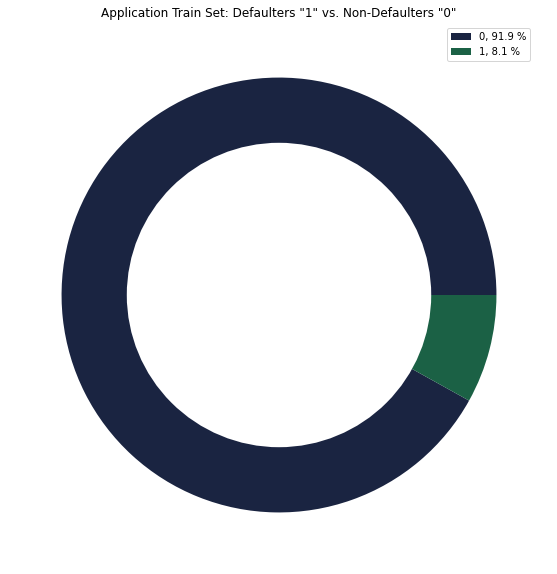

In [25]:
pie(train_data['TARGET'].value_counts(dropna=False),train_data['TARGET'].unique(),'Application Train Set: Defaulters "1" vs. Non-Defaulters "0"')

>* The application_train dataset is heavily imbalanced, as expected for a healthy lending company. This fact shall govern the major decisions such as model evaluation metrics.

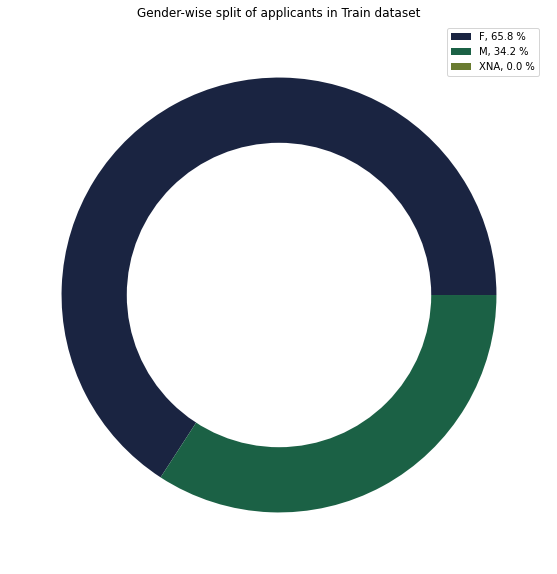

In [26]:
pie(train_data['CODE_GENDER'].value_counts(dropna=False),train_data['CODE_GENDER'].unique(),'Gender-wise split of applicants in Train dataset')

+----------+--------------------+--------------------------+
| Category | Total applications | Average Default Rate [%] |
+----------+--------------------+--------------------------+
| XNA      |         4          |           0.0            |
| F        |       202448       |           7.0            |
| M        |       105059       |          10.14           |
+----------+--------------------+--------------------------+


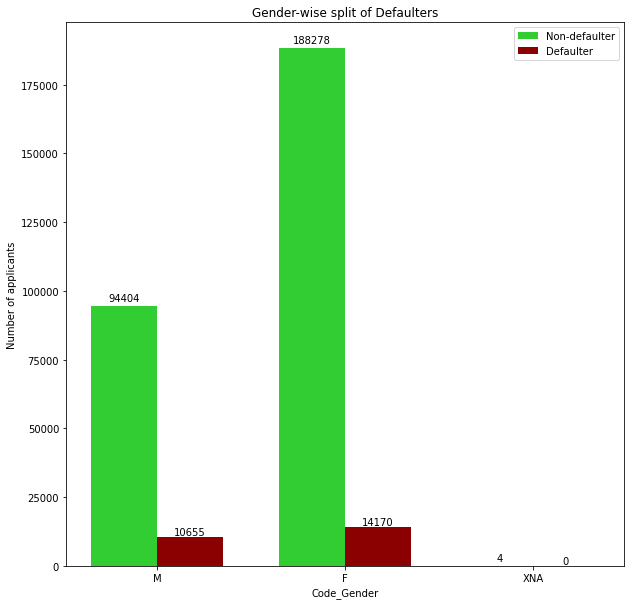

In [27]:
grouped_bar_plot(train_data['CODE_GENDER'],train_data['TARGET'],'Gender-wise split of Defaulters')

>* It can be observed that women secured a greater number of loans as compared to men, almost twice as much. 
>* Moreover, the credit default rate is slightly lower for women than for men.
>* There are 4 entries where Gender='XNA'. Defaulting tendency for this category is 0. Since this is not providing much information to be retained as a separate representative category, these entries may be dropped eventually unless significant insights prove contrary.
>* Moreover, these demographic insights can help Home Credit formulate focused products and campaigns catering to females as well as introspect the disparity in genders of applicants.

### Type of Loans availed

+-----------------+--------------------+--------------------------+
| Category        | Total applications | Average Default Rate [%] |
+-----------------+--------------------+--------------------------+
| Revolving loans |       29279        |           5.48           |
| Cash loans      |       278232       |           8.35           |
+-----------------+--------------------+--------------------------+


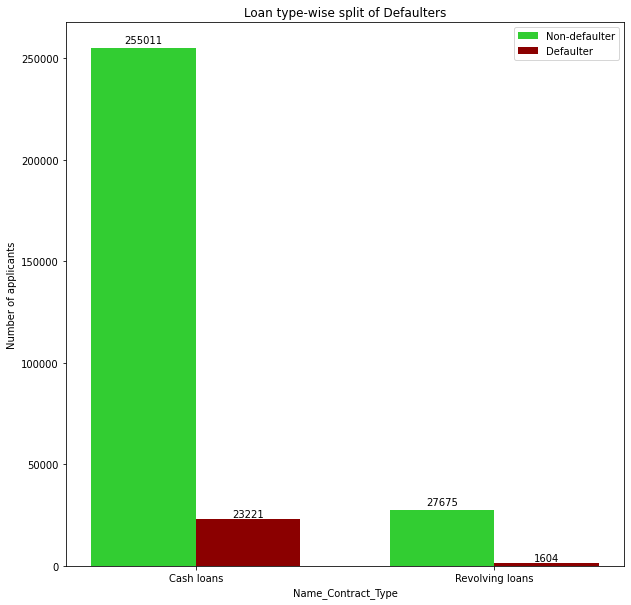

In [28]:
grouped_bar_plot(train_data['NAME_CONTRACT_TYPE'],train_data['TARGET'],'Loan type-wise split of Defaulters')

+-----------------+----------+--------------------+------------+----------------------+---------+-------------------+
| Category        | Male [%] | Male Defaulter [%] | Female [%] | Female Defaulter [%] | XNA [%] | XNA Defaulter [%] |
+-----------------+----------+--------------------+------------+----------------------+---------+-------------------+
| Cash loans      |  34.299  |       10.577       |   65.701   |        7.181         |   0.0   |        nan        |
| Revolving loans |  32.88   |       5.827        |   67.106   |        5.308         |  0.014  |        0.0        |
+-----------------+----------+--------------------+------------+----------------------+---------+-------------------+


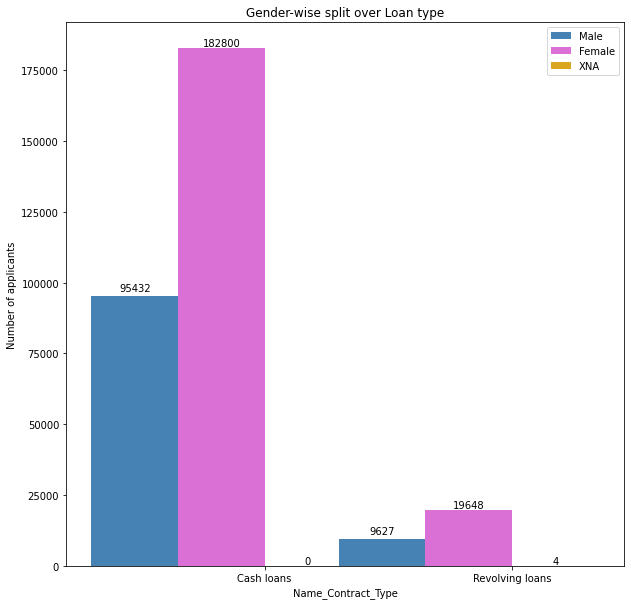

In [29]:
grouped_bar_plot(train_data['NAME_CONTRACT_TYPE'],train_data['CODE_GENDER'],'Gender-wise split over Loan type')

>* A vast majority of the applicant sample population have availed cash loans over revolving loans.
>* The number of defaulters for revolving loan type is a tad little lower than cash loans and may be explored by Home Credit for in-depth assessment. With context to defaulter prediction considering sample the rates are not too different and hence, loan type does not highlight a quirk.
>* The gender-wise split is also expected, given the ratio of female-to-male applicants.

### Ownership of car-wise visualization

+----------+--------------------+--------------------------+
| Category | Total applications | Average Default Rate [%] |
+----------+--------------------+--------------------------+
| Y        |       104587       |           7.24           |
| N        |       202924       |           8.5            |
+----------+--------------------+--------------------------+


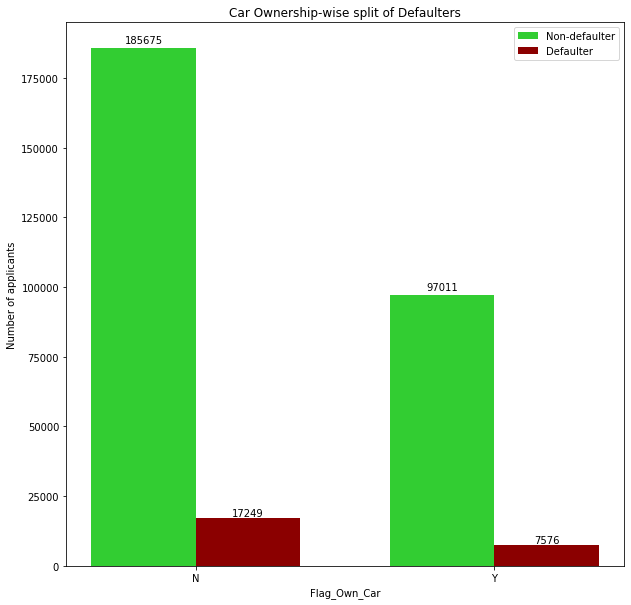

In [30]:
grouped_bar_plot(train_data['FLAG_OWN_CAR'],train_data['TARGET'],'Car Ownership-wise split of Defaulters')

+----------+----------+--------------------+------------+----------------------+---------+-------------------+
| Category | Male [%] | Male Defaulter [%] | Female [%] | Female Defaulter [%] | XNA [%] | XNA Defaulter [%] |
+----------+----------+--------------------+------------+----------------------+---------+-------------------+
| N        |  22.389  |       12.506       |   77.61    |        7.345         |  0.001  |        0.0        |
| Y        |  57.011  |        8.34        |   42.987   |         5.79         |  0.002  |        0.0        |
+----------+----------+--------------------+------------+----------------------+---------+-------------------+


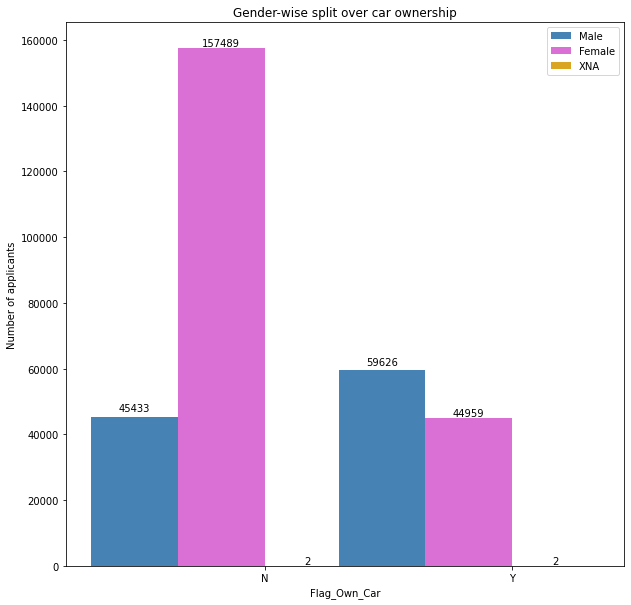

In [31]:
grouped_bar_plot(train_data['FLAG_OWN_CAR'],train_data['CODE_GENDER'],'Gender-wise split over car ownership')

>* Relatively greater number of applicants do not own a car to those that do.
>* However, the defaulter rate is almost the same for both the cases and does not indicate a unique pattern.
>* The statistics regarding car ownership can provide Home Credit some insights regarding general wealth levels of their client base though as a feature for defaulter prediction, these statistics may not be too profound.

### Visualizing significance of familial status on defaulter distribution

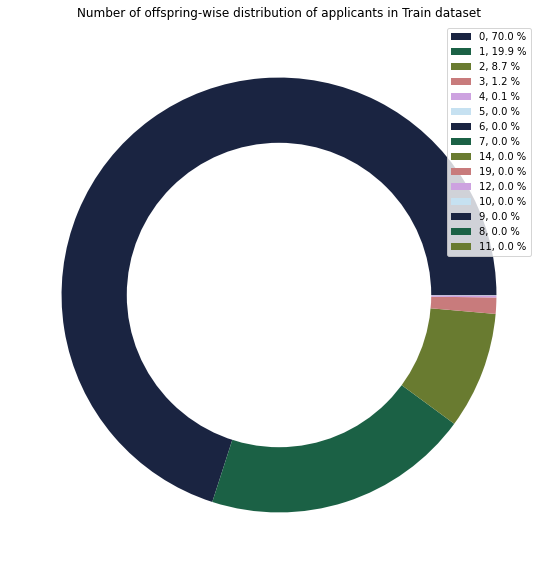

In [32]:
pie(train_data['CNT_CHILDREN'].value_counts(dropna=False),train_data['CNT_CHILDREN'].unique(),'Number of offspring-wise distribution of applicants in Train dataset')

+----------+--------------------+--------------------------+
| Category | Total applications | Average Default Rate [%] |
+----------+--------------------+--------------------------+
| 7        |         7          |           0.0            |
| 8        |         2          |           0.0            |
| 10       |         2          |           0.0            |
| 12       |         2          |           0.0            |
| 14       |         3          |           0.0            |
| 19       |         2          |           0.0            |
| 0        |       215371       |           7.71           |
| 5        |         84         |           8.33           |
| 2        |       26749        |           8.72           |
| 1        |       61119        |           8.92           |
| 3        |        3717        |           9.63           |
| 4        |        429         |          12.82           |
| 6        |         21         |          28.57           |
| 9        |         2  

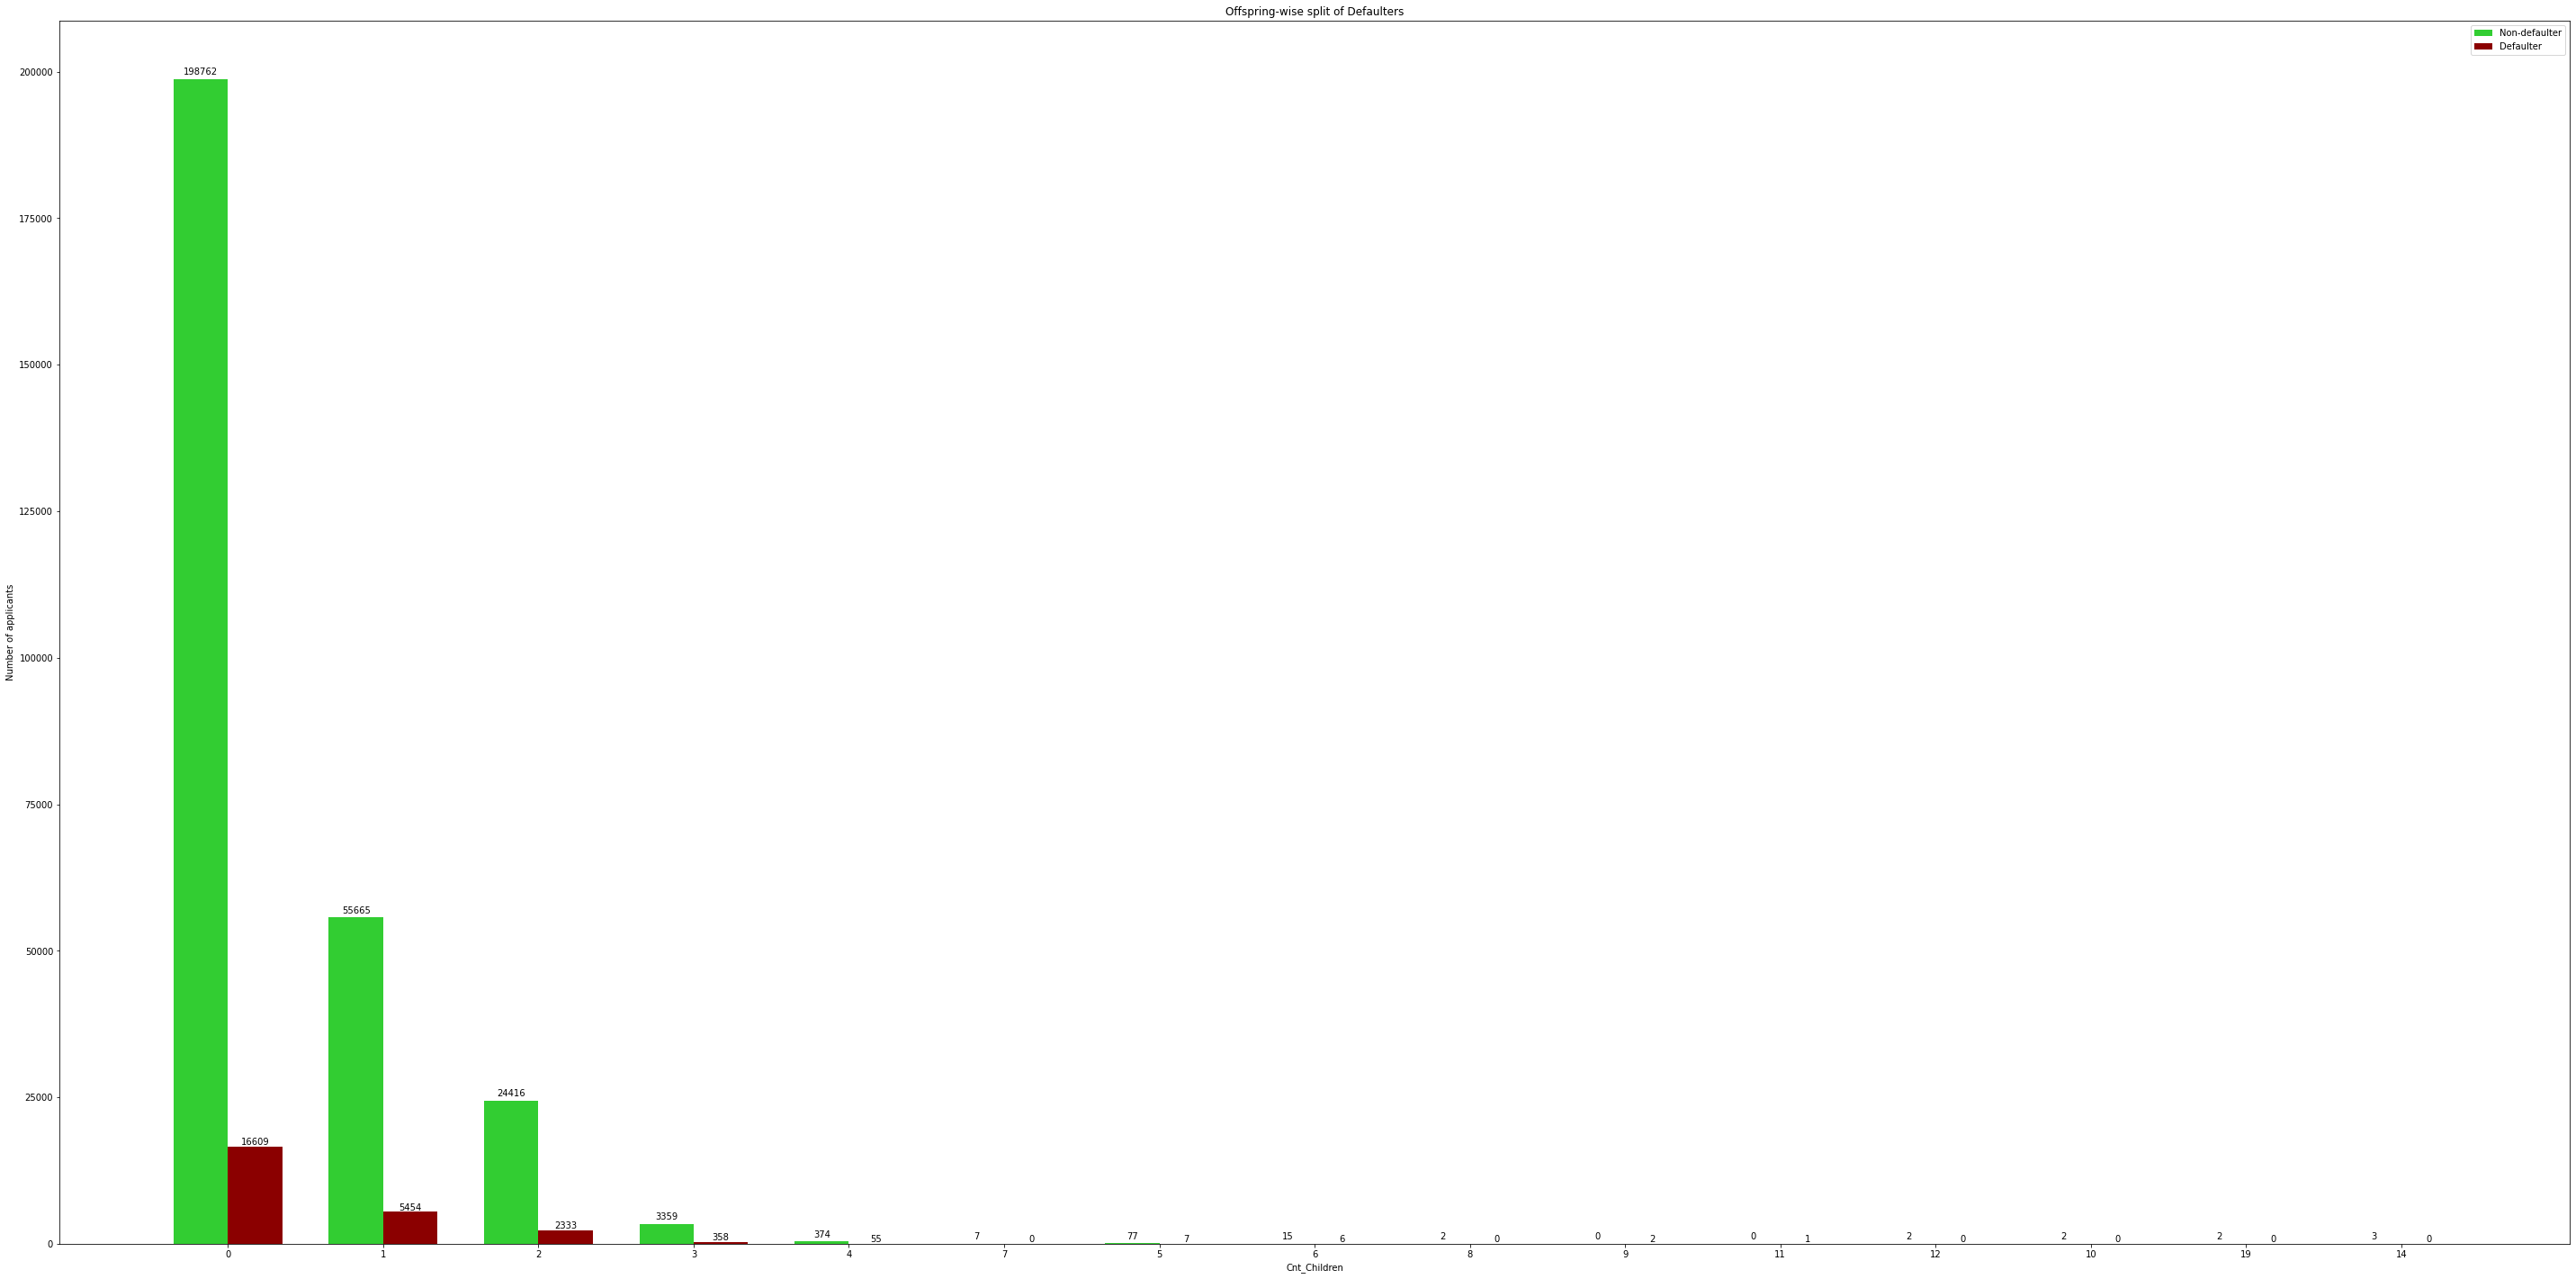

In [33]:
grouped_bar_plot(train_data['CNT_CHILDREN'],train_data['TARGET'],'Offspring-wise split of Defaulters')

+----------+----------+--------------------+------------+----------------------+---------+-------------------+
| Category | Male [%] | Male Defaulter [%] | Female [%] | Female Defaulter [%] | XNA [%] | XNA Defaulter [%] |
+----------+----------+--------------------+------------+----------------------+---------+-------------------+
| 0        |  32.65   |       10.256       |   67.349   |        6.478         |  0.001  |        0.0        |
| 1        |  37.075  |       10.406       |   62.923   |         8.05         |  0.002  |        0.0        |
| 2        |  38.929  |       8.883        |   61.068   |         8.62         |  0.004  |        0.0        |
| 3        |  38.902  |       9.267        |   61.098   |        9.863         |   0.0   |        nan        |
| 4        |  39.627  |       11.765       |   60.373   |        13.514        |   0.0   |        nan        |
| 7        |  57.143  |         0          |   42.857   |          0           |   0.0   |         0         |
|

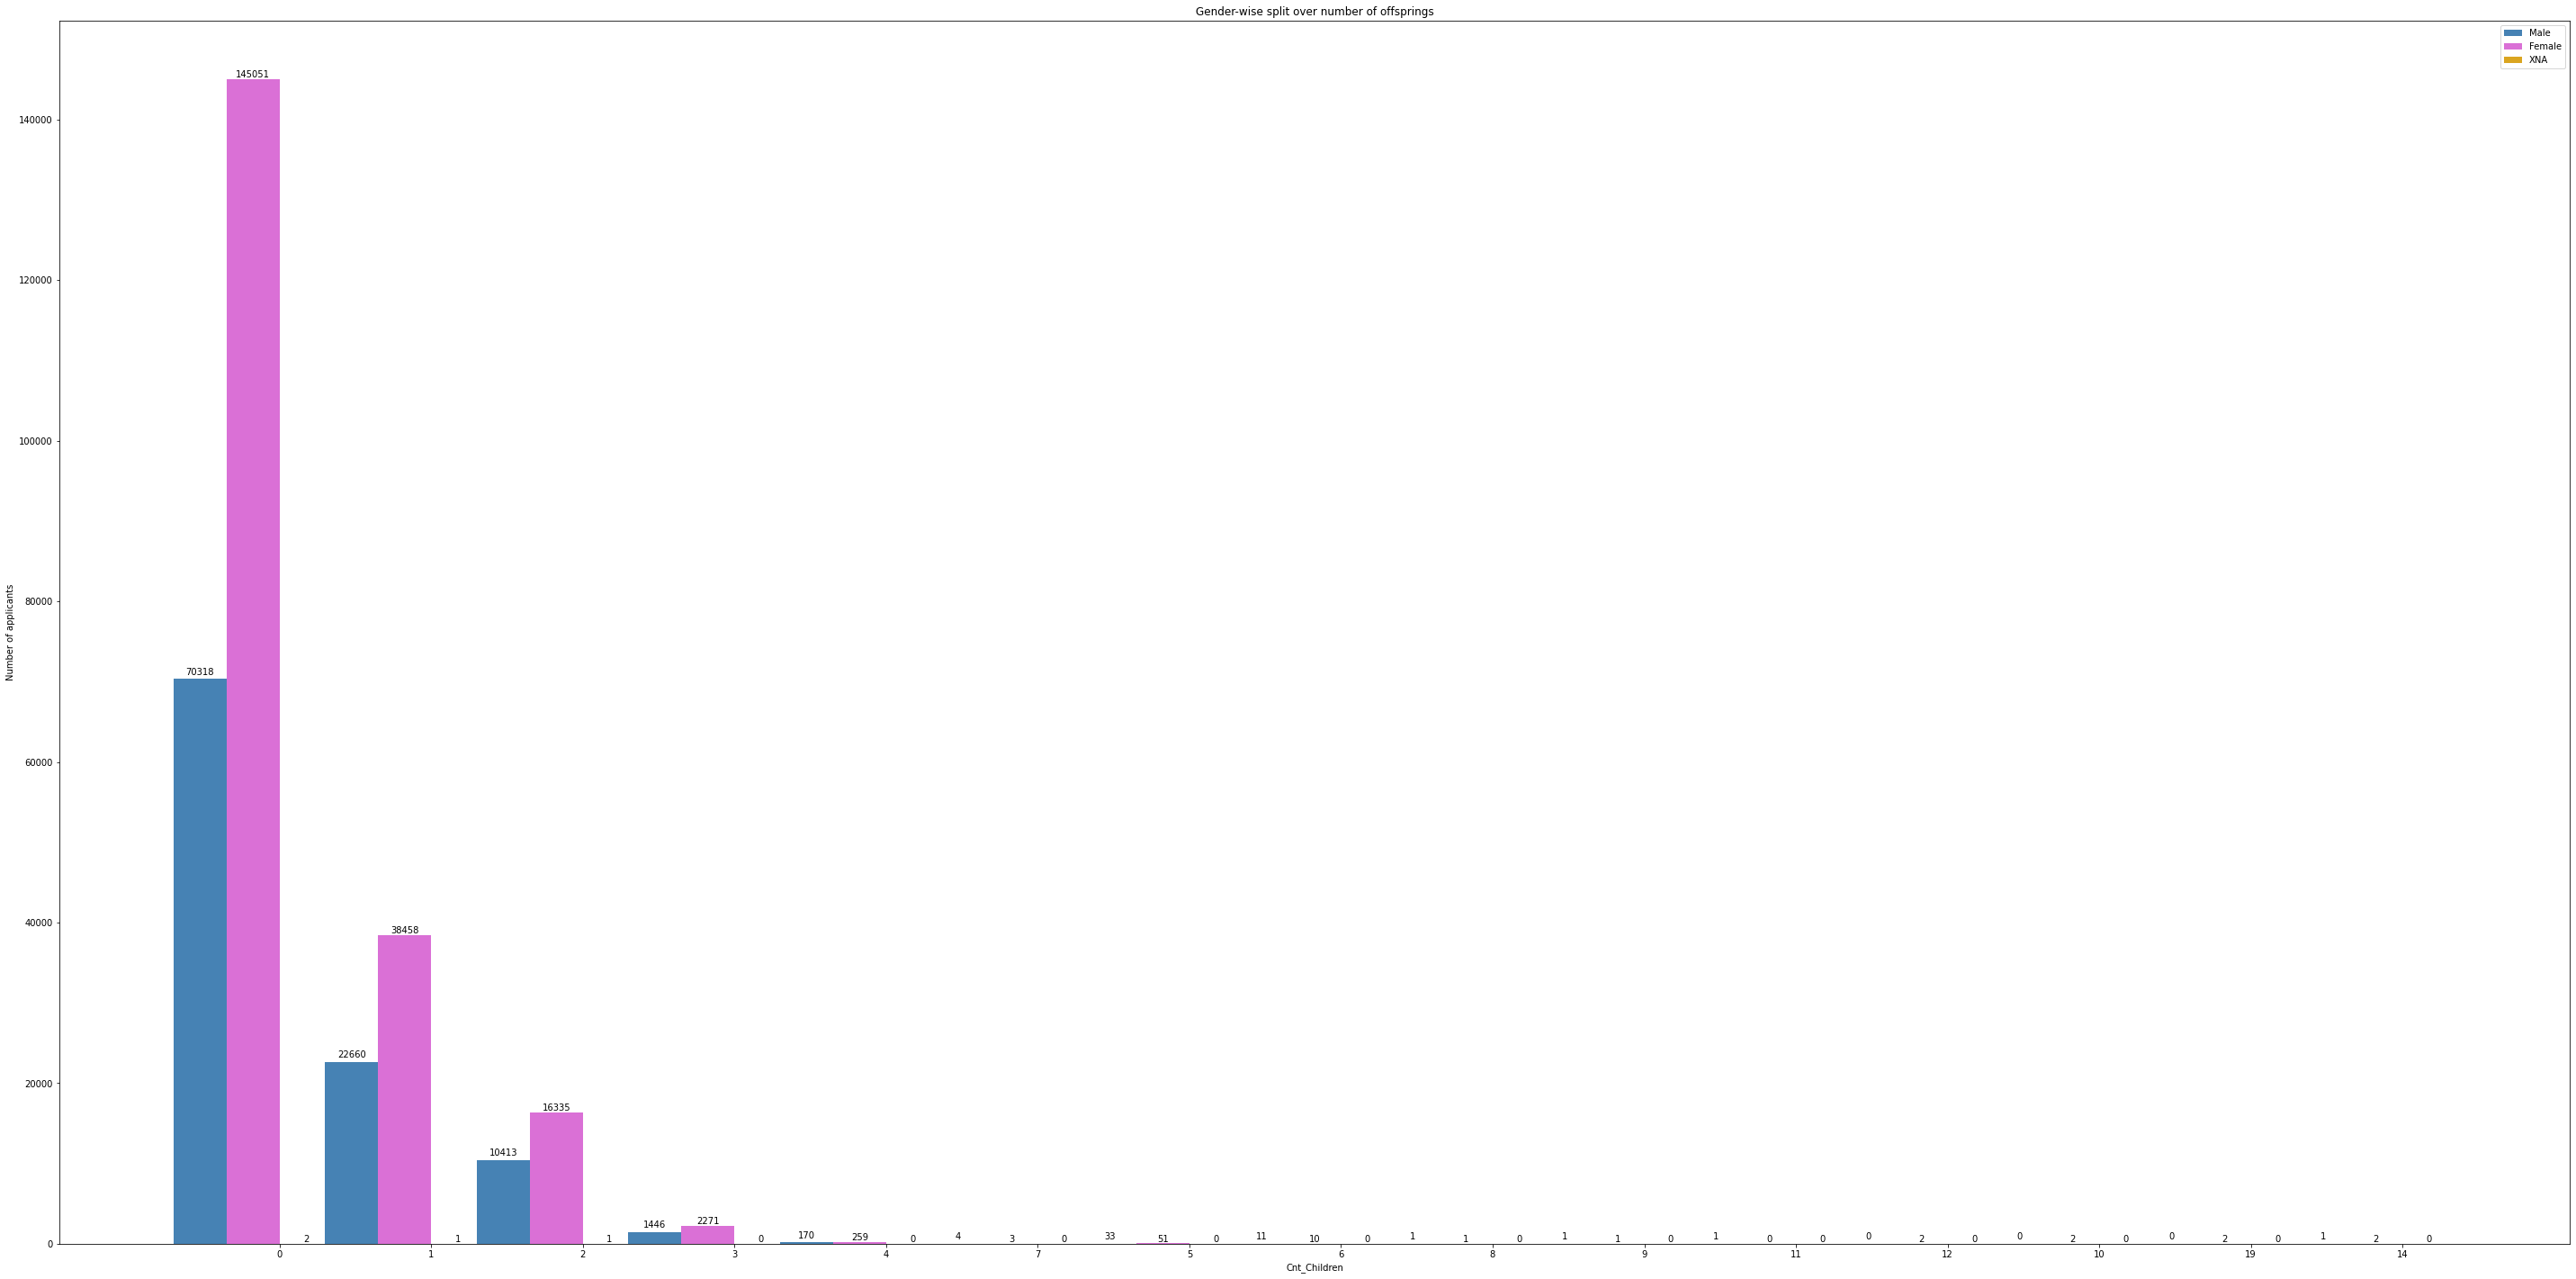

In [34]:
grouped_bar_plot(train_data['CNT_CHILDREN'],train_data['CODE_GENDER'],'Gender-wise split over number of offsprings')

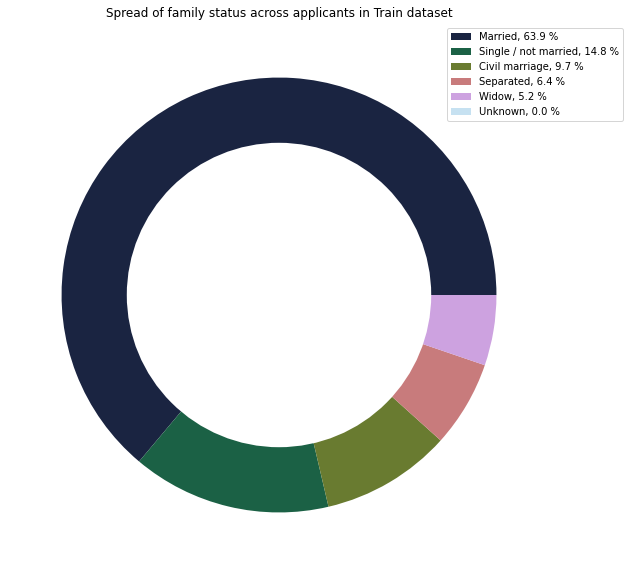

In [35]:
pie(train_data['NAME_FAMILY_STATUS'].value_counts(dropna=False),train_data['NAME_FAMILY_STATUS'].unique(),'Spread of family status across applicants in Train dataset')

+----------------------+--------------------+--------------------------+
| Category             | Total applications | Average Default Rate [%] |
+----------------------+--------------------+--------------------------+
| Unknown              |         2          |           0.0            |
| Widow                |       16088        |           5.82           |
| Married              |       196432       |           7.56           |
| Separated            |       19770        |           8.19           |
| Single / not married |       45444        |           9.81           |
| Civil marriage       |       29775        |           9.94           |
+----------------------+--------------------+--------------------------+


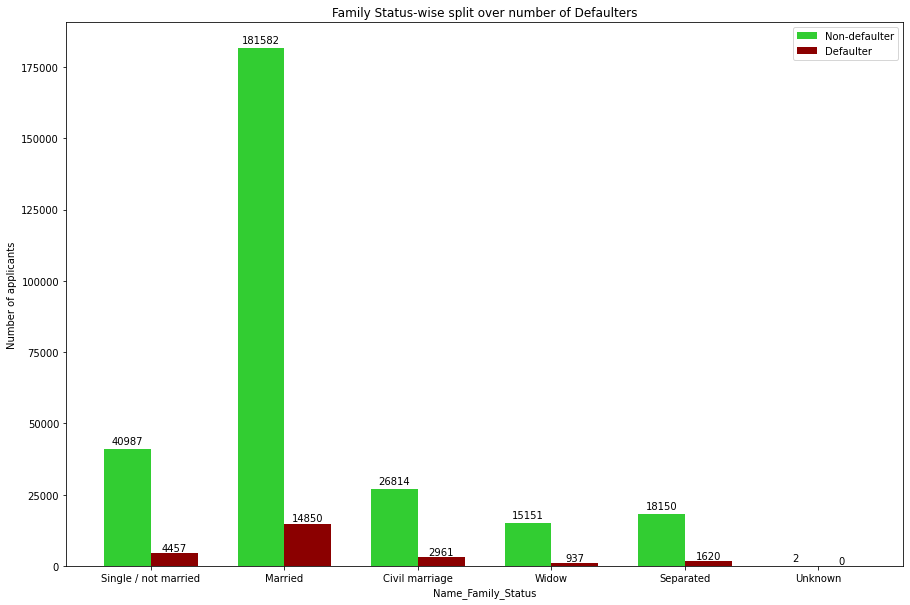

In [36]:
grouped_bar_plot(train_data['NAME_FAMILY_STATUS'],train_data['TARGET'],'Family Status-wise split over number of Defaulters')

+----------------------+----------+--------------------+------------+----------------------+---------+-------------------+
| Category             | Male [%] | Male Defaulter [%] | Female [%] | Female Defaulter [%] | XNA [%] | XNA Defaulter [%] |
+----------------------+----------+--------------------+------------+----------------------+---------+-------------------+
| Single / not married |  37.101  |       13.268       |   62.899   |        7.767         |   0.0   |        nan        |
| Married              |  37.664  |       8.821        |   62.335   |        6.798         |  0.002  |        0.0        |
| Civil marriage       |  30.243  |       13.415       |   69.753   |         8.44         |  0.003  |        0.0        |
| Widow                |  5.594   |       12.111       |   94.406   |        5.452         |   0.0   |        nan        |
| Separated            |  21.796  |       13.344       |   78.204   |        6.759         |   0.0   |        nan        |
| Unknown       

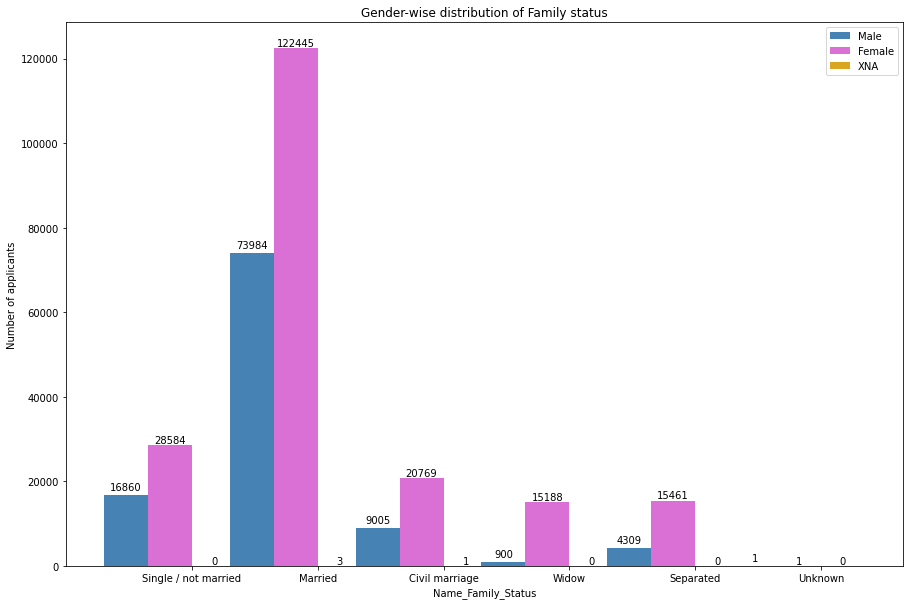

In [37]:
grouped_bar_plot(train_data['NAME_FAMILY_STATUS'],train_data['CODE_GENDER'],'Gender-wise distribution of Family status')

>* From the 6 familial infographics above, following are the insights - 
>>* A majority of applicants are married as well as having no offsprings, indicative of a young demographics. Howevr, this does not translate to pattern for defaulter rate.
>>* There is a significant variability in defaulter rate among other classes [ex. - High number of offsprings or unknown marital status]. However, the datapoints are far too less to make any sort of meaningful inference or generalization.

### Realty Ownership-wise defaulter split

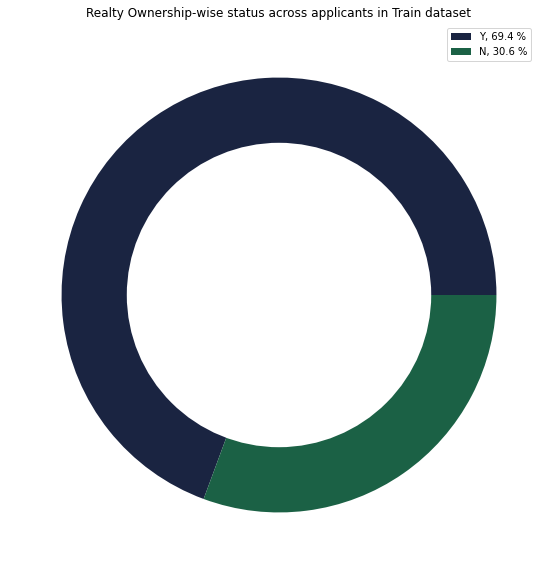

In [38]:
pie(train_data['FLAG_OWN_REALTY'].value_counts(dropna=False),train_data['FLAG_OWN_REALTY'].unique(),'Realty Ownership-wise status across applicants in Train dataset')

+----------+--------------------+--------------------------+
| Category | Total applications | Average Default Rate [%] |
+----------+--------------------+--------------------------+
| Y        |       213312       |           7.96           |
| N        |       94199        |           8.32           |
+----------+--------------------+--------------------------+


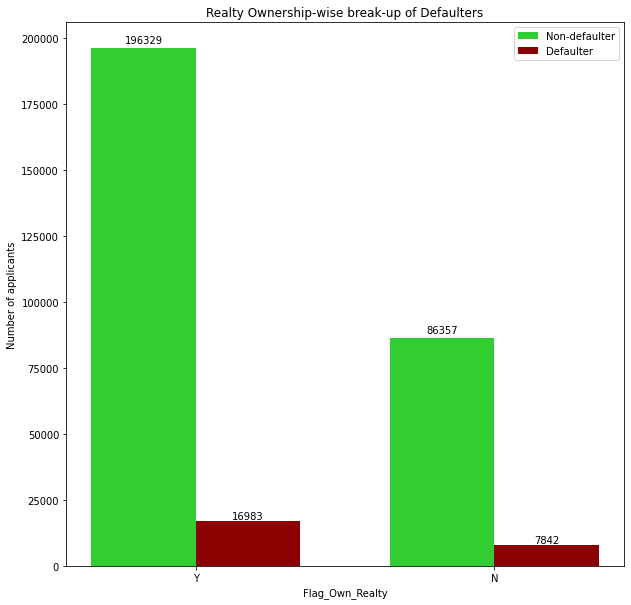

In [39]:
grouped_bar_plot(train_data['FLAG_OWN_REALTY'],train_data['TARGET'],'Realty Ownership-wise break-up of Defaulters')

+----------+----------+--------------------+------------+----------------------+---------+-------------------+
| Category | Male [%] | Male Defaulter [%] | Female [%] | Female Defaulter [%] | XNA [%] | XNA Defaulter [%] |
+----------+----------+--------------------+------------+----------------------+---------+-------------------+
| Y        |  32.766  |       10.19        |   67.233   |        6.876         |  0.002  |        0.0        |
| N        |  37.332  |       10.047       |   62.668   |        7.299         |   0.0   |        nan        |
+----------+----------+--------------------+------------+----------------------+---------+-------------------+


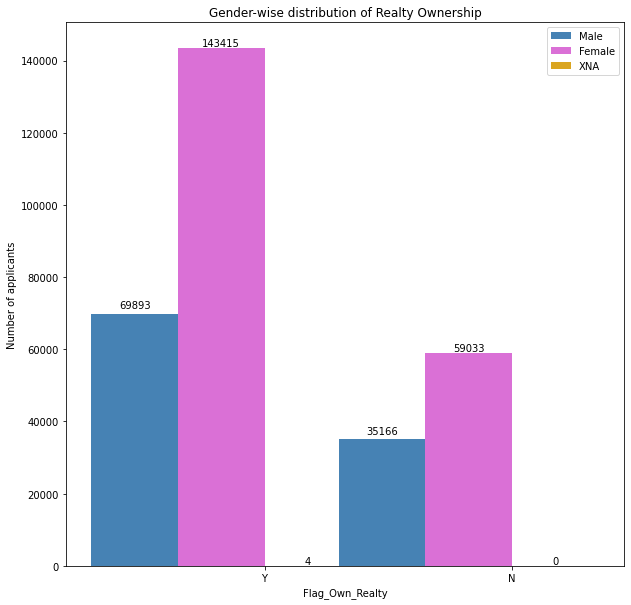

In [40]:
grouped_bar_plot(train_data['FLAG_OWN_REALTY'],train_data['CODE_GENDER'],'Gender-wise distribution of Realty Ownership')

>* A majority of the applicants are owning flats or some form of real estate. This can give an insight into the primary client-base patronising Home Credit.
>* The statistics regarding car and realty ownership can provide Home Credit some insights regarding general wealth levels of their client base though as a feature for defaulter prediction, these statistics may not be too profound.
>* However, there is no defaulter-wise aberration or pattern observed with context to realty ownership. 

### Occupation type-based analysis

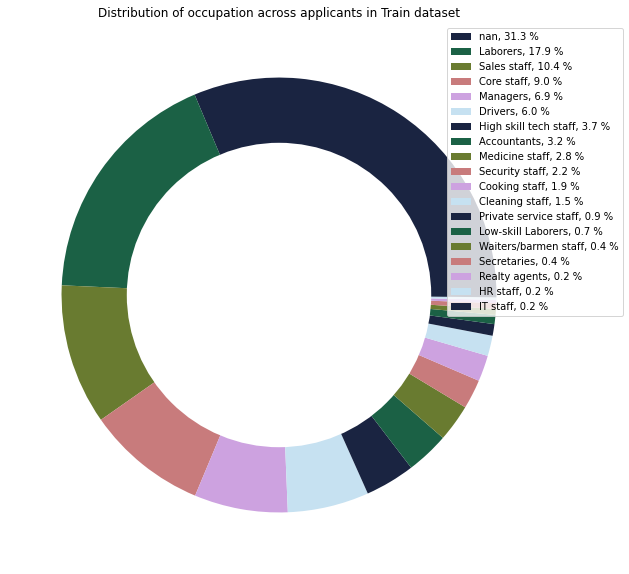

In [41]:
pie(train_data['OCCUPATION_TYPE'].value_counts(dropna=False),train_data['OCCUPATION_TYPE'].unique(),'Distribution of occupation across applicants in Train dataset')

+-----------------------+--------------------+--------------------------+
| Category              | Total applications | Average Default Rate [%] |
+-----------------------+--------------------+--------------------------+
| Accountants           |        9813        |           4.83           |
| High skill tech staff |       11380        |           6.16           |
| Managers              |       21371        |           6.21           |
| Core staff            |       27570        |           6.3            |
| HR staff              |        563         |           6.39           |
| IT staff              |        526         |           6.46           |
| Private service staff |        2652        |           6.6            |
| Medicine staff        |        8537        |           6.7            |
| Secretaries           |        1305        |           7.05           |
| Realty agents         |        751         |           7.86           |
| Cleaning staff        |        4653 

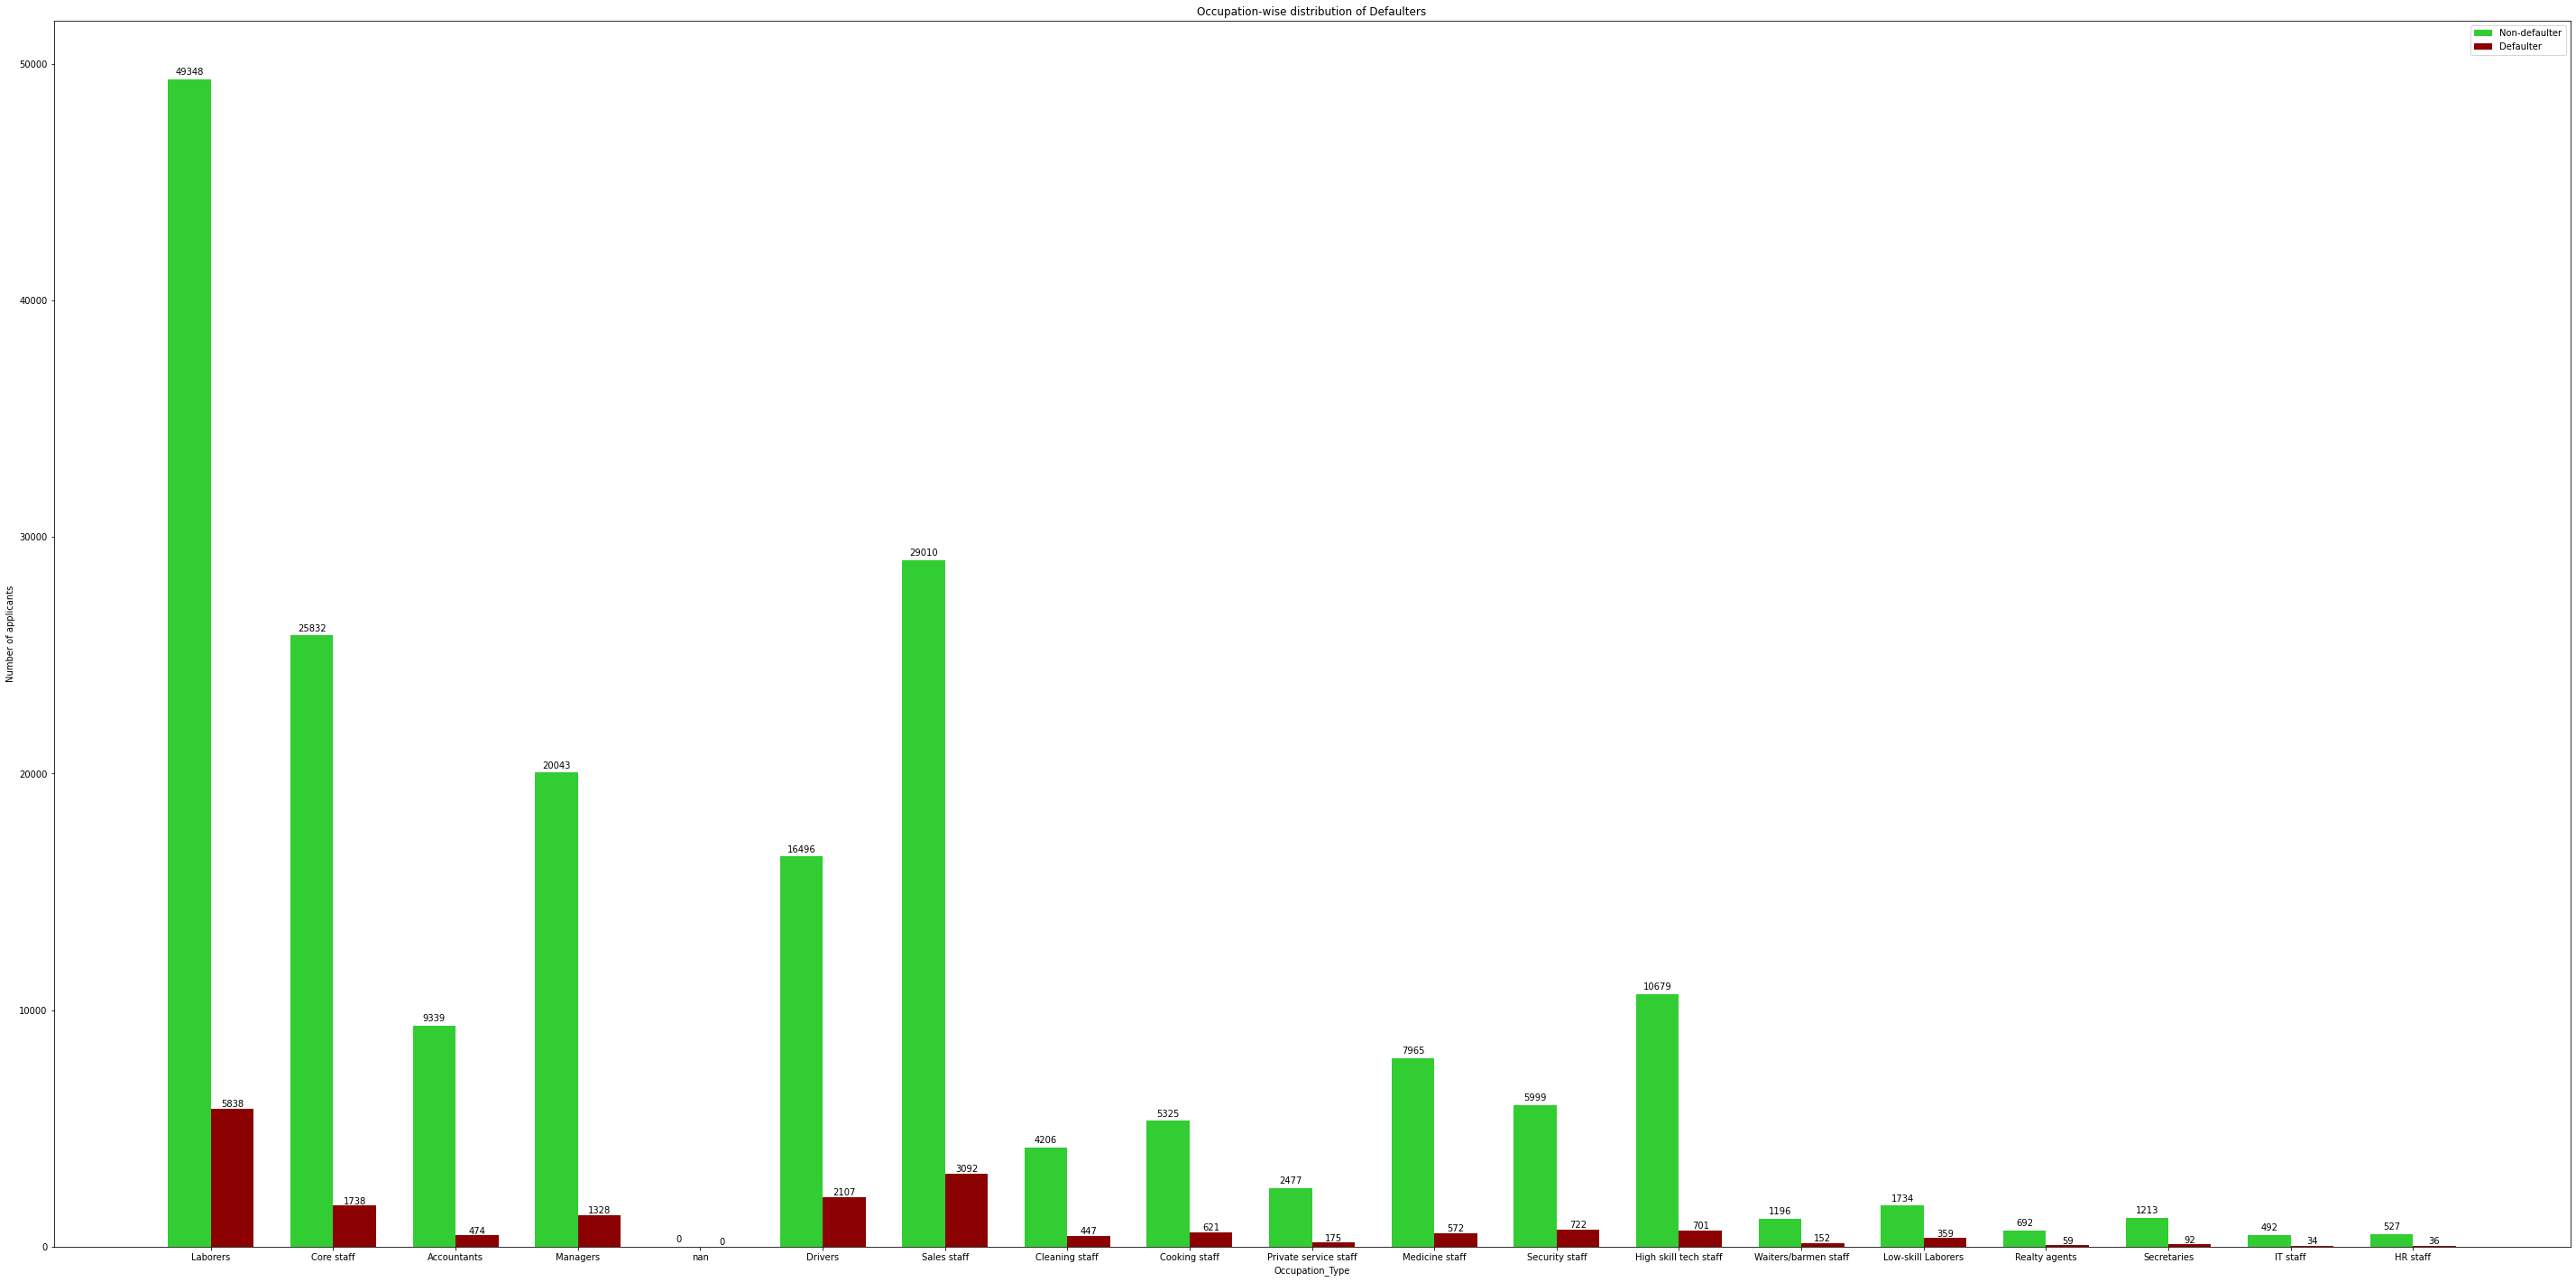

In [42]:
grouped_bar_plot(train_data['OCCUPATION_TYPE'],train_data['TARGET'],'Occupation-wise distribution of Defaulters')

>* A majority of applicants have not provided their occupation type in the application [approx. 31.3%].
>* Low-skill labourers, Drivers & Waiters have a relatively greater defaulter rate than other occupations. 
>*This insight may help in understanding the borrowing patterns and possibly wilful defaulters in conjunction with income data.
>*Relatively high-skill applicants such as High-skill tech staff, HR staff, Core staff, Accountants and IT staff have a relatively lower defaulter rate than other occupations.
>*Though this can be attributable to a very limited sample population, considering otherwise, this occupation demographic may be offered special incentives to avail products by Home Credit, depending on Home Credit’s business goals and values
 **[values is emphasised on as - the primary goal of Home Credit for predicting defaulters is to ensure that first time credit seekers as well as marginalised borrowers are given equal opportunities and occupation-wise promotion may be contrasting to their guiding spirit.]**
>* These insights may help in understanding the borrowing patterns and possibly wilful defaulters in conjunction with income data.
>* Since there is a chance of this feature being significant to defaulter prediction, filling in the missing values is an important consideration.
>* Also, it would serve Home Credit well to record this data for future clients with due diligence as it ‘may’ affect their loan approval status.

### Educational qualification of the applicants

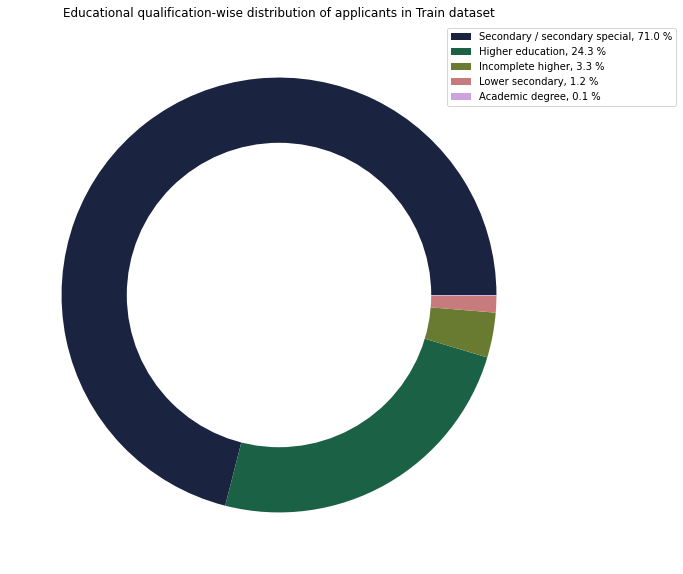

In [43]:
pie(train_data['NAME_EDUCATION_TYPE'].value_counts(dropna=False),train_data['NAME_EDUCATION_TYPE'].unique(),'Educational qualification-wise distribution of applicants in Train dataset')

+-------------------------------+--------------------+--------------------------+
| Category                      | Total applications | Average Default Rate [%] |
+-------------------------------+--------------------+--------------------------+
| Academic degree               |        164         |           1.83           |
| Higher education              |       74863        |           5.36           |
| Incomplete higher             |       10277        |           8.48           |
| Secondary / secondary special |       218391       |           8.94           |
| Lower secondary               |        3816        |          10.93           |
+-------------------------------+--------------------+--------------------------+


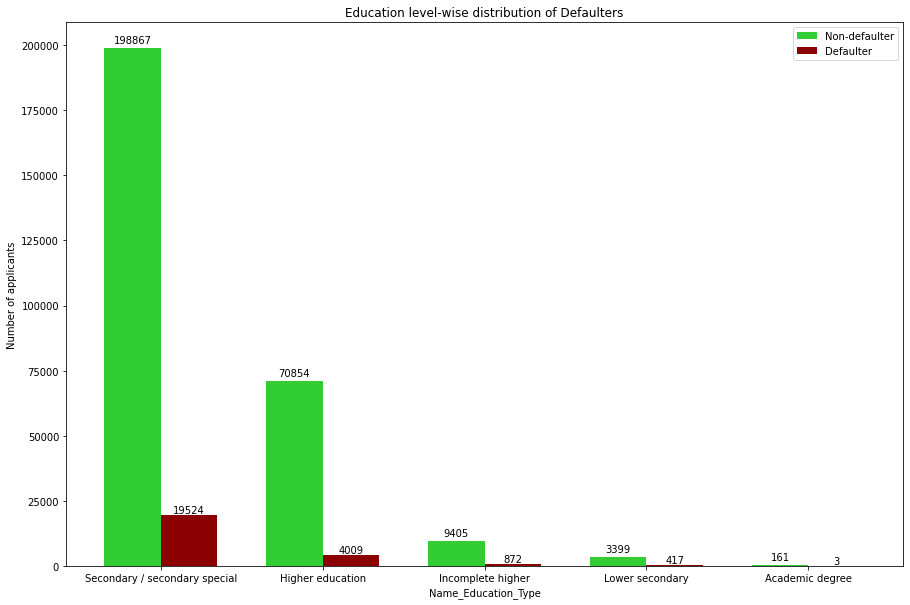

In [44]:
grouped_bar_plot(train_data['NAME_EDUCATION_TYPE'],train_data['TARGET'],'Education level-wise distribution of Defaulters')

+-------------------------------+----------+--------------------+------------+----------------------+---------+-------------------+
| Category                      | Male [%] | Male Defaulter [%] | Female [%] | Female Defaulter [%] | XNA [%] | XNA Defaulter [%] |
+-------------------------------+----------+--------------------+------------+----------------------+---------+-------------------+
| Secondary / secondary special |  34.307  |       11.362       |   65.692   |        7.675         |  0.001  |        0.0        |
| Higher education              |  32.824  |       6.393        |   67.175   |        4.848         |  0.001  |        0.0        |
| Incomplete higher             |  38.854  |       9.216        |   61.137   |        8.022         |   0.01  |        0.0        |
| Lower secondary               |  39.439  |       13.488       |   60.561   |         9.26         |   0.0   |        nan        |
| Academic degree               |  39.024  |        0.0         |   60.976  

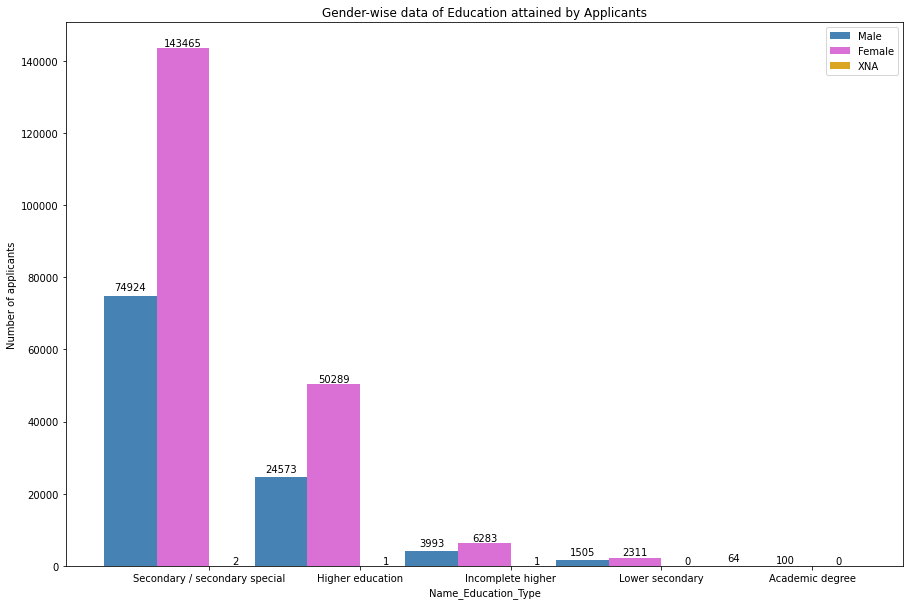

In [45]:
grouped_bar_plot(train_data['NAME_EDUCATION_TYPE'],train_data['CODE_GENDER'],'Gender-wise data of Education attained by Applicants')

>* Majority of applicants have attained secondary education.
>* Cursory glance at defaulter rate-per-education level suggests an inverse relation. This is more of a social insight.

### Income Categorization based EDA

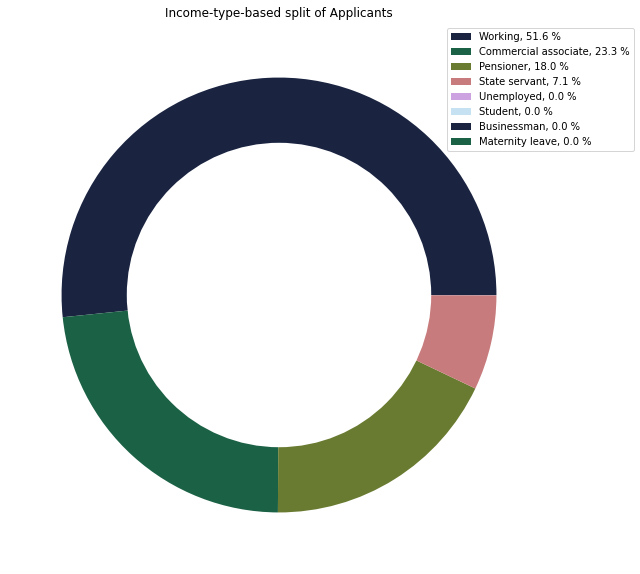

In [46]:
data = train_data['NAME_INCOME_TYPE'].value_counts(dropna=False)
labels = train_data['NAME_INCOME_TYPE'].unique()
pie(data,labels,'Income-type-based split of Applicants')

+----------------------+--------------------+--------------------------+
| Category             | Total applications | Average Default Rate [%] |
+----------------------+--------------------+--------------------------+
| Businessman          |         10         |           0.0            |
| Student              |         18         |           0.0            |
| Pensioner            |       55362        |           5.39           |
| State servant        |       21703        |           5.75           |
| Commercial associate |       71617        |           7.48           |
| Working              |       158774       |           9.59           |
| Unemployed           |         22         |          36.36           |
| Maternity leave      |         5          |           40.0           |
+----------------------+--------------------+--------------------------+


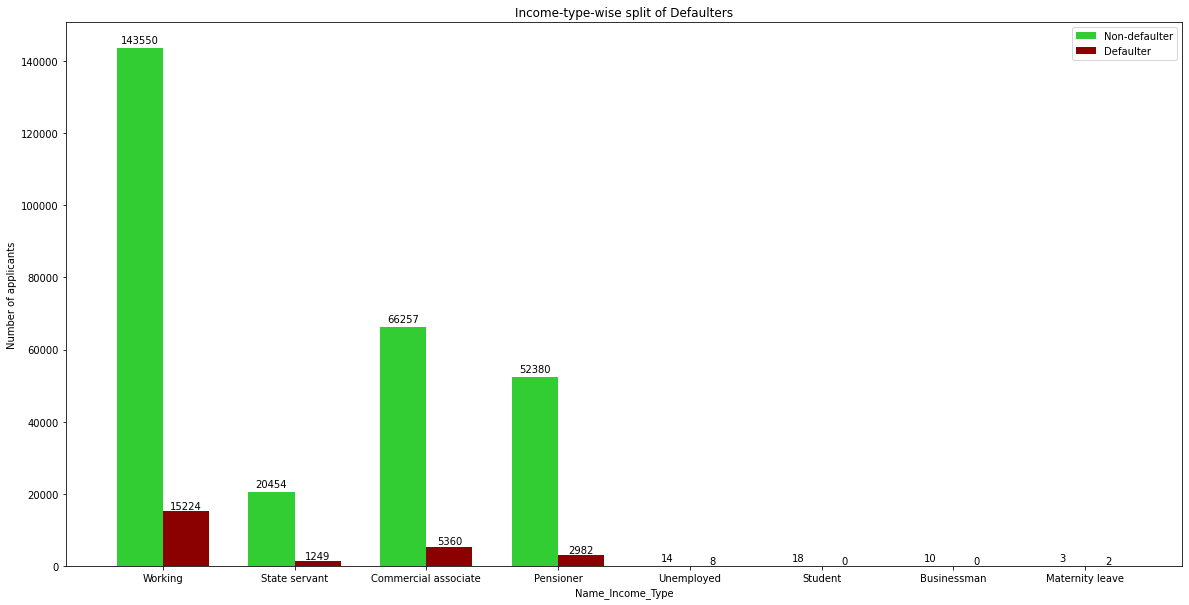

In [47]:
grouped_bar_plot(train_data['NAME_INCOME_TYPE'],train_data['TARGET'],'Income-type-wise split of Defaulters')

+----------------------+----------+--------------------+------------+----------------------+---------+-------------------+
| Category             | Male [%] | Male Defaulter [%] | Female [%] | Female Defaulter [%] | XNA [%] | XNA Defaulter [%] |
+----------------------+----------+--------------------+------------+----------------------+---------+-------------------+
| Working              |  39.043  |       11.486       |   60.955   |        8.374         |  0.002  |        0.0        |
| State servant        |  26.941  |       6.875        |   73.059   |        5.342         |   0.0   |        nan        |
| Commercial associate |  37.836  |       8.828        |   62.163   |        6.667         |  0.001  |        0.0        |
| Pensioner            |  18.245  |       7.316        |   81.755   |        4.956         |   0.0   |        nan        |
| Unemployed           |  22.727  |        40.0        |   77.273   |        35.294        |   0.0   |        nan        |
| Student       

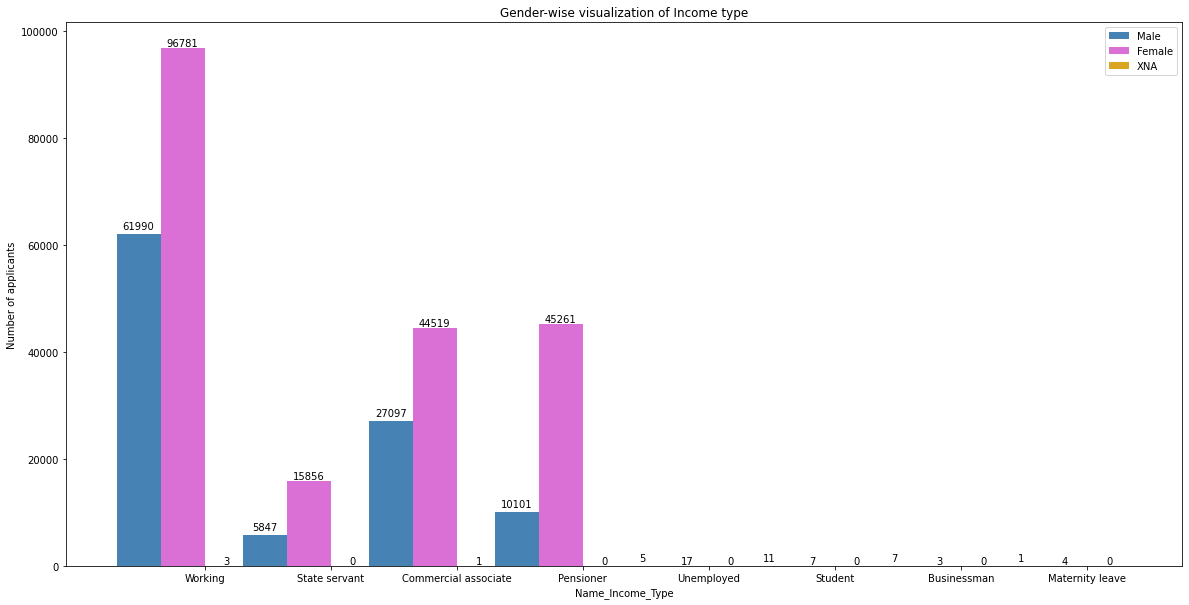

In [48]:
grouped_bar_plot(train_data['NAME_INCOME_TYPE'],train_data['CODE_GENDER'],'Gender-wise visualization of Income type')

>* 'Working' income category applicants avail the most number of loans whereas Commercial Associates, Pensioners and State Servants take considerably lesser number of loans.
>* Unemployed applicants and those on maternity leave have a very high default rate whereas Students & Businessmen have no defaults. However, considering the available datapoints' extremely limited representation, there can be no generalization possible. 

### Income levels-based Visualization

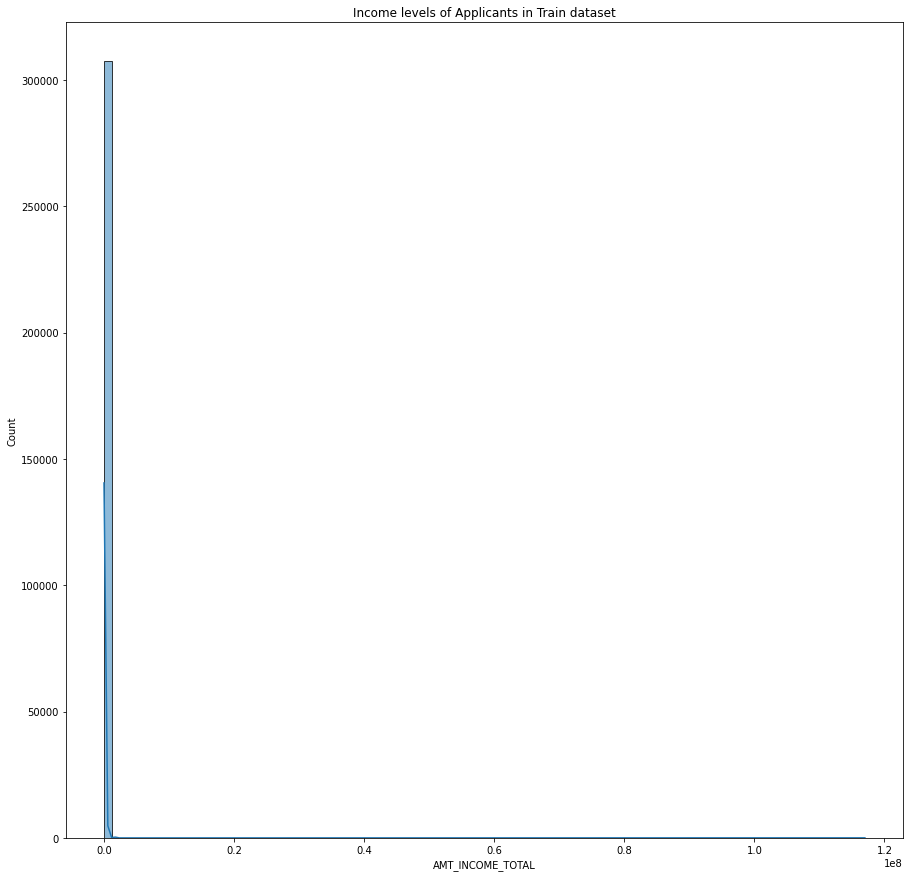

In [49]:
plt.figure(figsize = (15,15))
p=sns.histplot(train_data, x="AMT_INCOME_TOTAL", bins=100, kde = True, multiple="dodge")
#p=sns.distplot(train_data, x="AMT_CREDIT", bins=100, kde = True)
plt.title("Income levels of Applicants in Train dataset")
plt.show()

> This figure seems odd.
Investigating deeper,

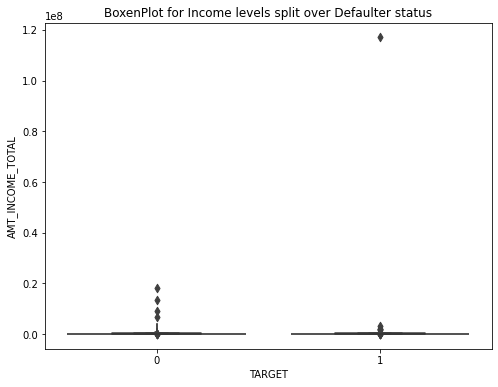

In [50]:
#Plotting the box'en' plot [can plot boxplot too] for income levels, it is observed that there is a datapoint far removed from rest of the datapoints.
plt.figure(figsize=(8,6))
sns.boxenplot(x='TARGET', y='AMT_INCOME_TOTAL', data=train_data, showfliers=True)
plt.title("BoxenPlot for Income levels split over Defaulter status")
plt.show()

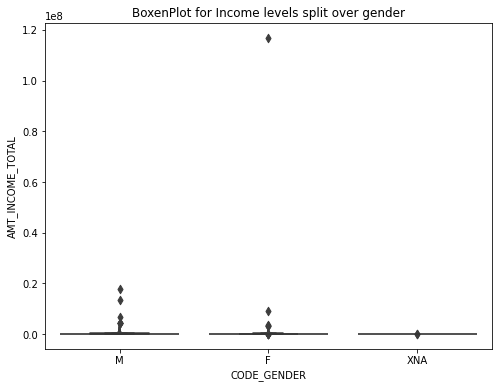

In [51]:
plt.figure(figsize=(8,6))
sns.boxenplot(x='CODE_GENDER', y='AMT_INCOME_TOTAL', data=train_data, showfliers=True)
plt.title("BoxenPlot for Income levels split over gender")
plt.show()

In [52]:
#For tring to guage whether the applicant is leveraging high income levels to wilfully default on a high credit loan, finding out the loan amount
train_data[train_data['AMT_INCOME_TOTAL']>10**8]['AMT_CREDIT']

12840    562491.0
Name: AMT_CREDIT, dtype: float32

In [53]:
#The loan amount is roughly in the mid-level spread of sanctioned amounts regardless of defaulter ratios. It does not seem high
print("The 'high-income level individual's loan amount is lower than",np.round(train_data[train_data['AMT_CREDIT']>562491].shape[0]*100/train_data.shape[0],2),"% of total applicants.")

The 'high-income level individual's loan amount is lower than 43.18 % of total applicants.


> Generating the boxenplot, it is observed that there are some extreme income levels which are skewing the distribution.
Investigating further, there is a female applicant with a very high income level who is also a defaulter. Analysing dataset further, it is observed that loan amount is almost lying in the mid-levels which 'might' be indicative of an error in recording income levels rather than a wilful defaulter.

**For further evaluations, this may be considered a case for outlier removal, assuming error in recording income levels as explained above.** 

### Ratings from External Sources

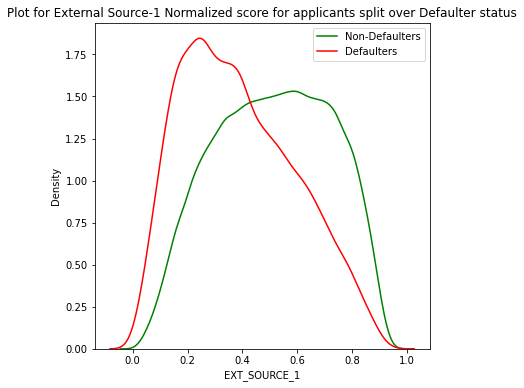

In [54]:
plt.figure(figsize=(6,6))
sns.distplot(train_data[train_data['TARGET']==0]['EXT_SOURCE_1'],hist=False,label="Non-Defaulters", color='green')
sns.distplot(train_data[train_data['TARGET']==1]['EXT_SOURCE_1'],hist=False,label="Defaulters", color='red')
plt.legend()
plt.title("Plot for External Source-1 Normalized score for applicants split over Defaulter status")
plt.show()

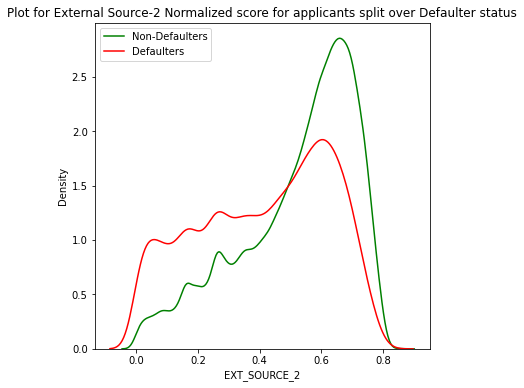

In [55]:
plt.figure(figsize=(6,6))
sns.distplot(train_data[train_data['TARGET']==0]['EXT_SOURCE_2'],hist=False,label="Non-Defaulters", color='green')
sns.distplot(train_data[train_data['TARGET']==1]['EXT_SOURCE_2'],hist=False,label="Defaulters", color='red')
plt.legend()
plt.title("Plot for External Source-2 Normalized score for applicants split over Defaulter status")
plt.show()

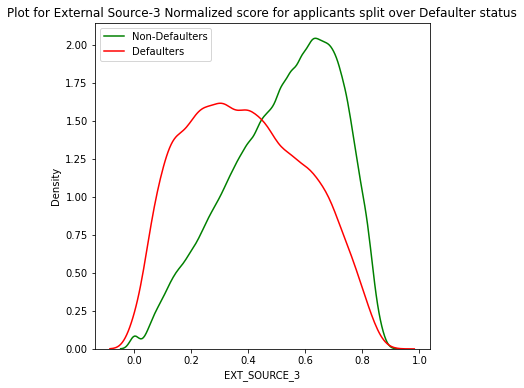

In [56]:
plt.figure(figsize=(6,6))
sns.distplot(train_data[train_data['TARGET']==0]['EXT_SOURCE_3'],hist=False,label="Non-Defaulters", color='green')
sns.distplot(train_data[train_data['TARGET']==1]['EXT_SOURCE_3'],hist=False,label="Defaulters", color='red')
plt.legend()
plt.title("Plot for External Source-3 Normalized score for applicants split over Defaulter status")
plt.show()

> The External Source Normalized scores show different natures for the different defaulter states and may prove to be an important feature.

### Loan Amount-wise split up for Defaulters

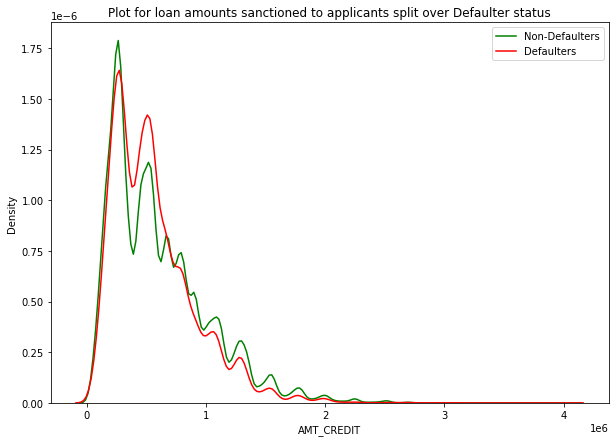

In [57]:
plt.figure(figsize=(10,7))
sns.distplot(train_data[train_data['TARGET']==0]['AMT_CREDIT'],hist=False,label="Non-Defaulters", color='green')
sns.distplot(train_data[train_data['TARGET']==1]['AMT_CREDIT'],hist=False,label="Defaulters", color='red')
plt.title("Plot for loan amounts sanctioned to applicants split over Defaulter status")
plt.legend()
plt.show()

> The graph for loan amount split over defaulter status is almost similar for both the defaulter classes, which suggests that defaulter tendency is independent of loan amount.

### Contact details [Work phone & Mobile] wise distribution

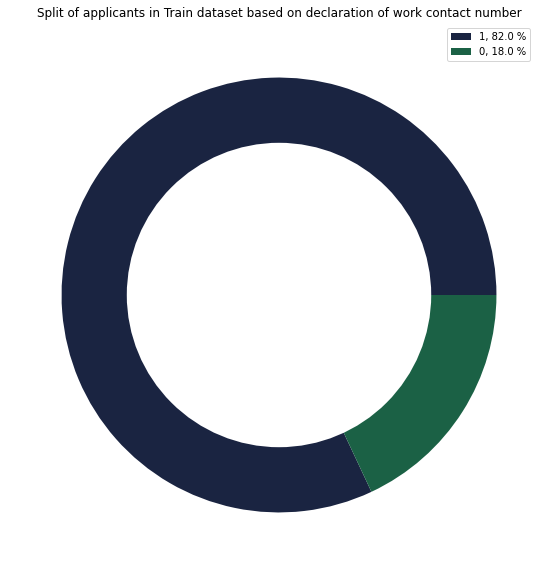

In [58]:
pie(train_data['FLAG_EMP_PHONE'].value_counts(dropna=False),train_data['FLAG_EMP_PHONE'].unique(),'Split of applicants in Train dataset based on declaration of work contact number')

+----------+--------------------+--------------------------+
| Category | Total applications | Average Default Rate [%] |
+----------+--------------------+--------------------------+
| 0        |       55386        |           5.4            |
| 1        |       252125       |           8.66           |
+----------+--------------------+--------------------------+


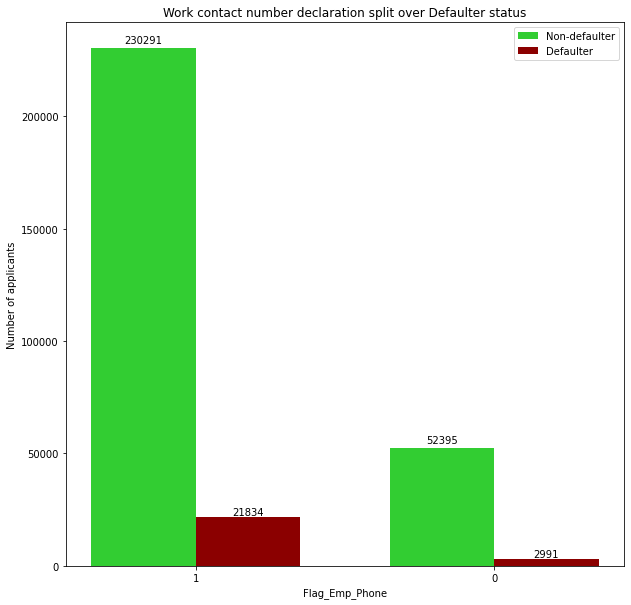

In [59]:
grouped_bar_plot(train_data['FLAG_EMP_PHONE'],train_data['TARGET'],'Work contact number declaration split over Defaulter status')

+----------+--------------------+--------------------------+
| Category | Total applications | Average Default Rate [%] |
+----------+--------------------+--------------------------+
| 0        |         1          |           0.0            |
| 1        |       307510       |           8.07           |
+----------+--------------------+--------------------------+


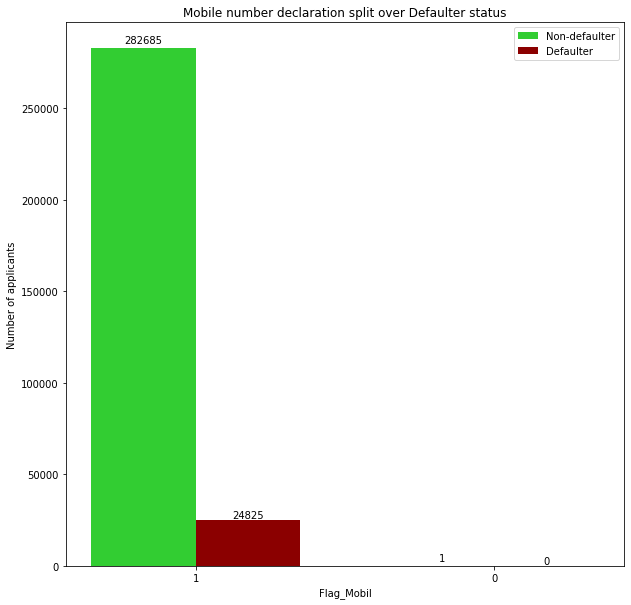

In [60]:
grouped_bar_plot(train_data['FLAG_MOBIL'],train_data['TARGET'],'Mobile number declaration split over Defaulter status')

>* It is observed that the Default tendency for those who do provide work phone number is more than those who do not. This can be attributed to the fact that the wilful defaulters might be providing their work phone numbers so that they do not get disturbed on their personal mobile phone.

## 4.2.0 Bi-variate analysis

### Income category vs. Education Qualification over defaulter status

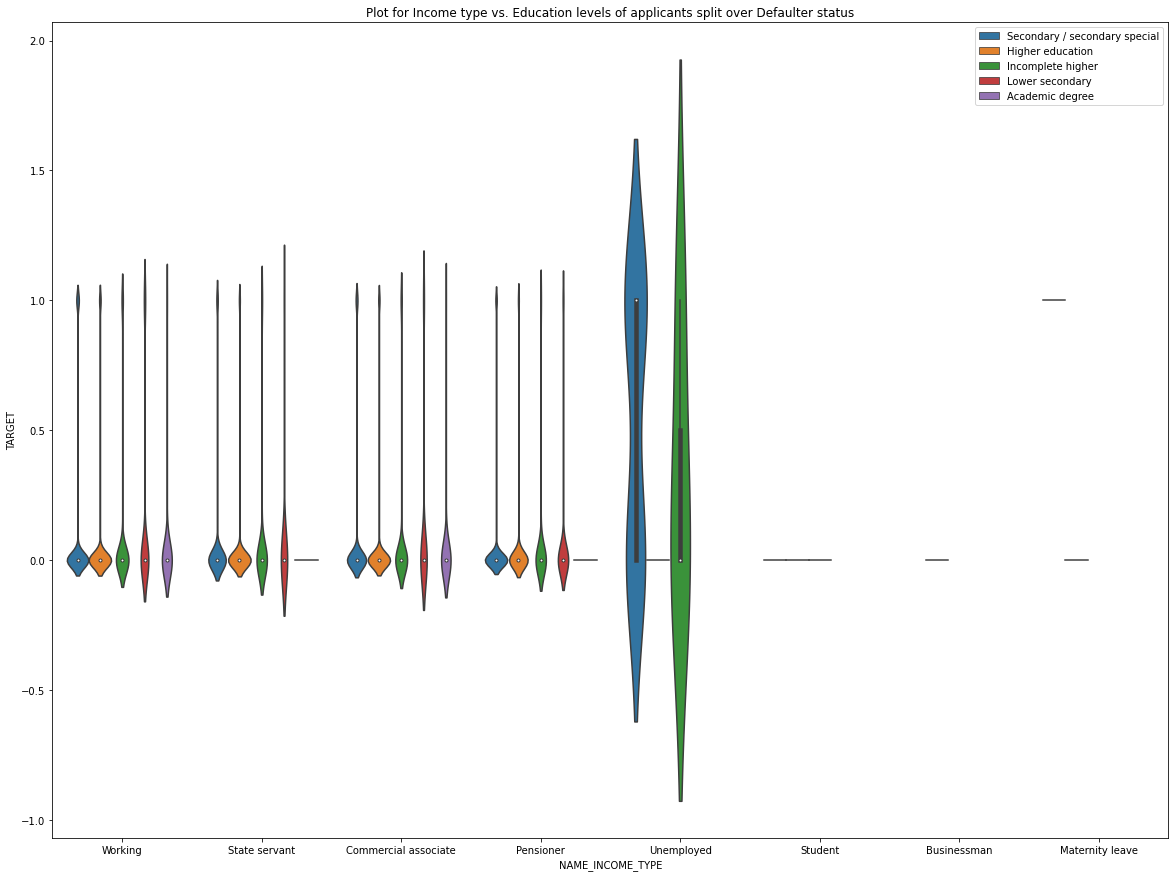

In [61]:
plt.figure(figsize=(20,15))
sns.violinplot(data=train_data, x="NAME_INCOME_TYPE", y="TARGET", hue="NAME_EDUCATION_TYPE")
plt.title("Plot for Income type vs. Education levels of applicants split over Defaulter status")
plt.legend()
plt.show()

> Visual insight regarding correlation between education, income source & defaulter status

### Loam amount vs. Annuity over defaulter status

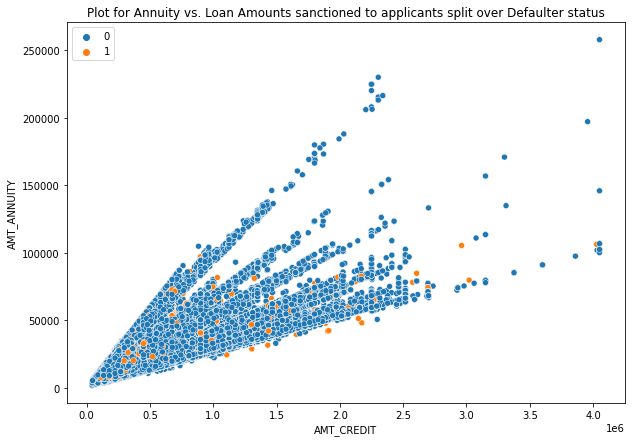

In [62]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=train_data, x="AMT_CREDIT", y="AMT_ANNUITY", hue="TARGET")
plt.title("Plot for Annuity vs. Loan Amounts sanctioned to applicants split over Defaulter status")
plt.legend()
plt.show()

>* Loan amount and Annuity are directly proportional to each other which is logical. If the loan amount is high, the annuity amount for the same will also be high.
>* However, the defaulters are split almost uniformly over the entire space which makes logistic regression'esque binary classification almost useless.

### Duration of Employment vs. Loan amount over defaulter status

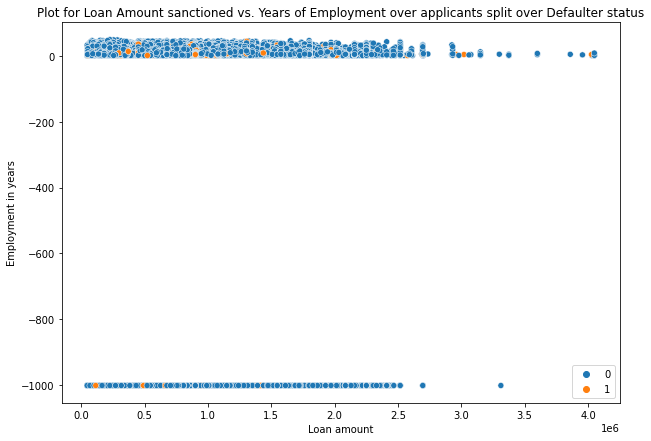

In [63]:
plt.figure(figsize=(10,7))
y_data=train_data['DAYS_EMPLOYED']*-1/365
sns.scatterplot(data=train_data, x="AMT_CREDIT", y=y_data, hue="TARGET")
plt.title("Plot for Loan Amount sanctioned vs. Years of Employment over applicants split over Defaulter status")
plt.xlabel('Loan amount') 
plt.ylabel('Employment in years') 
plt.legend()
plt.show()

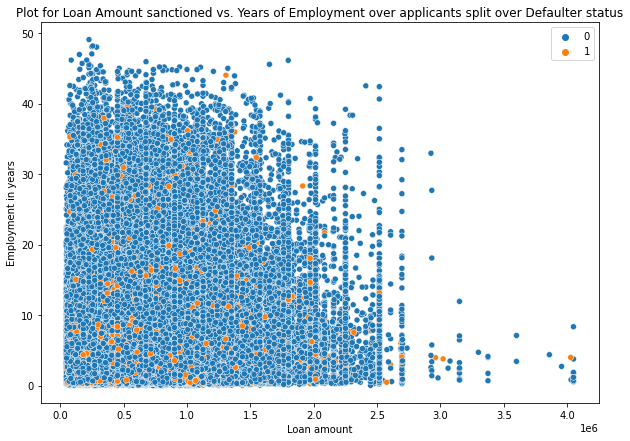

In [64]:
y_data= y_data[y_data>0]
y_data= y_data[y_data<75]
y_data
plt.figure(figsize=(10,7))
sns.scatterplot(data=train_data, x="AMT_CREDIT", y=y_data, hue="TARGET")
plt.title("Plot for Loan Amount sanctioned vs. Years of Employment over applicants split over Defaulter status")
plt.xlabel('Loan amount') 
plt.ylabel('Employment in years') 
plt.legend()
plt.show()

> The first graph indicates weird values for days/years of employment. Hence this is also a case for outlier detection.
Upon plotting with sanitized values, one can see defaulters are somewhat concentrated towards lower left side indicating lower employment as well as lower loan amounts.

## 4.3.0 Correlations among the features and with the 'Target'

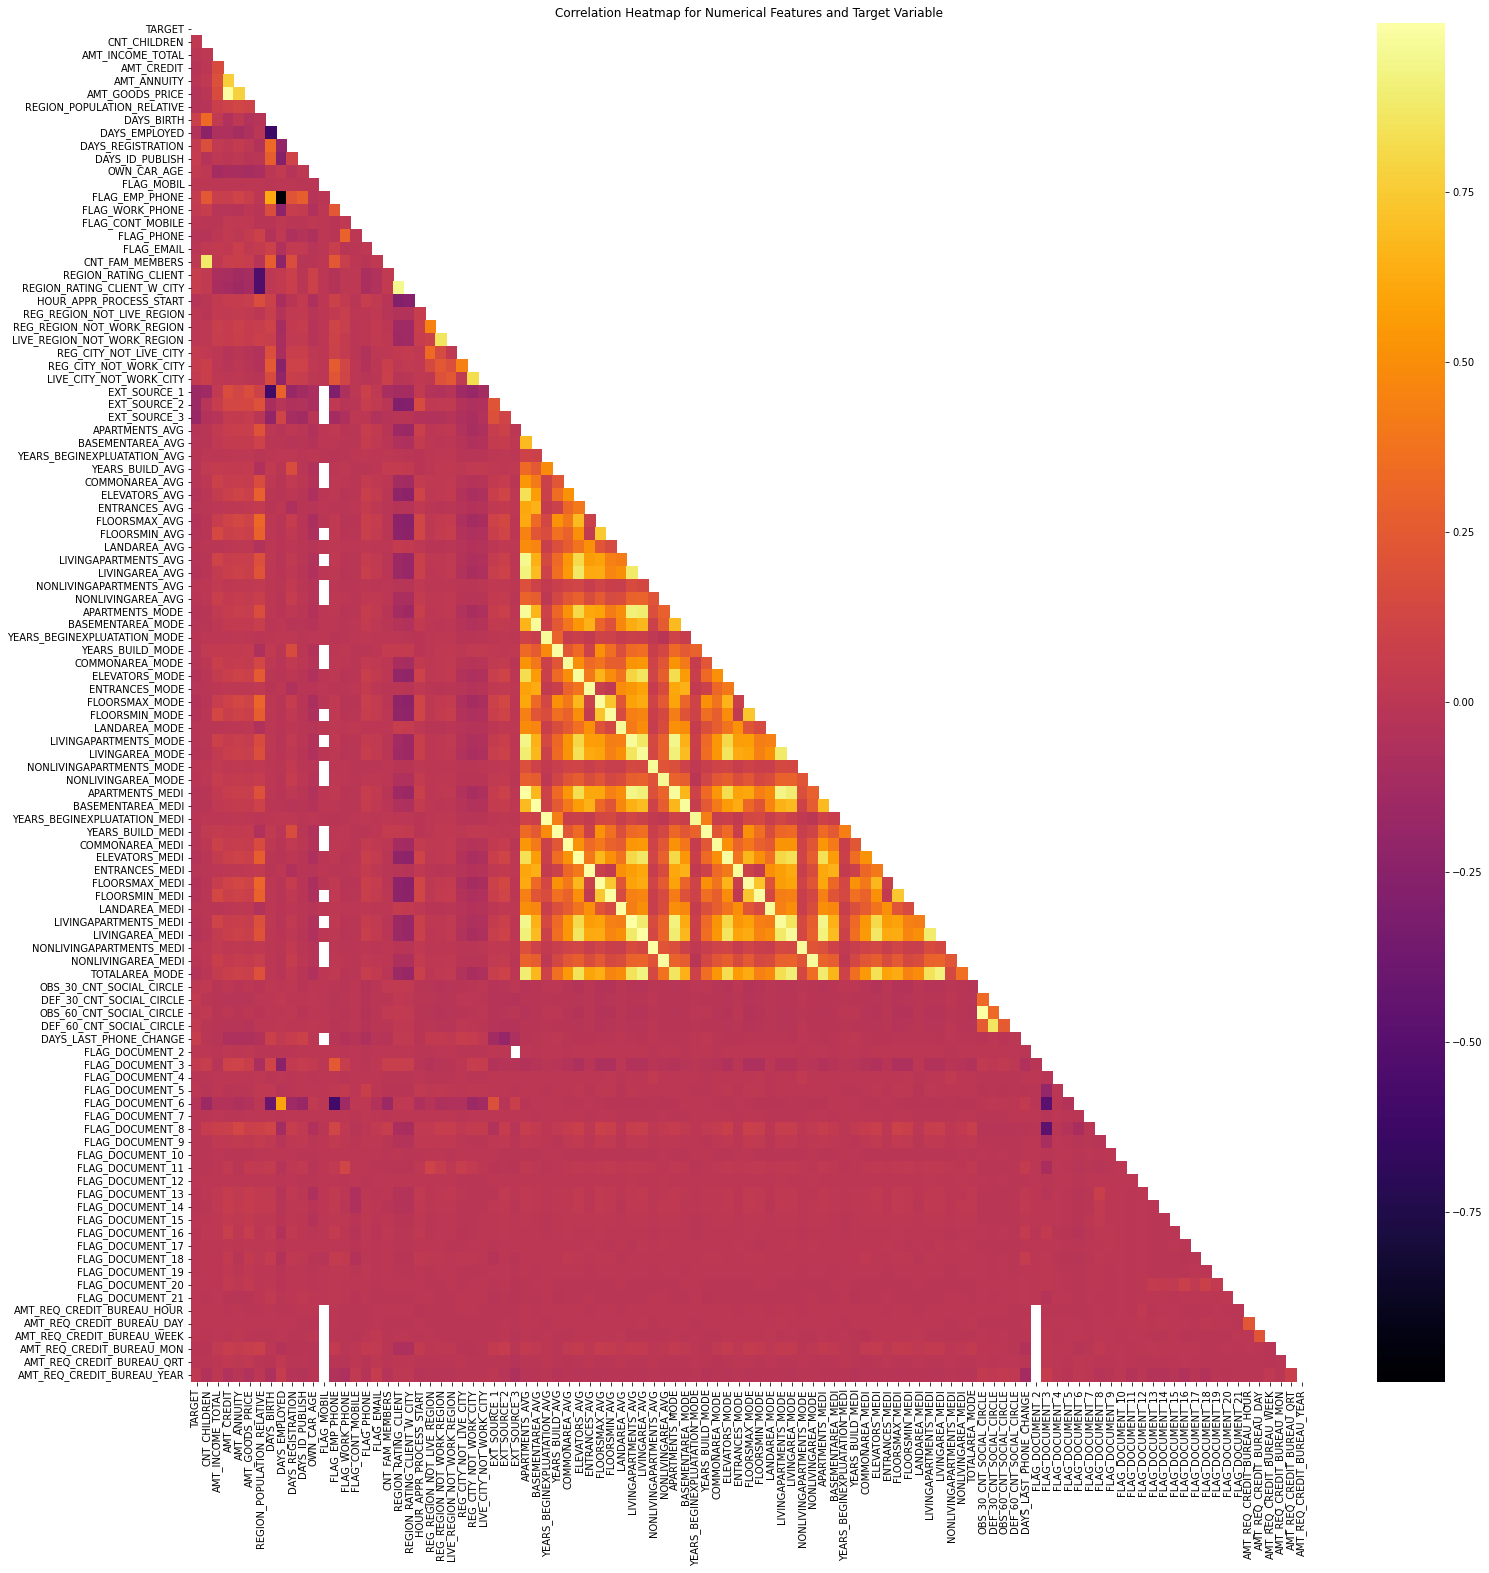


The top 10 numerical features correlated with Target variable are:
+-----------------------------+-------------------------+
| Feature                     | Correlation with Target |
+-----------------------------+-------------------------+
| DAYS_BIRTH                  |                  0.0782 |
| REGION_RATING_CLIENT_W_CITY |                  0.0609 |
| REGION_RATING_CLIENT        |                  0.0589 |
| DAYS_LAST_PHONE_CHANGE      |                  0.0552 |
| DAYS_ID_PUBLISH             |                  0.0515 |
| REG_CITY_NOT_WORK_CITY      |                   0.051 |
| FLAG_EMP_PHONE              |                   0.046 |
| REG_CITY_NOT_LIVE_CITY      |                  0.0444 |
| FLAG_DOCUMENT_3             |                  0.0443 |
| DAYS_REGISTRATION           |                   0.042 |
+-----------------------------+-------------------------+





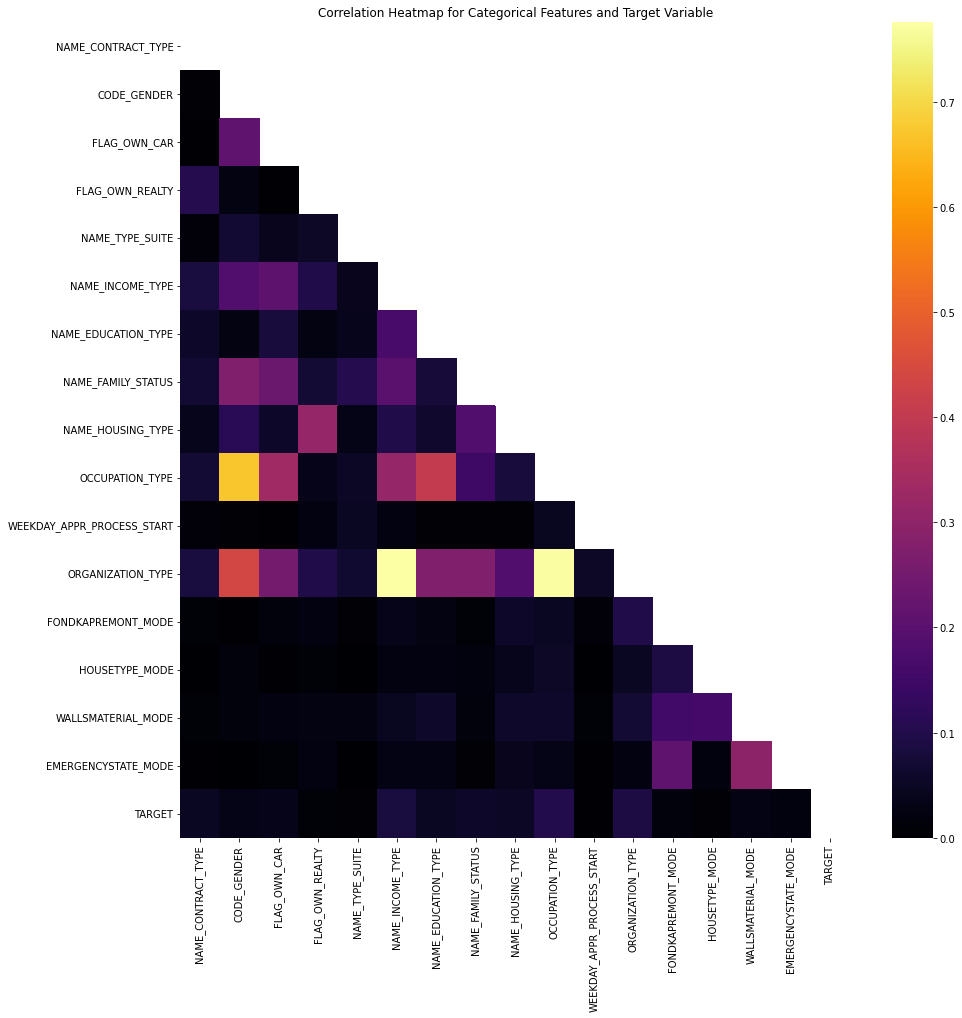


The top 10 categorical features correlated with Target variable are:
+---------------------+-------------------------+
| Feature             | Correlation with Target |
+---------------------+-------------------------+
| OCCUPATION_TYPE     |                  0.1028 |
| ORGANIZATION_TYPE   |                  0.0892 |
| NAME_INCOME_TYPE    |                  0.0848 |
| NAME_FAMILY_STATUS  |                   0.056 |
| NAME_HOUSING_TYPE   |                  0.0511 |
| NAME_CONTRACT_TYPE  |                  0.0484 |
| NAME_EDUCATION_TYPE |                   0.047 |
| FLAG_OWN_CAR        |                  0.0342 |
| CODE_GENDER         |                  0.0329 |
| WALLSMATERIAL_MODE  |                  0.0277 |
+---------------------+-------------------------+


In [ ]:
correlation_matrix(train_data)

>* From the heatmaps, it can be observed that most of the features are not correlated to others.
Specifically, from the heatmap of Numerical features,it is observed that most of the features are not correlated to each other. However, those that have; show strong correlation.
>* For example, REGION_RATING_CLIENT_W_CITY and REGION_RATING_CLIENT have a high correlation - This is understandable as they are pertaining to very similar contexts.
>* Strong correlations are observed at the middle of the heatmap. These are the features pertaining to the stats of the apartments.This can be attributed to the fact that statistics of apartments are given in terms of Mean, Median and Mode, so it can be expected for the mean, median and mode to be correlated with each other.
>* Some correlation between the Organization type and the income type of a client is also observed as is seen between the Occupation Type and the Organization Type.
>* Importantly, the category OCCUPATION_TYPE, ORGANIZATION_TYPE, NAME_INCOME_TYPE are some of the highest correlated categories with the TARGET variable as in the table.
>* A high correlation between AMT_GOODS_PRICE and AMT_CREDIT as well as between DAYS_EMPLOYED and DAYS_BIRTH, which is logical as they are related to one another.

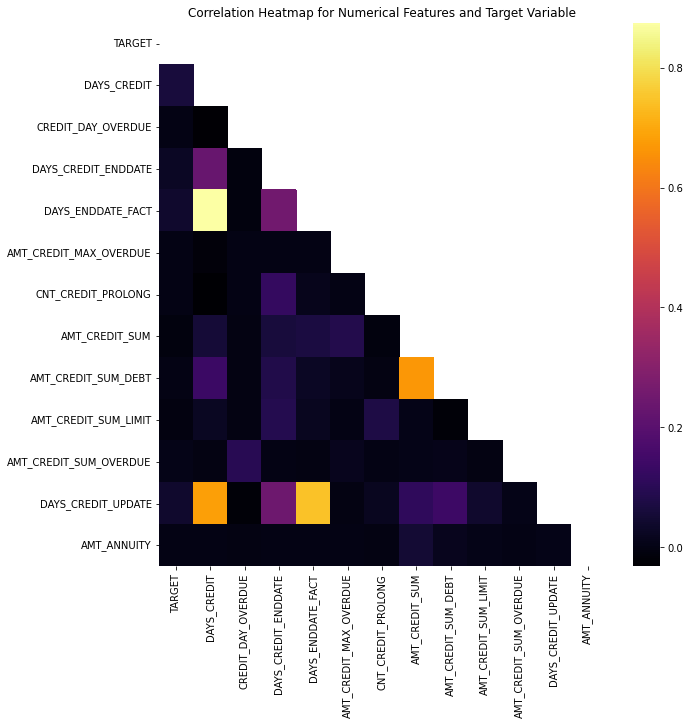


The top 10 numerical features correlated with Target variable are:
+------------------------+-------------------------+
| Feature                | Correlation with Target |
+------------------------+-------------------------+
| DAYS_CREDIT            |                  0.0616 |
| DAYS_CREDIT_UPDATE     |                  0.0411 |
| DAYS_ENDDATE_FACT      |                  0.0391 |
| DAYS_CREDIT_ENDDATE    |                  0.0265 |
| AMT_CREDIT_SUM_OVERDUE |                  0.0063 |
| CREDIT_DAY_OVERDUE     |                  0.0027 |
| AMT_CREDIT_SUM_DEBT    |                  0.0025 |
| AMT_CREDIT_MAX_OVERDUE |                  0.0016 |
| CNT_CREDIT_PROLONG     |                  0.0015 |
| AMT_ANNUITY            |                  0.0001 |
+------------------------+-------------------------+





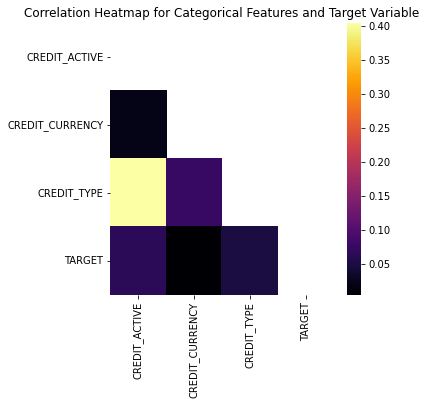


The top 3 categorical features correlated with Target variable are:
+-----------------+-------------------------+
| Feature         | Correlation with Target |
+-----------------+-------------------------+
| CREDIT_ACTIVE   |                  0.0645 |
| CREDIT_TYPE     |                    0.05 |
| CREDIT_CURRENCY |                   0.005 |
+-----------------+-------------------------+


In [ ]:
correlation_matrix(bureau_data)

>* The heatmaps above shows the correlation between each feature in bureau table with the rest of the features.
>* It can be observed that most of the features have little to no correlation with the other features.
>* However, of the ones that have, there is quite a high degree of correlation observed.
>* It can also be deduced that the features don't particularly show good/high correlation with Target variable, except for DAYS_CREDIT feature, implying that htere may not exist, any linear relation between Target variable and the features.

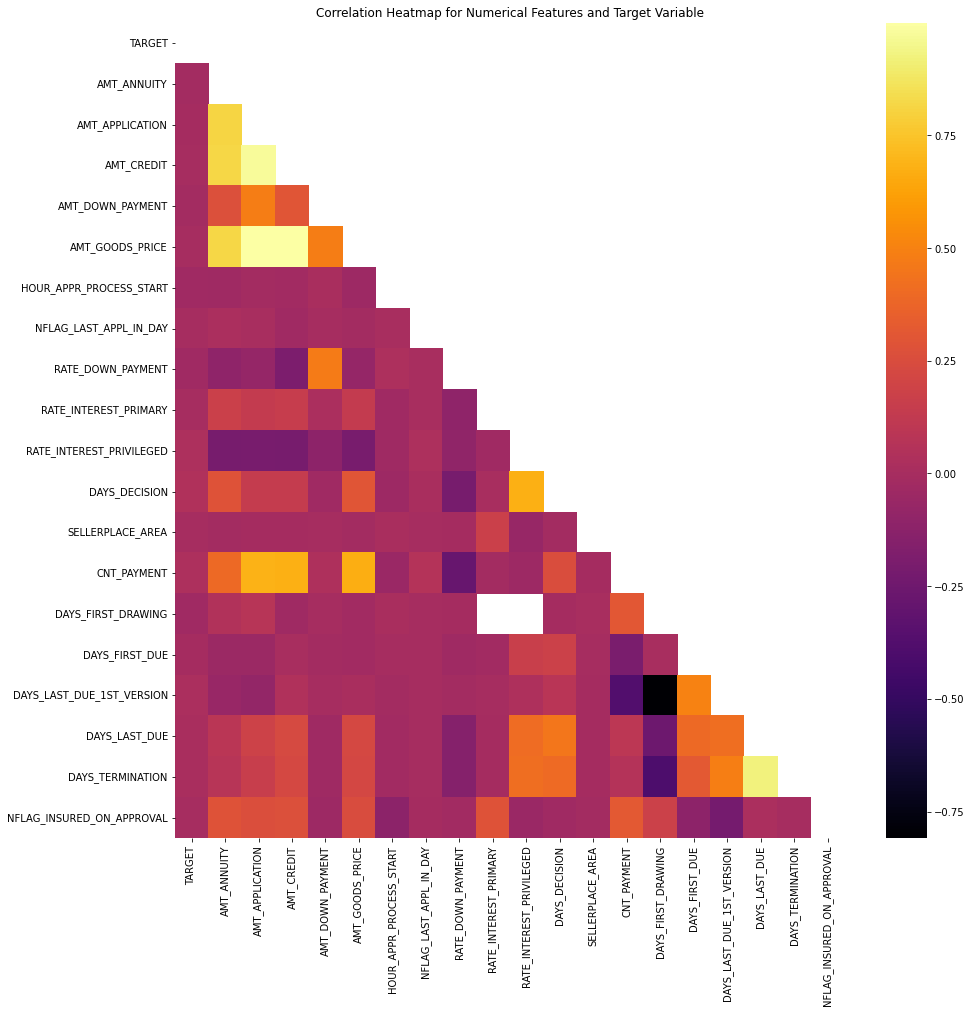


The top 9 numerical features correlated with Target variable are:
+---------------------------+-------------------------+
| Feature                   | Correlation with Target |
+---------------------------+-------------------------+
| DAYS_DECISION             |                  0.0399 |
| CNT_PAYMENT               |                  0.0305 |
| RATE_INTEREST_PRIVILEGED  |                  0.0286 |
| DAYS_LAST_DUE_1ST_VERSION |                   0.018 |
| DAYS_LAST_DUE             |                  0.0175 |
| DAYS_TERMINATION          |                   0.017 |
| NFLAG_INSURED_ON_APPROVAL |                  0.0007 |
| AMT_GOODS_PRICE           |                  0.0003 |
| RATE_INTEREST_PRIMARY     |                 -0.0015 |
+---------------------------+-------------------------+





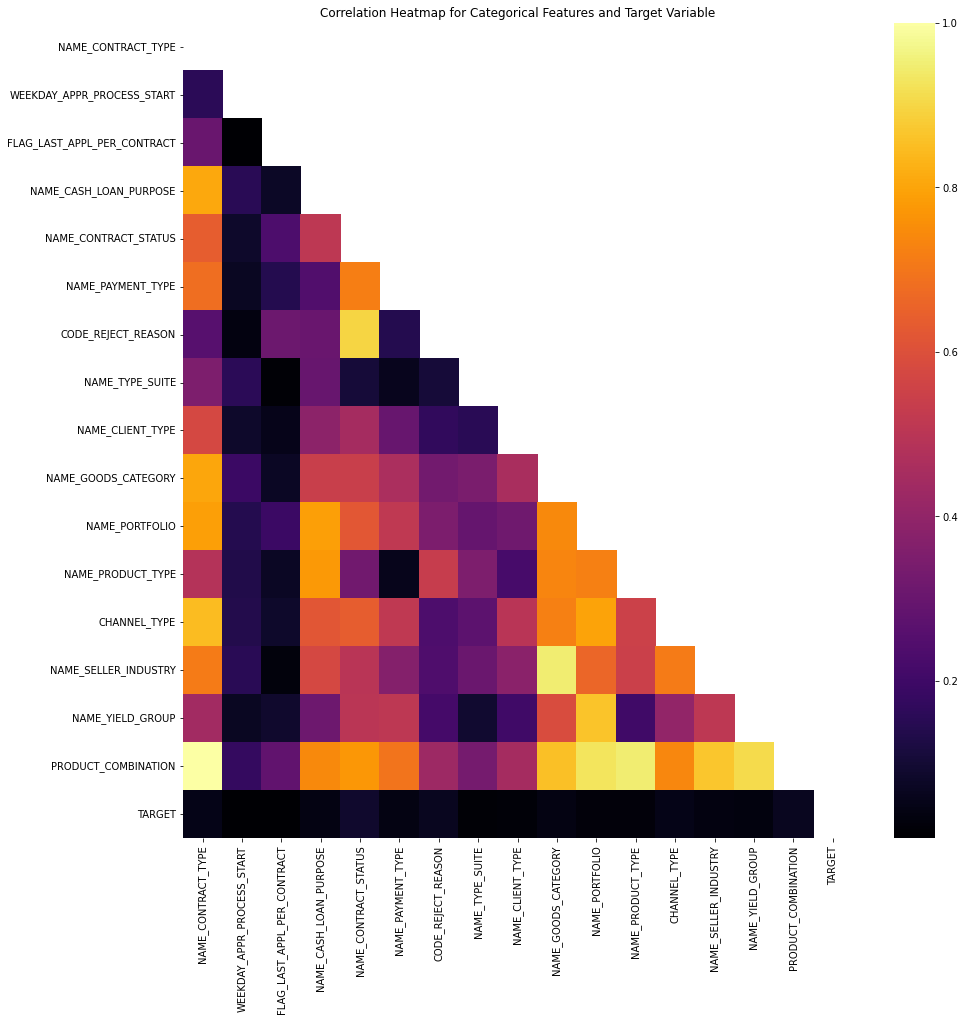


The top 10 categorical features correlated with Target variable are:
+------------------------+-------------------------+
| Feature                | Correlation with Target |
+------------------------+-------------------------+
| NAME_CONTRACT_STATUS   |                  0.0883 |
| PRODUCT_COMBINATION    |                  0.0638 |
| CODE_REJECT_REASON     |                  0.0628 |
| NAME_CONTRACT_TYPE     |                  0.0509 |
| CHANNEL_TYPE           |                  0.0503 |
| NAME_GOODS_CATEGORY    |                   0.043 |
| NAME_CASH_LOAN_PURPOSE |                  0.0403 |
| NAME_PAYMENT_TYPE      |                  0.0398 |
| NAME_SELLER_INDUSTRY   |                  0.0381 |
| NAME_YIELD_GROUP       |                  0.0346 |
+------------------------+-------------------------+


In [ ]:
correlation_matrix(prev_app_data)

>* The heatmaps above shows the correlation between each feature in previous application table with the rest of the features.
>* Most of the numerical features are not quite correlated with oe another.
>* The high correlations observed are explainable as the one between AMT_ANNUITY and AMT_CREDIT or AMT_GOODS_PRICE as these do have a relation between them.
>* Also, no significant correlarion is observed between the TARGET variable and the features.
>* Regarding the categorical features, there are some correlations among features observed. However, none seem to have any correlation with the TARGET variable.

In [ ]:
bureau_balance_data_corr_merged=bureau_data.iloc[:,:2].merge(bureau_balance_data, on = 'SK_ID_BUREAU', how = 'left')
bureau_balance_data_corr_merged.name='Bureau Balance Data_Merged.'
#correlation_matrix(bureau_balance_data_corr_merged)
#bureau_data.iloc[:,:1]

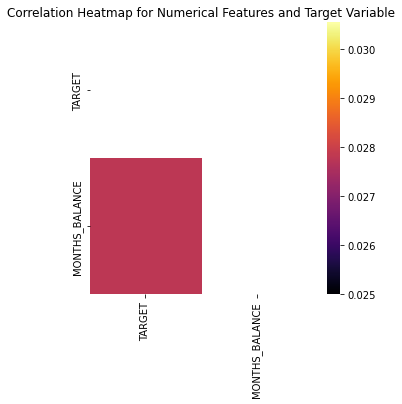


The top 1 numerical features correlated with Target variable are:
+----------------+-------------------------+
| Feature        | Correlation with Target |
+----------------+-------------------------+
| MONTHS_BALANCE |                  0.0278 |
+----------------+-------------------------+





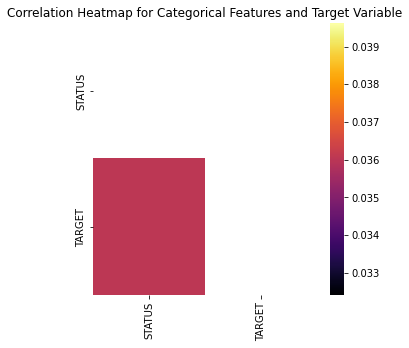


The top 1 categorical features correlated with Target variable are:
+---------+-------------------------+
| Feature | Correlation with Target |
+---------+-------------------------+
| STATUS  |                   0.036 |
+---------+-------------------------+


In [ ]:
correlation_matrix(bureau_balance_data_corr_merged)

>* The heatmaps above shows the correlation between each feature in bureau balance dataset with the rest of the features.
>* There are only 2 features - one categorical and 1 numerical.
>* None have any strong correlation with the TARGET variable.

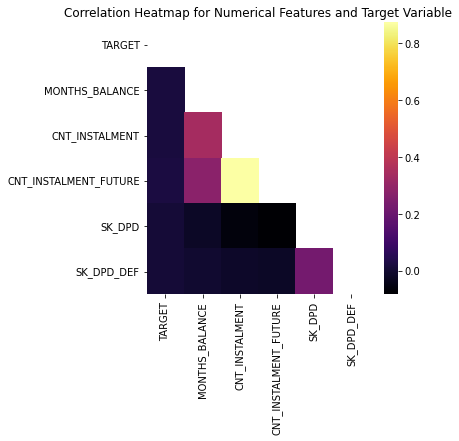


The top 5 numerical features correlated with Target variable are:
+-----------------------+-------------------------+
| Feature               | Correlation with Target |
+-----------------------+-------------------------+
| CNT_INSTALMENT_FUTURE |                   0.022 |
| MONTHS_BALANCE        |                  0.0201 |
| CNT_INSTALMENT        |                  0.0185 |
| SK_DPD                |                  0.0099 |
| SK_DPD_DEF            |                  0.0086 |
+-----------------------+-------------------------+





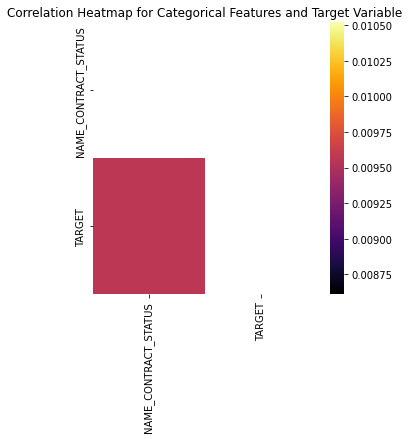


The top 1 categorical features correlated with Target variable are:
+----------------------+-------------------------+
| Feature              | Correlation with Target |
+----------------------+-------------------------+
| NAME_CONTRACT_STATUS |                  0.0096 |
+----------------------+-------------------------+


In [ ]:
correlation_matrix(prev_app_POS_cash_bal_data)

>* The heatmaps above shows the correlation between each feature in Previous Application POS Cash balance dataset, with the rest of the features.
>* Among numerical features, none are particularly correlated to another except CNT_INSTALMENT & CNT_INSTALMENT_FUTURE. Also, none are particularly correlated with the TARGET variable.
>* Among the categorical features, only 1 actually; none have any strong correlation with the TARGET variable.

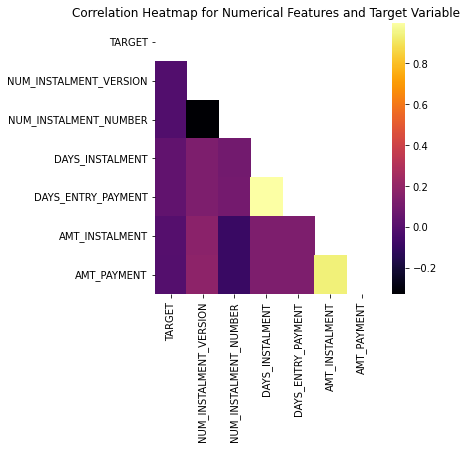


The top 6 numerical features correlated with Target variable are:
+------------------------+-------------------------+
| Feature                | Correlation with Target |
+------------------------+-------------------------+
| DAYS_ENTRY_PAYMENT     |                  0.0351 |
| DAYS_INSTALMENT        |                   0.035 |
| AMT_INSTALMENT         |                 -0.0015 |
| AMT_PAYMENT            |                 -0.0036 |
| NUM_INSTALMENT_VERSION |                 -0.0099 |
| NUM_INSTALMENT_NUMBER  |                 -0.0162 |
+------------------------+-------------------------+





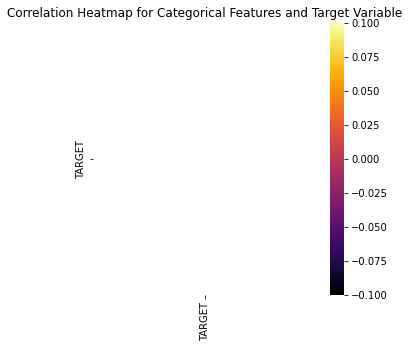


The top 0 categorical features correlated with Target variable are:
+---------+-------------------------+
| Feature | Correlation with Target |
+---------+-------------------------+
+---------+-------------------------+


In [ ]:
correlation_matrix(prev_app_instalment_payments_data)

>* The heatmaps above shows the correlation between each feature in previous applications instalment payments dataset with the rest of the features.
>* Among the numerical features, none are significantly correlated with the TARGET variable. The correlation that exists between the features is explainable by the defination of the features and is expected. 
>* There are no categorical features for assessment.

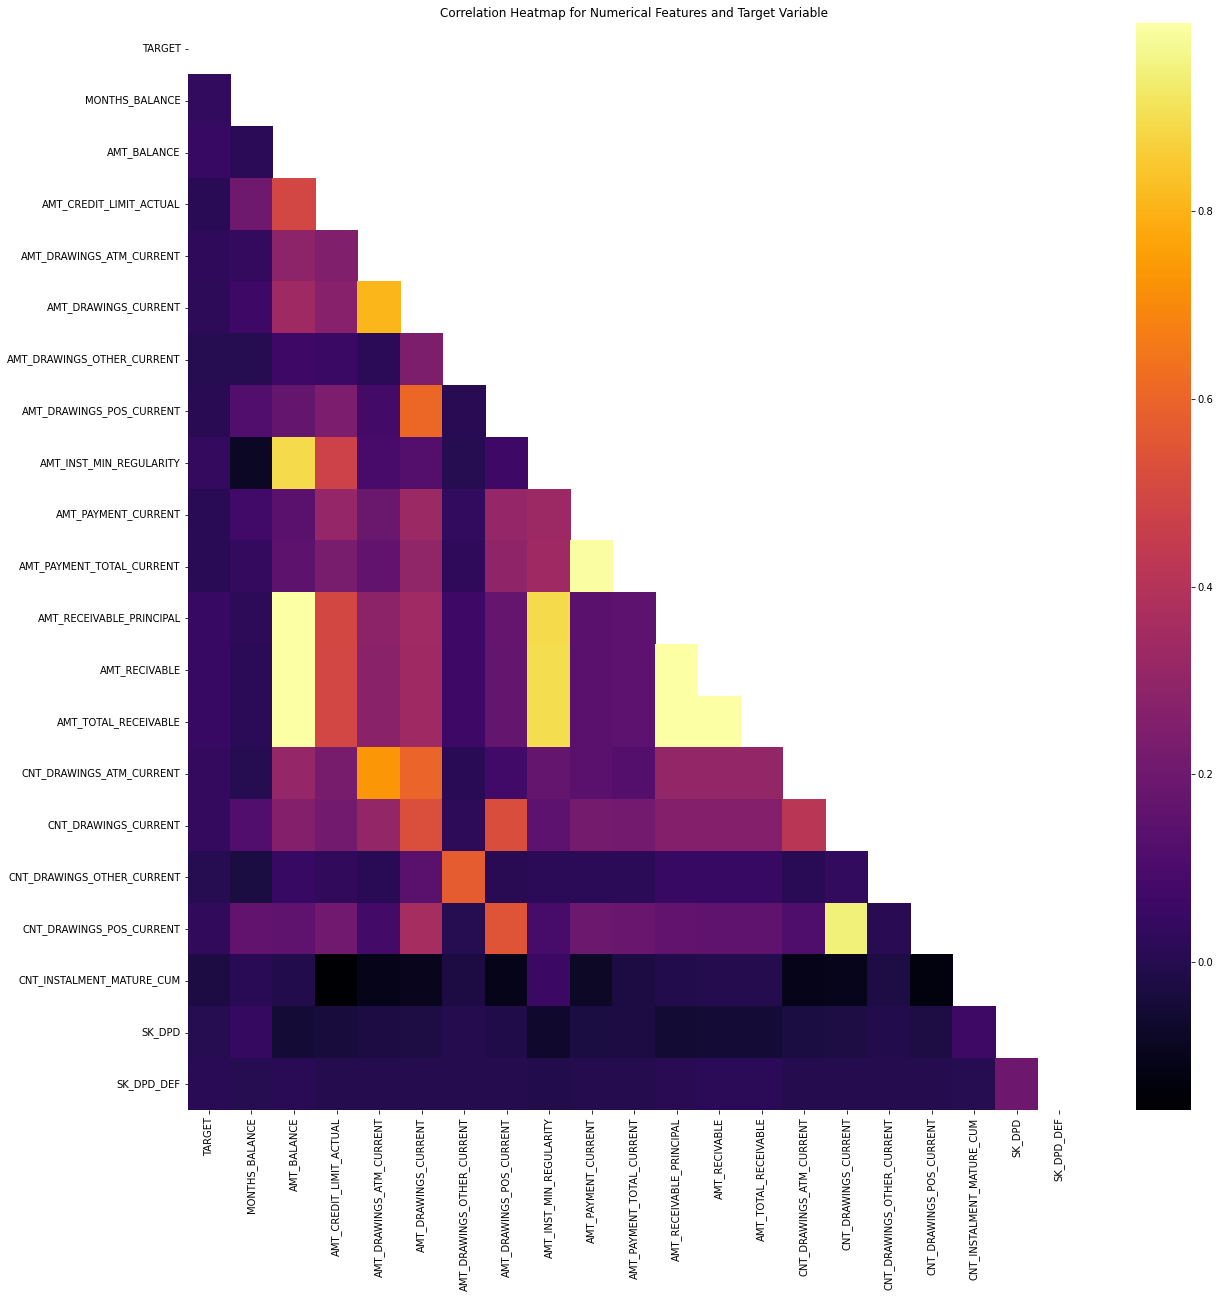


The top 10 numerical features correlated with Target variable are:
+--------------------------+-------------------------+
| Feature                  | Correlation with Target |
+--------------------------+-------------------------+
| AMT_BALANCE              |                  0.0501 |
| AMT_TOTAL_RECEIVABLE     |                  0.0498 |
| AMT_RECIVABLE            |                  0.0498 |
| AMT_RECEIVABLE_PRINCIPAL |                  0.0497 |
| AMT_INST_MIN_REGULARITY  |                  0.0398 |
| CNT_DRAWINGS_ATM_CURRENT |                  0.0384 |
| CNT_DRAWINGS_CURRENT     |                  0.0378 |
| MONTHS_BALANCE           |                  0.0357 |
| CNT_DRAWINGS_POS_CURRENT |                  0.0295 |
| AMT_DRAWINGS_ATM_CURRENT |                  0.0247 |
+--------------------------+-------------------------+





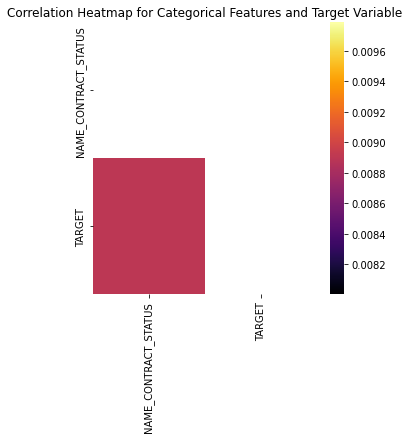


The top 1 categorical features correlated with Target variable are:
+----------------------+-------------------------+
| Feature              | Correlation with Target |
+----------------------+-------------------------+
| NAME_CONTRACT_STATUS |                  0.0089 |
+----------------------+-------------------------+


In [ ]:
correlation_matrix(prev_app_credit_card_balance_data)

>* The heatmaps above shows the correlation between each feature in Previous application credit card balance dataset with the rest of the features.
>* Among the numerical features, none are significantly correlated with the TARGET variable. The correlation that exists between the features is explainable by the defination of the features and is expected.
>* Only 1 categorical feature exists and it doesn not have any significant correlation with the TARGET variable.

---
# 5.0.0 Feature Extraction & Preliminary Feature Engineering
---

## 5.1.0 Creating additional features based on Domain-specific context and intution

Upon literature survey and review of content pertaining to Finance & Lending sector, some ratios are prevalent across various sources, which seem to indicate an applicant's financial state and probably, the repayment capability to a significant extent.
These Domain knowledge-based ratios with context to the feature fields available in this specific Home Credit dataset are - 

* **Debt-to-Income Ratio** - This is the ratio of loan annuity (AMT_ANNUITY) and income (AMT_INCOME_TOTAL) of the applicants.

* **Loan-to-Value Ratio** - This is the ratio of loan amount (AMT_CREDIT) and price of the goos for which loan is given (AMT_GOODS_PRICE) to the applicants.

* **Loan-to-Income Ratio** - This is the ratio of loan amount (AMT_CREDIT) and income (AMT_INCOME_TOTAL) of the applicants.


These ratios shall be created for the Application Train & Test dataset and shall be the 'extracted' features.

In [65]:
#Feature 'Debt-to-Income' ratio created for application train & test datasets
train_data['DEBT_INCOME_RATIO']=train_data['AMT_ANNUITY']/train_data['AMT_INCOME_TOTAL']
test_data['DEBT_INCOME_RATIO']=test_data['AMT_ANNUITY']/test_data['AMT_INCOME_TOTAL']

#Feature 'Loan-to-Value' ratio created for application train & test datasets
train_data['LOAN_VALUE_RATIO']=train_data['AMT_CREDIT']/train_data['AMT_GOODS_PRICE']
test_data['LOAN_VALUE_RATIO']=test_data['AMT_CREDIT']/test_data['AMT_GOODS_PRICE']

#Feature 'Loan-to-Income' ratio created for application train & test datasets
train_data['LOAN_INCOME_RATIO']=train_data['AMT_CREDIT']/train_data['AMT_INCOME_TOTAL']
test_data['LOAN_INCOME_RATIO']=test_data['AMT_CREDIT']/test_data['AMT_INCOME_TOTAL']

print(train_data.shape)
print(test_data.shape)

(307511, 125)
(48744, 124)


## 5.2.0 Merging the datasets

> As evidenced in the Venn Diagram, there is a very significant overlap between applicants in the Train, Test and the Bureau, Previous Home Credit applications database.
This can lead to two cases - 
* **Aproach 1**- Using the Bureau and Previous applications data by merging them with the Train & Test datasets. This has the advantage that greater information is being used to model the problem at hand. However, one aspect is the fact that prior credit history is being used which might be akin to introducing bias against first-time credit seekers or those with no/limited credit history, thoose whom Home Credit seeks to include.
* **Approach 2**- Not using the additional datasets in order to base model strictly on the outcome of of the features in Train, test set. Here, features such as EXT Source are still a kind of past records but can be considered as long as its deemed important.

For this phase, Approach-1 is followed.

### 5.2.1 Bureau dataset merger with the Application Train & Test datasets

> The Bureau dataset is merged with the Application Train dataset over the 'SK_ID_CURR' feature which is common to both the datasets.
As there are multiple entries against a unique applicant ID in bureau dataset, the following strategy is employed while merging - 
* Mean of Numerical features is taken so as to consider the complete representation of all the recorded entries.
* median of Categorical features is taken so as to stick to the majority of the classes of that feature.

In [66]:
#Maintaining a list of numerical and categorical features
numerical_features_list=train_data.select_dtypes(exclude=object).columns.tolist()
categorical_features_list=train_data.select_dtypes(include=object).columns.tolist()
numerical_features_list.remove("SK_ID_CURR")
numerical_features_list.remove("TARGET")
print(numerical_features_list)
print(categorical_features_list)

['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAR

In [67]:
#Checking for common column/feature names between the 2 DFs, except SK_ID_CURR which is the basis of merging
bureau_data.columns.intersection(train_data.columns).tolist()

['SK_ID_CURR', 'AMT_ANNUITY']

In [68]:
#Renaming the column to avoid any wierd stuff
bureau_data.rename(columns={"AMT_ANNUITY": "BUREAU_AMT_ANNUITY"}, inplace = True)

In [69]:
#Preparing the Bureau dataset for merging
#Numerical features of Bureau dataset as a separate dataset
bureau_data_numerical=bureau_data.select_dtypes(exclude=object)
#Categorical features of Bureau dataset as a separate dataset
bureau_data_categorical=bureau_data.select_dtypes(include=object)

In [70]:
#Merging the Bureau numerical features into the Train dataset by taking mean of multiple entries corresponding to a single applicant's SK_ID_CURR. 
bureau_data_numerical_to_merge=bureau_data_numerical.groupby(by=['SK_ID_CURR']).mean()
train_data_bureau_num_merged=train_data.merge(bureau_data_numerical_to_merge, on='SK_ID_CURR', how='left', suffixes=('__left', ))
train_data_bureau_num_merged.columns = train_data_bureau_num_merged.columns.str.replace('__left', '')

In [71]:
#Merging the Bureau categorical features into the Train dataset by taking median of multiple entries corresponding to a single applicant's SK_ID_CURR. 
bureau_data_categorical_to_merge = pd.get_dummies(bureau_data_categorical)
bureau_data_categorical_to_merge['SK_ID_CURR'] = bureau_data['SK_ID_CURR']#Basis for merging
bureau_data_categorical_to_merge = bureau_data_categorical_to_merge.groupby(by = ['SK_ID_CURR']).median()
train_data_bureau_merged = train_data_bureau_num_merged.merge(bureau_data_categorical_to_merge, on='SK_ID_CURR', how='left')
train_data_bureau_merged.update(train_data_bureau_merged[bureau_data_categorical_to_merge.columns].fillna(0))
train_data_bureau_merged.columns = train_data_bureau_merged.columns.str.replace('__left', '')

In [72]:
train_data_bureau_merged=train_data_bureau_merged.drop(columns = ['SK_ID_BUREAU'])#Dropping SK_ID_BUREAU from merged dataset
print(train_data_bureau_merged.shape)

(307511, 160)


In [73]:
numerical_features_list = numerical_features_list + bureau_data_numerical_to_merge.columns.tolist()
categorical_features_list = categorical_features_list + bureau_data_categorical_to_merge.columns.tolist()
#numerical_features_list.remove("SK_ID_CURR")
numerical_features_list.remove("SK_ID_BUREAU")

In [74]:
test_data_bureau_num_merged=test_data.merge(bureau_data_numerical_to_merge, on='SK_ID_CURR', how='left', suffixes=('__left', ))
test_data_bureau_num_merged.columns = test_data_bureau_num_merged.columns.str.replace('__left', '')

test_data_bureau_merged = test_data_bureau_num_merged.merge(bureau_data_categorical_to_merge, on='SK_ID_CURR', how='left')
test_data_bureau_merged.update(test_data_bureau_merged[bureau_data_categorical_to_merge.columns].fillna(0))
test_data_bureau_merged.columns = test_data_bureau_merged.columns.str.replace('__left', '')

In [75]:
test_data_bureau_merged = test_data_bureau_merged.drop(columns = ['SK_ID_BUREAU'])#Dropping SK_ID_BUREAU from merged dataset
print(test_data_bureau_merged.shape)

(48744, 159)


### 5.2.2 Previous Application dataset merger with the Application Train & Test datasets

> The Previous Application data is also merged with the Application Train dataset following the exact same methodology as was done for merging the Bureau dataset.

In [76]:
#Checking for common column/feature names between the 2 DFs, except SK_ID_CURR which is the basis of merging
prev_com_names=prev_app_data.columns.intersection(train_data.columns).tolist()

In [77]:
prev_com_names_renamed=[]
for i in prev_com_names:
  if i!='SK_ID_CURR':
    prev_com_names_renamed.append('PREV_'+i)
  else:
    prev_com_names_renamed.append(i)
print(prev_com_names_renamed)

#Renaming the column to avoid any wierd stuff
for i in range(len(prev_com_names)):
  prev_app_data.rename(columns={prev_com_names[i]: prev_com_names_renamed[i]}, inplace = True)

['SK_ID_CURR', 'PREV_NAME_CONTRACT_TYPE', 'PREV_AMT_ANNUITY', 'PREV_AMT_CREDIT', 'PREV_AMT_GOODS_PRICE', 'PREV_WEEKDAY_APPR_PROCESS_START', 'PREV_HOUR_APPR_PROCESS_START', 'PREV_NAME_TYPE_SUITE']


In [78]:
#Preparing the Previous Application dataset for merging
#Numerical features of Previous Application dataset as a separate dataset
prev_app_data_numerical=prev_app_data.select_dtypes(exclude=object)
#Categorical features of Previous Application dataset as a separate dataset
prev_app_data_categorical=prev_app_data.select_dtypes(include=object)

In [79]:
#Merging the Previous Application numerical features into the Train dataset by taking mean of multiple entries corresponding to a single applicant's SK_ID_CURR. 
prev_app_data_numerical_to_merge=prev_app_data_numerical.groupby(by=['SK_ID_CURR']).mean()
train_data_bureau_prev_app_num_merged=train_data_bureau_merged.merge(prev_app_data_numerical_to_merge, on='SK_ID_CURR', how='left', suffixes=('__left', ))
train_data_bureau_prev_app_num_merged.columns = train_data_bureau_prev_app_num_merged.columns.str.replace('__left', '')

In [80]:
#Merging the Previous Application categorical features into the Train dataset by taking median of multiple entries corresponding to a single applicant's SK_ID_CURR. 
prev_app_data_categorical_to_merge = pd.get_dummies(prev_app_data_categorical)
prev_app_data_categorical_to_merge['SK_ID_CURR'] = prev_app_data['SK_ID_CURR']#Basis for merging
prev_app_data_categorical_to_merge = prev_app_data_categorical_to_merge.groupby(by = ['SK_ID_CURR']).median()
train_data_bureau_prev_app_merged = train_data_bureau_prev_app_num_merged.merge(prev_app_data_categorical_to_merge, on='SK_ID_CURR', how='left')
train_data_bureau_prev_app_merged.update(train_data_bureau_prev_app_merged[prev_app_data_categorical_to_merge.columns].fillna(0))
train_data_bureau_prev_app_merged.columns = train_data_bureau_prev_app_merged.columns.str.replace('__left', '')

In [81]:
train_data_bureau_prev_app_merged=train_data_bureau_prev_app_merged.drop(columns = ['SK_ID_PREV'])#Dropping SK_ID_BUREAU from merged dataset
#print(train_data_bureau_prev_app_merged.shape)

In [82]:
test_data_bureau_prev_app_num_merged=test_data_bureau_merged.merge(prev_app_data_numerical_to_merge, on='SK_ID_CURR', how='left', suffixes=('__left', ))
test_data_bureau_prev_app_num_merged.columns = test_data_bureau_prev_app_num_merged.columns.str.replace('__left', '')

In [83]:
#Merging the Previous Application categorical features into the Test dataset by taking median of multiple entries corresponding to a single applicant's SK_ID_CURR. 
test_data_bureau_prev_app_merged = test_data_bureau_prev_app_num_merged.merge(prev_app_data_categorical_to_merge, on='SK_ID_CURR', how='left')
test_data_bureau_prev_app_merged.update(test_data_bureau_prev_app_merged[prev_app_data_categorical_to_merge.columns].fillna(0))
test_data_bureau_prev_app_merged.columns = test_data_bureau_prev_app_merged.columns.str.replace('__left', '')

In [84]:
test_data_bureau_prev_app_merged=test_data_bureau_prev_app_merged.drop(columns = ['SK_ID_PREV'])#Dropping SK_ID_BUREAU from merged dataset
print(test_data_bureau_prev_app_merged.shape)

(48744, 321)


In [85]:
merged_train_data=train_data_bureau_prev_app_merged
merged_test_data=test_data_bureau_prev_app_merged

In [86]:
numerical_features_list = numerical_features_list + prev_app_data_numerical_to_merge.columns.tolist()
categorical_features_list = categorical_features_list + prev_app_data_categorical_to_merge.columns.tolist()
#numerical_features_list.remove("SK_ID_CURR")
numerical_features_list.remove("SK_ID_PREV")
print(numerical_features_list)
print(categorical_features_list)

['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAR

>Similar steps are to be performed on the Application Test dataset as well.
>
>For sake of brevity, same is not included in this notebook. 

## 5.3.0 Encoding the Categorical Data & Filling in the missing Numerical Data

> As the model can not understand 'categories', it needs to be encoded into a numeric value. 
>
>This is the reason why the categorical features are 'encoded' for interpretation and manipulation by the ML model.

In [87]:
#Combine application_train_final and application_test_final for one hot encoding
train_test_combined=pd.concat([merged_train_data.drop(columns=['TARGET']), merged_test_data], axis=0, ignore_index=True)
Y_Gnd_Truth=merged_train_data['TARGET']
print(train_test_combined.shape)

(356255, 321)


In [88]:
#Perform one hot encoding on final combined data data
categorical_columns_for_OHE=train_test_combined.select_dtypes(include=object).columns
numerical_columns_no_OHE=train_test_combined.select_dtypes(exclude=object).columns
#print(categorical_columns_for_OHE.shape)
#print(numerical_columns_no_OHE.shape)

In [89]:
OHE=pd.get_dummies(train_test_combined[categorical_columns_for_OHE])
NO_OHE=train_test_combined[numerical_columns_no_OHE]

#Merge datasets
train_test_combined_OHE_encoded=pd.concat([OHE, NO_OHE], axis = 1)

#Print the shape of combined_train_test_ohe
print(train_test_combined_OHE_encoded.shape)

(356255, 445)


In [90]:
categorical_features_list = set(train_test_combined_OHE_encoded.columns) - set(['SK_ID_CURR']) - set(numerical_features_list)

In [91]:
#Split into original train and test data
train_data_OHEd=train_test_combined_OHE_encoded[0:train_data.shape[0]]
test_data_OHEd=train_test_combined_OHE_encoded[train_data.shape[0]:train_data.shape[0]+test_data.shape[0]]

#Print the shape of one hot encoded data
print(train_data_OHEd.shape)
print(test_data_OHEd.shape)

(307511, 445)
(48744, 445)


## 5.4.0 Splitting the Application Train dataset in train, validation & test sets

>For evaulating the models to be constructed in future phases on the evaluation metrics, the data is split into Train, Validation & Test sets.

In [92]:
#Split the application_train_final and target into training, validation and test datasets
X_train, X_temp, Y_train, Y_temp=train_test_split(train_data_OHEd.drop(columns=['SK_ID_CURR']), Y_Gnd_Truth, stratify = Y_Gnd_Truth, test_size=0.3, random_state=17)
X_validate, X_test, Y_validate, Y_test=train_test_split(X_temp, Y_temp, stratify=Y_temp, test_size=0.5, random_state=17)
print('Shape of X_train or training dataset: ', X_train.shape)
print('Shape of X_validate or validation dataset: ', X_validate.shape)
print('Shape of X_test or test dataset: ', X_test.shape)

Shape of X_train or training dataset:  (215257, 444)
Shape of X_validate or validation dataset:  (46127, 444)
Shape of X_test or test dataset:  (46127, 444)


> The missing entries in the numerical features are filled-in using median as strategy. Before doing so, it is important to know that the Train & Test datasets have been separated to avoid 'data leakage'

In [93]:
#Featurization of numerical data
#Separation of dataset into numerical & categorical features
X_train_numerical=X_train[numerical_features_list]
X_validate_numerical=X_validate[numerical_features_list]
X_test_numerical=X_test[numerical_features_list]

X_train_categorical=X_train[categorical_features_list]
X_validate_categorical=X_validate[categorical_features_list]
X_test_categorical=X_test[categorical_features_list]

#Imputation of numerical data
numerical_imputer=SimpleImputer(strategy='median')
X_train_numerically_imputed=numerical_imputer.fit_transform(X_train[numerical_features_list])
X_validate_numerically_imputed=numerical_imputer.transform(X_validate[numerical_features_list])
X_test_numerically_imputed=numerical_imputer.transform(X_test[numerical_features_list])

#Standardization of numerical data
numerical_standardizer = StandardScaler()
X_train_numerically_imputed_standardized = numerical_standardizer.fit_transform(X_train_numerically_imputed)
X_validate_numerically_imputed_standardized = numerical_standardizer.transform(X_validate_numerically_imputed)
X_test_numerically_imputed_standardized = numerical_standardizer.transform(X_test_numerically_imputed)

#Convert above data to datframe
X_train_numerical=pd.DataFrame(X_train_numerically_imputed_standardized, columns=numerical_features_list)
X_validate_numerical = pd.DataFrame(X_validate_numerically_imputed_standardized, columns=numerical_features_list) 
X_test_numerical = pd.DataFrame(X_test_numerically_imputed_standardized, columns=numerical_features_list) 

#Print shape of above data
print(X_train_numerical.shape)
print(X_validate_numerical.shape)
print(X_test_numerical.shape)

(215257, 138)
(46127, 138)
(46127, 138)


In [94]:
#Print shape of above data
print(X_train_categorical.shape)
print(X_validate_categorical.shape)
print(X_test_categorical.shape)

(215257, 306)
(46127, 306)
(46127, 306)


In [95]:
#Combine numerical and categorical data to get complete dataset
X_train_numerical.reset_index(drop=True, inplace=True)
X_train_categorical.reset_index(drop=True, inplace=True)

X_validate_numerical.reset_index(drop=True, inplace=True)
X_validate_categorical.reset_index(drop=True, inplace=True)

X_test_numerical.reset_index(drop=True, inplace=True)
X_test_categorical.reset_index(drop=True, inplace=True)

X_train_final=pd.concat([X_train_numerical, X_train_categorical], axis = 1)
X_validate_final=pd.concat([X_validate_numerical, X_validate_categorical], axis = 1)
X_test_final=pd.concat([X_test_numerical, X_test_categorical], axis = 1)

#Sanity check-Print shape of complete dataset
print(X_train_final.shape)
print(X_validate_final.shape)
print(X_test_final.shape)
print(Y_train.shape)
print(Y_validate.shape)
print(Y_test.shape)

(215257, 444)
(46127, 444)
(46127, 444)
(215257,)
(46127,)
(46127,)


---
# 6.0.0 Checkpoint Saving of processed datasets
---

> Owing to Colab free edition's RAM provision an the huge size of these datasets, in order to do further processing, the data processed thus far is saved or 'pickled'.
>
>Depending on the colab box at hand, one may just continue further OR can directly start a new session by loading the 'pickled' processed dataset in order to optimize the RAM consumption.

In [ ]:
path='/content/drive/MyDrive/datasets/Assignment/'
pickle_out=open(path+"X_train_final.pickle","wb")
pickle.dump(X_train_final,pickle_out)
pickle_out.close()

pickle_out=open(path+"X_validate_final.pickle","wb")
pickle.dump(X_validate_final,pickle_out)
pickle_out.close()

pickle_out=open(path+"X_test_final.pickle","wb")
pickle.dump(X_test_final,pickle_out)
pickle_out.close()

pickle_out=open(path+"Y_train.pickle","wb")
pickle.dump(Y_train,pickle_out)
pickle_out.close()

pickle_out=open(path+"Y_validate.pickle","wb")
pickle.dump(Y_validate,pickle_out)
pickle_out.close()

pickle_out=open(path+"Y_test.pickle","wb")
pickle.dump(Y_test,pickle_out)
pickle_out.close()

---
# 7.0.0 Loading of 'pickled' Dataset for further processing
---

>In case of RAM limitations on Colab free edition, for further sections, this is a checkpoint from where processed dataset may be loaded.

In [11]:
#Loading the 'Pickled' datasets
#Remember to run dependencies and import libraries if starting from here
path='/content/drive/MyDrive/datasets/Assignment/'

pickle_in=open(path+"X_train_final.pickle",'rb')
X_train_final=pickle.load(pickle_in)

pickle_in=open(path+"X_validate_final.pickle",'rb')
X_validation_final=pickle.load(pickle_in)

pickle_in=open(path+"X_test_final.pickle",'rb')
X_test_final=pickle.load(pickle_in)

pickle_in=open(path+"Y_train.pickle",'rb')
Y_train=pickle.load(pickle_in)

pickle_in=open(path+"Y_validate.pickle",'rb')
Y_validate=pickle.load(pickle_in)

pickle_in=open(path+"Y_test.pickle",'rb')
Y_test=pickle.load(pickle_in)

---
# 8.0.0 Removal of Outliers
---

>While performing the feature analysis on AMT_INCOME_TOTAL, the histogram was heavily distorted. 
>
>Generating the boxenplot, it is observed that there are some extreme income levels which are skewing the distribution.
>
>Investigating further, there is a female applicant with a very high income level who is also a defaulter. Analysing dataset further, it is observed that loan amount is almost lying in the mid-levels which 'might' be indicative of an error in recording income levels rather than a wilful defaulter.
>
>Considering this logic, there is a case for outlier removal.
>
>Outlier detection is performed using the Cluster-Based Local Outlier Factor (CBLOF) scheme of the outlier detection module of pyOD library.


## 8.1.0 Using pyOD library for removal of outliers

In [12]:
'''pyOD library has been used for detection and removal of outliers. It has a range of models to choose from. For brevity's sake, have stuck to Clustering-based Local outlier Factor [CBLOF]'''
#Source ref [1] - https://pyod.readthedocs.io/en/latest/example.html
#Source ref [2] - https://analyticsindiamag.com/guide-to-pyod-a-python-toolkit-for-outlier-detection/
#Source ref [3] - https://thedatascientist.com/anomaly-detection-in-python-using-the-pyod-library/

#Define outlier detector and fit it to X_train_final with contamination = 0.05
clf = CBLOF(contamination=0.05, check_estimator=False, random_state=17)
clf.fit(X_train_final)
scores_pred = clf.decision_function(X_train_final) * -1

#Predict the datapoints as outlier or inlier
outlier_prediction = clf.predict(X_train_final)
inliers = len(outlier_prediction) - np.count_nonzero(outlier_prediction)
outliers = np.count_nonzero(outlier_prediction == 1)

#Create dataframe named X_train_final_outlier with all the columns of X_train_final and an 
#additional column showing whether a datapoint is outlier or not
X_train_final_outlier = X_train_final.copy()
X_train_final_outlier['outlier'] = outlier_prediction.tolist()

In [13]:
#Create new training dataset named X_train_final_outlier_removed and new target values 
#named y_train_outlier_removed with outliers removed
Y_train_outlier = Y_train.copy()
X_train_final_outlier.reset_index(drop=True, inplace=True)
Y_train_outlier.reset_index(drop=True, inplace=True)
X_Y_train_final_outlier = pd.concat([X_train_final_outlier, Y_train_outlier], axis = 1)
X_Y_train_final_outlier_removed = X_Y_train_final_outlier[X_Y_train_final_outlier['outlier'] != 1]
X_train_final_outlier_removed = X_Y_train_final_outlier_removed.drop(columns = ['TARGET', 'outlier'])
y_train_outlier_removed = X_Y_train_final_outlier_removed['TARGET']

## 8.2.0 Testing for effectiveness of the Outlier Removal process

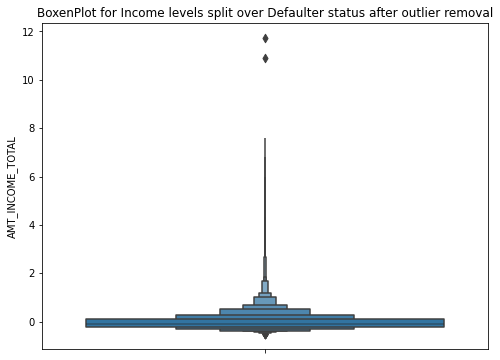

In [14]:
#Plot box plot for AMT_INCOME_TOTAL of X_train_final_outlier_removed
#Plotting the box'en' plot [can plot boxplot too] for income levels, it is observed that there is a datapoint far removed from rest of the datapoints.
plt.figure(figsize=(8,6))
sns.boxenplot(y='AMT_INCOME_TOTAL', data=X_train_final_outlier_removed, showfliers=True)
plt.title("BoxenPlot for Income levels split over Defaulter status after outlier removal")
plt.show()

In [ ]:
path='/content/drive/MyDrive/datasets/Assignment/'
pickle_out=open(path+"X_train_final_outlier_removed.pickle","wb")
pickle.dump(X_train_final_outlier_removed,pickle_out)
pickle_out.close()

pickle_out=open(path+"y_train_outlier_removed.pickle","wb")
pickle.dump(y_train_outlier_removed,pickle_out)
pickle_out.close()

> Comparing with the same plot before the outlier removal and after, it is observed that there is an improvement and the distribution is actually 'observable now', implying that the outlier removal was effective.

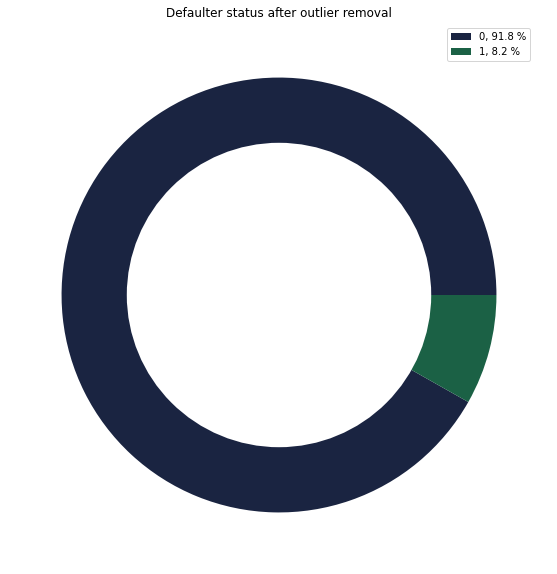

In [15]:
data=y_train_outlier_removed.value_counts()
labels = ['Defaulter','Non-Defaulter']
pie(data,labels,'Defaulter status after outlier removal')

> The pie chart above confirms that outlier removal has not further worsened the defaulter class imbalance and it remains virtually unchanged.

---
# 9.0.0 Feature Importance
---

> The operations performed thus far have yielded around 400+ features.
It may be the case that not all are able to explain the defaulting tendency equally or some may not even have any bearing on it.
In following with Occam's Razor and in order to improve model output's explainability or interpretability, features can be 'selected', that is only those features that have a significant bearing on the target variable are retained for passing into the model as inputs.
>
>
>As a preliminary study, only features selected from one of these models shall be used for further processing.
>Depending on future baseline model predictions, other combinations of feature selection methods shall be used for comparison.

## 9.1.0 Extra Trees Classifier 

In [16]:
'''Feature importance and selection shall be carried out by SKLearn's Tree Classifier module'''
#Source ref [1] - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html

#Select features using tree based feature selection
classifier = ExtraTreesClassifier(n_estimators=25)
classifier = classifier.fit(X_train_final_outlier_removed, y_train_outlier_removed)
model = SelectFromModel(classifier, prefit=True)
X_train_final_feature_selected = model.transform(X_train_final_outlier_removed)
features = model.get_support()
feature_name = X_train_final_outlier_removed.columns[features]
#Convert X_train_final_feature_selected to datframe
X_train_final_feature_selected = pd.DataFrame(X_train_final_feature_selected, columns=feature_name)

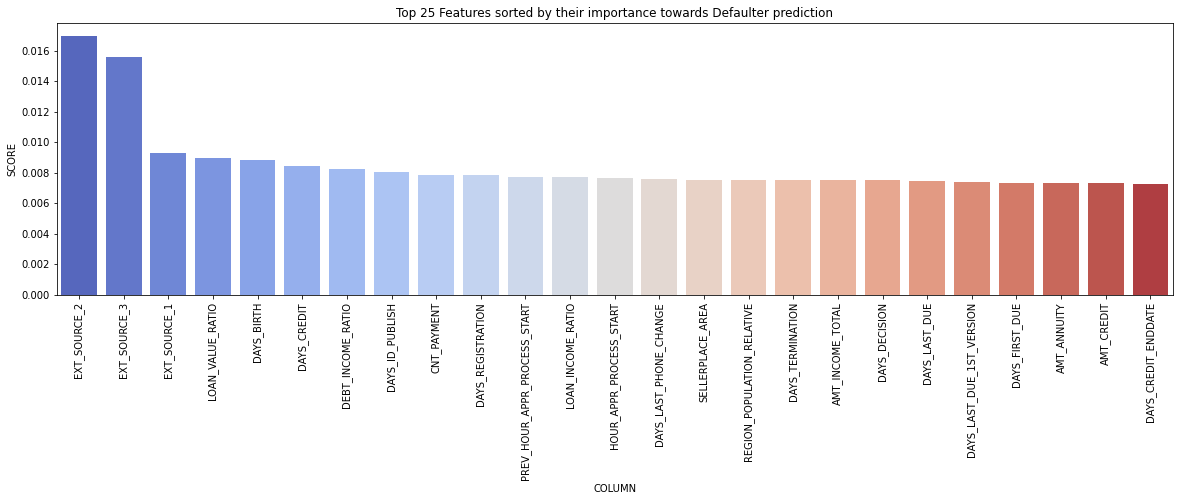

In [17]:
#Create dataframe with columns and their importance scores
data={'COLUMN': X_train_final_outlier_removed.columns,'SCORE': classifier.feature_importances_}
Column_Score = pd.DataFrame(data)
#Sort dataframe by decreasing importance scores
Column_Score_sorted = Column_Score.sort_values(by='SCORE', ascending=False)
#Plot bar plot for top 25 features
column = Column_Score_sorted['COLUMN'][0:25]
score = Column_Score_sorted['SCORE'][0:25]
plt.figure(figsize =(20, 5))
sns.barplot(column, score, palette="coolwarm")
plt.xticks(rotation=90)
plt.title('Top 25 Features sorted by their importance towards Defaulter prediction')
plt.show()

## 9.2.0 Random Forest Regressor

In [ ]:
'''Feature importance and selection also shall be carried out by SKLearn's Random Forest Regressor module'''
#Source ref [1] - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor

regressor=RandomForestRegressor(n_estimators=10, max_depth=5)
rfe = RFE(regressor, n_features_to_select=25)
rfe.fit(X_train_final_outlier_removed, y_train_outlier_removed)
from operator import itemgetter
features = X_train_final_outlier_removed.columns.to_list()
rfe_feature_rank=[]
for x, y in (sorted(zip(rfe.ranking_ , features), key=itemgetter(0))):
  rfe_feature_rank.append([x, y])

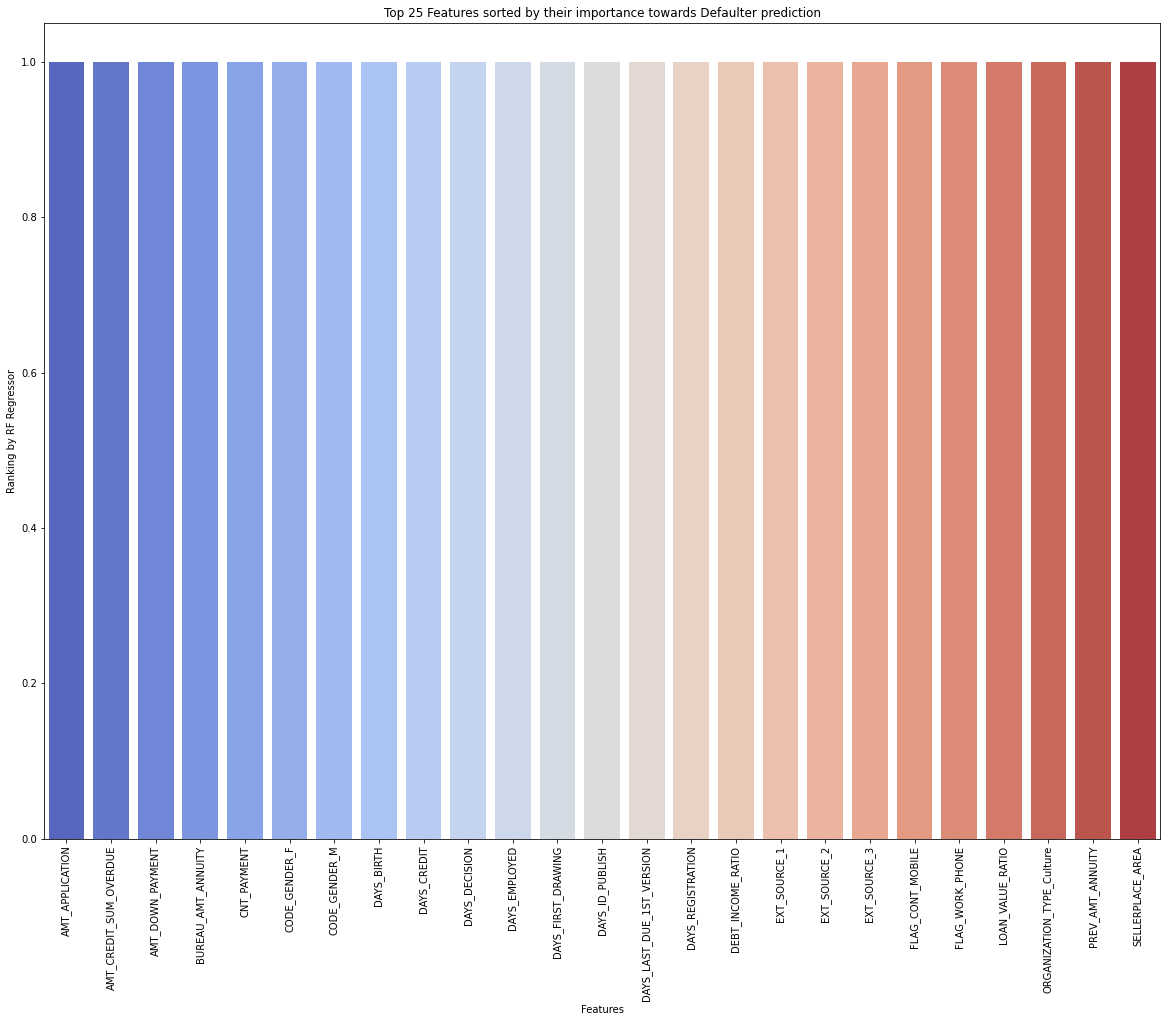

In [ ]:
#Converting the ranking to a DataFrame and plotting the ranking bar plot for top 25 features
rfe_feature_rank.sort()
rfe_feature_ranking=pd.DataFrame(rfe_feature_rank)
rfe_feature_ranking.columns=['feature rank', 'feature']
column=rfe_feature_ranking['feature'][0:25]
score=rfe_feature_ranking['feature rank'][0:25]
plt.figure(figsize =(20, 15))
sns.barplot(column, score, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel('Features') 
plt.ylabel('Ranking by RF Regressor')
plt.title('Top 25 Features sorted by their importance towards Defaulter prediction')
plt.show()

> Currently, 2 standard feature selection models in SKLearn library are used and top 25 features are displayed for visualization.
>
>
>High points of this visualization of the important features are -
>* The engineered features created are figuring in the top 25 features.
>* Many of the features thought as important during EDA do figure in the list.

## 9.3.0 Correlation Matrix of the top 25 features selected by Extra Trees Classifier

In [32]:
extra_tree_features=X_train_final_outlier_removed.iloc[:,Column_Score_sorted[0:25].index.to_list()]
extra_tree_features.reset_index(drop=True, inplace=True)
y_train_outlier_removed.reset_index(drop=True, inplace=True)
features_selected=[extra_tree_features, y_train_outlier_removed]
df_of_features_final=pd.concat(features_selected, axis=1)

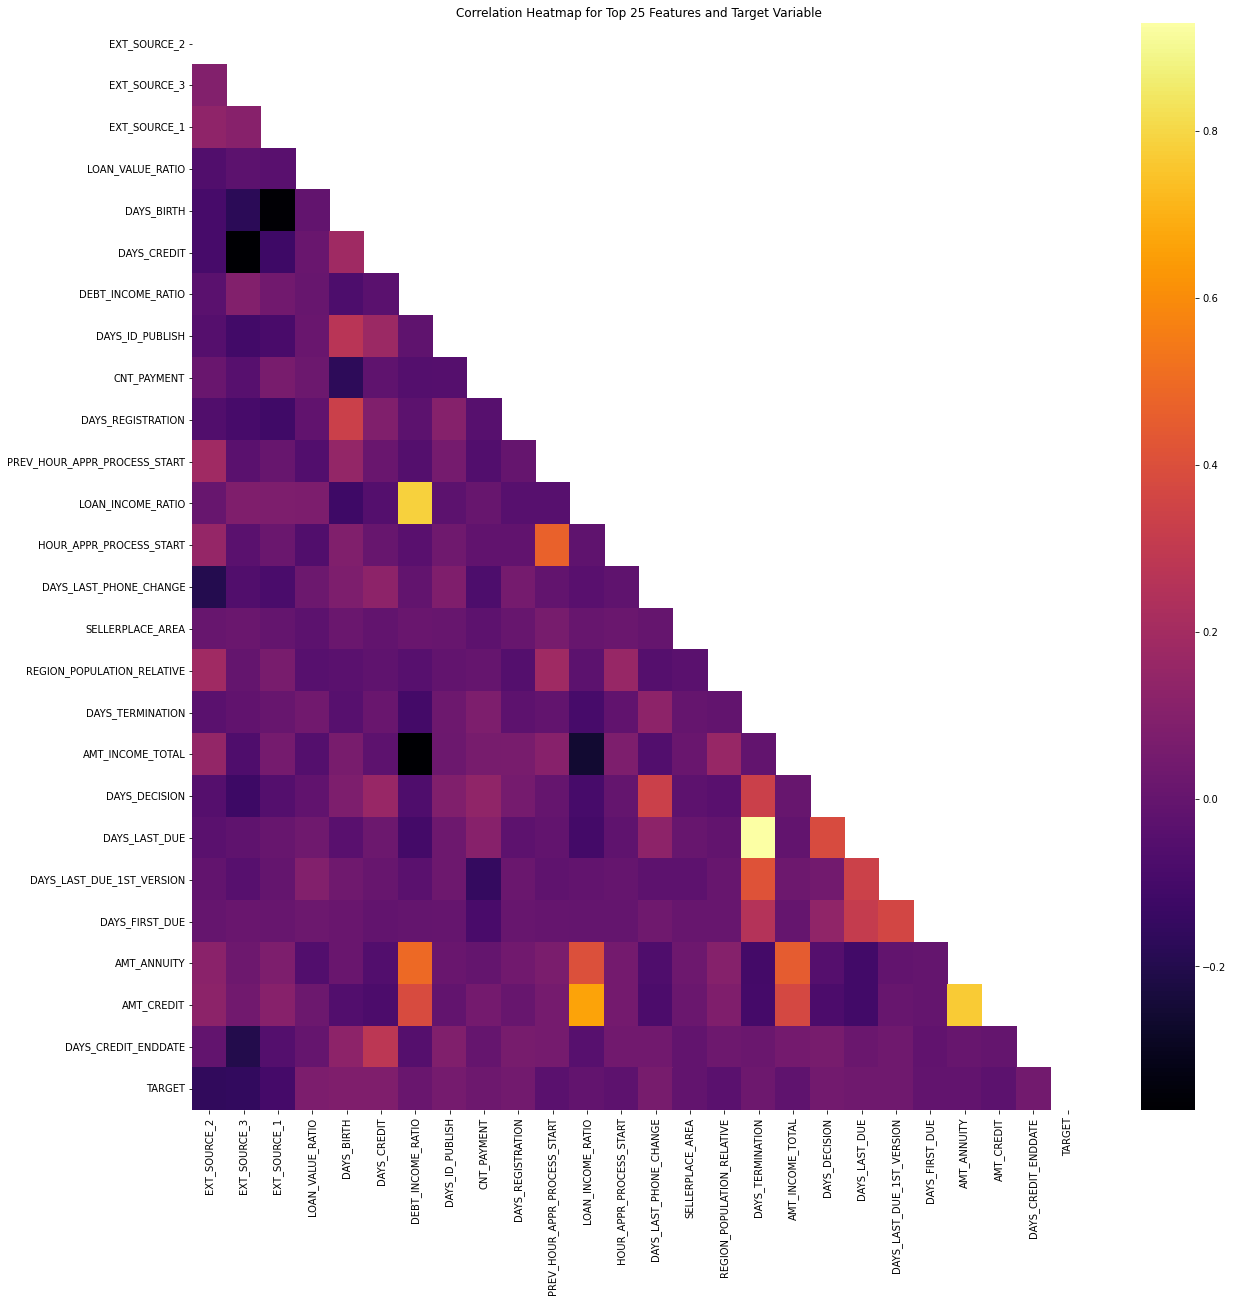

In [35]:
top_25=df_of_features_final
corr_mat=top_25.corr()
shape=(20,20)
plt.figure(figsize = shape)
mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_mat, annot = False, mask=mask, cmap = 'inferno')
plt.xticks(rotation = 90)
#plt.yticks(fontsize = self.fontsize)
plt.title("Correlation Heatmap for Top 25 Features and Target Variable")
plt.show()

>Most of the features are not correlated with one another.
>
>Each have a varying degree of correlation with the TARGET variable.
>
>This feature set shall be used in modeling phase and assessed by the performance metrics.
>
>Based on its outcome, new set of features may be created and used.

---
# 10.0.0 High level data visualization for understanding 
---

> From bivariate analysis, it is already observed that the data is not linearly separable and hence, PCA may not provide additional insights. Towards high-dimensional visualization of the processed data, t-SNE which considers non-linear relations, is carried out as it gives one a sense or intuition of how the data is arranged in a high-dimensional space. 

## 10.1.0 'Pickling' the dataset

In [ ]:
path='/content/drive/MyDrive/datasets/Assignment/'
pickle_out=open(path+"X_train_final_feature_selected.pickle","wb")
pickle.dump(X_train_final_feature_selected,pickle_out)
pickle_out.close()
pickle_out=open(path+"y_train_outlier_removed.pickle","wb")
pickle.dump(y_train_outlier_removed,pickle_out)
pickle_out.close()

## 10.2.0 Loading the 'pickled' dataset

In [ ]:
path='/content/drive/MyDrive/datasets/Assignment/'

pickle_in=open(path+"X_train_final_feature_selected.pickle",'rb')
X_train_final_feature_selected=pickle.load(pickle_in)

pickle_in=open(path+"y_train_outlier_removed.pickle",'rb')
y_train_outlier_removed=pickle.load(pickle_in)

## 10.3.0 t-SNE Visualization

In [ ]:
#Source ref [1] - https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
#Visualization of the processed dataset with one set of Perplexity & iteration number.
#Fit X_train_final_feature_selected to TSNE
X_embedded = TSNE(n_components=2, perplexity=30, n_iter=250, learning_rate='auto', init='random').fit_transform(X_train_final_feature_selected)
print(X_embedded.shape)

(204494, 2)


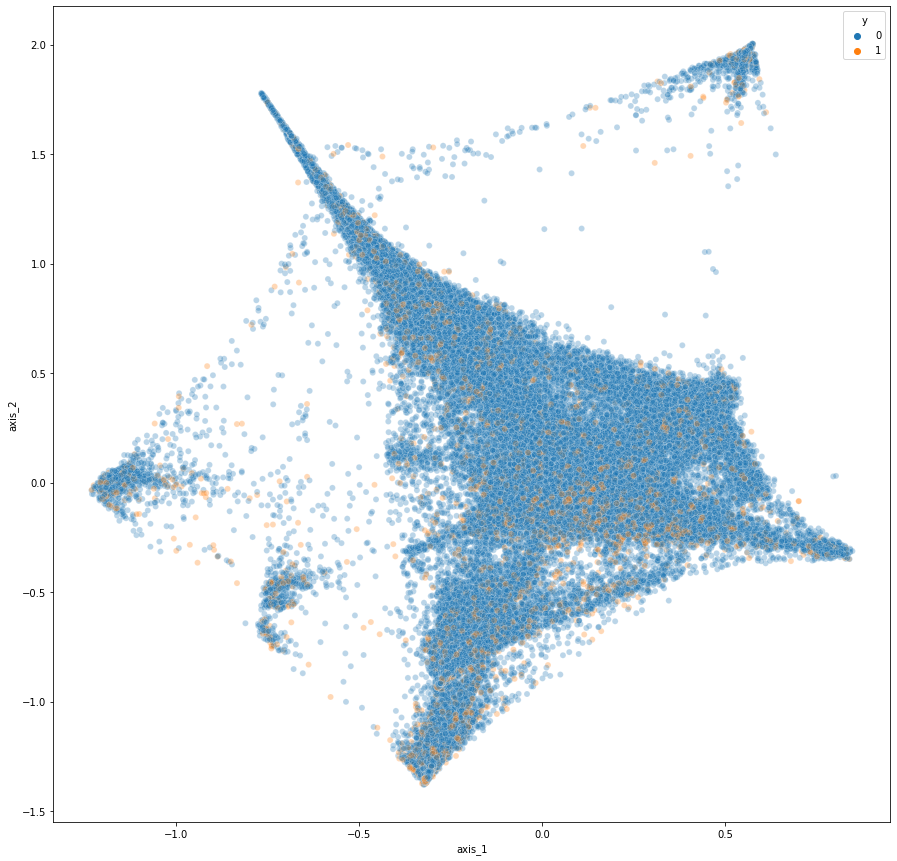

In [ ]:
#Create dataframe with 2 dimensions obtained from TSNE and y/TARGET label
data={'axis_1': X_embedded[:, 0], 'axis_2': X_embedded[:, 1], 'y': y_train_outlier_removed}
X_embedded_dataframe=pd.DataFrame(data)
#Plot scatter plot
plt.figure(figsize=(15,15))
sns.scatterplot(x="axis_1", y="axis_2", hue="y", data=X_embedded_dataframe, legend="full", alpha=0.3)
plt.show()

In [ ]:
#Source ref [1] - https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
#Visualization of the processed dataset with another set of Perplexity & iteration number for possible variations.

#Fit X_train_final_feature_selected to TSNE
X_embedded = TSNE(n_components=2, perplexity=60, n_iter=250, learning_rate='auto', init='random').fit_transform(X_train_final_feature_selected)
print(X_embedded.shape)

(204494, 2)


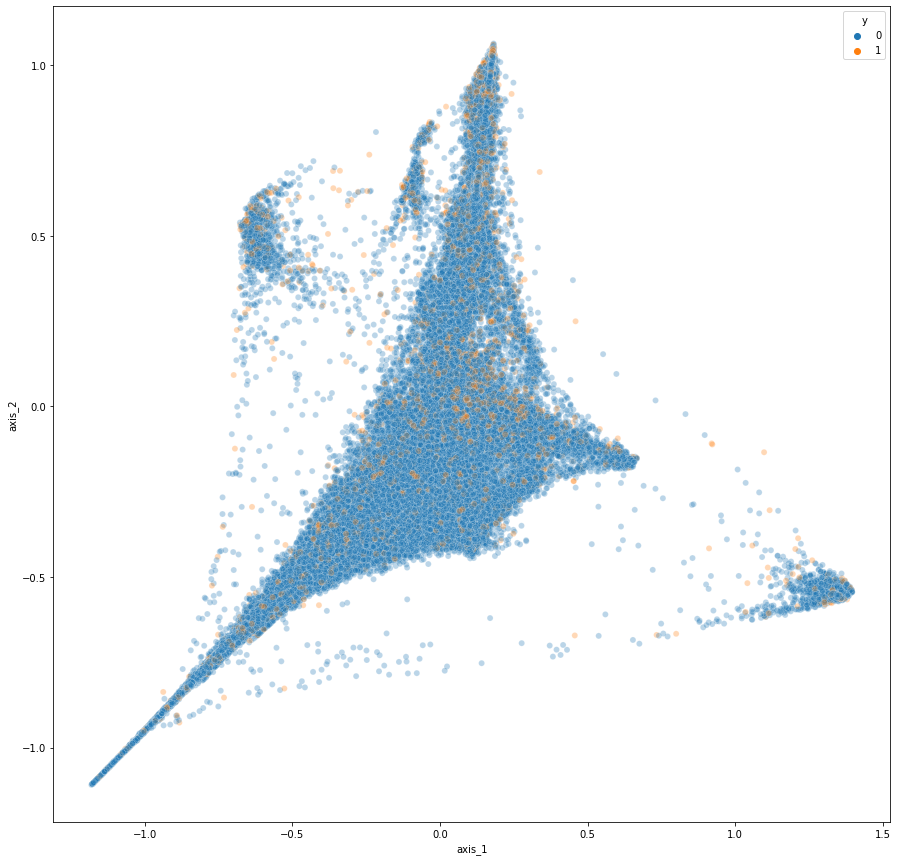

In [ ]:
#Create dataframe with 2 dimensions obtained from TSNE and y/TARGET label
data={'axis_1': X_embedded[:, 0], 'axis_2': X_embedded[:, 1], 'y': y_train_outlier_removed}
X_embedded_dataframe=pd.DataFrame(data)
#Plot scatter plot
plt.figure(figsize=(15,15))
sns.scatterplot(x="axis_1", y="axis_2", hue="y", data=X_embedded_dataframe, legend="full", alpha=0.3)
plt.show()

> The t-SNE high-dimensional visualizations do not indicate clear disparate clustering of defaulters from non-defaulters.
The defaulters are almost evenly distributed throughout the sample space making a linear decision boundary generating models difficult to implement at this stage.

---
# 11.0.0 Key Takeaways of the EDA and Feature Analysis done
---

## 11.1.0 General Highlights

>* This is a very time-intensive phase involving tinkering with a myriad of features and its combinations, and requires participation from varied sources such as programmers to code effective visualizations and domain experts in order to know what to visualize.
* Outcomes of this phase are very visually rich and are most useful to convey data to ‘non-technical’ populace.
* Insights obtained in the EDA phase may be very valuable as they show patterns not usually discernable; helping translate them into tangible business outcomes.


## 11.2.0 Specific Highlights to Home Credit dataset-context EDA performed on Google Colab [Free edition]

>* The dataset is pretty big and needs some form of size optimization as well as storing of intermediate outputs in order to be performed on Colab’s free boxes, owing to RAM usage.  
* There are too many features to visualize owing to time constraint and summarization and hence only a few are actually visualized in the notebook.
* Additonal feature visualizations can easily be done by calling the functions defined.
* There is a very high scope for further feature engineering based on preliminary model outputs and feature selection methods employed.
* Hence, data processing done in this phase such as the features created, imputation strategies followed may be revisited based on outcome of future phases and modeling.
* Regarding the t-SNE visualization, which is pretty time-consuming on the colab box, combinations of perplexity and iterations were tried out and the results are not all that different.
* Regarding some visualizations such as correlations, advanced statistics such as the Phi-K statistic is used for categorical as well as mixed features. 
* A complex correlation visualization may be constructed in the upcoming Advanced Modeling and Feature Engineering phase.